Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!

  - Folium maps have custom Javascript and won't display in GitHub : https://stackoverflow.com/questions/53240378/folium-map-fail-to-render-in-notebook-on-github

# SparkSQL   -  Daily Analysis   -  Covid19 Sars-Cov2


###  COVID-19 SARS-COV2 - Daily Analysis


### Executed with data from John Hopkins inst. gituhub + my daily analysis notebooks


## Scrool to the bottom and look at the latest grafics

### 1.

###  Loading csv Daily Analysis file

In [1]:
#################################################################
###### Load The Daily JohnHopkins + 1Day Notebook Analysis ######
#################################################################
### Input date for analysis
anltdate="2020-11-30"
configs = {"analytics_date":anltdate}
#
### Input delta in folder :  /data
my_input_csv_table="World_v2--Confirmed-1Day_Forecast_--_train_"+anltdate+"-copy0.csv"
delta_location_covid19="file:///home/notebookuser/notebooks/data/delta_daily-covid19-global-analysis/dt="+anltdate
###
######
##############################Execution##########################
import findspark
findspark.init()
#
import pyspark
from pyspark.sql import functions as pfunc
from pyspark.sql import SQLContext
from pyspark.sql import Window, types
import re
import pandas as pd
import numpy as np
from pandas import DataFrame
from pyspark.sql.types import IntegerType
from pyspark.sql.types import FloatType
from pyspark.sql.functions import udf
from pyspark.sql.functions import *
from scipy.stats import kstest
from scipy import stats
#
import subprocess
#
sc = pyspark.SparkContext(appName="Daily-Covid19-Global-Analysis")
sqlContext = SQLContext(sc)
#
#
internal_csv_files="file:///home/notebookuser/notebooks/covid19/data/"+my_input_csv_table
#
# Join with Internal Curation Data in urltopredict staged folder
from pyspark.sql import functions as F
### Scructure
from pyspark.sql.types import StructField,IntegerType,StructType,StringType,FloatType,DoubleType
newDF=[StructField('date',StringType(),True),
       StructField('region',StringType(),True),
       StructField('confirmed',StringType(),True),
       StructField('1_day_change',FloatType(),True),
       StructField('3_day_change',FloatType(),True),
       StructField('7_day_change',FloatType(),True),
       StructField('1_day_change_rate',DoubleType(),True),
       StructField('3_day_change_rate',DoubleType(),True),
       StructField('7_day_change_rate',DoubleType(),True),
       StructField('confirmed_yesterday',FloatType(),True),
       StructField('confirmed_prediction',FloatType(),True),
       StructField('population',FloatType(),True),
       StructField('infected_rate',DoubleType(),True),
       StructField('min',FloatType(),True),
       StructField('max',FloatType(),True),
       StructField('population_percentage_infected_rate_confirmed',DoubleType(),True),
       StructField('population_percentage_factor_9a10_infected_rate_confirmed',DoubleType(),True),
       StructField('delta_new_cases',FloatType(),True),
       StructField('delta_new_cases_per_1M_hab',FloatType(),True),
       StructField('delta_roling_7day_AVG',FloatType(),True),
       StructField('delta_aprox_14day_case_notification_rate_per_100k_hab',FloatType(),True)
       ]
finalStruct=StructType(fields=newDF)
#
dataframe_df1=sqlContext.read.csv(internal_csv_files,header="true",schema=finalStruct)\
.fillna("",subset=['date', 'region'])\
.fillna(0, subset=['1_day_change', '3_day_change', '7_day_change', 'confirmed_yesterday', 'confirmed_prediction', 'population', 'infected_rate', 'min', 'max', 'population_percentage_infected_rate_confirmed', 'population_percentage_factor_9a10_infected_rate_confirmed', 'population_percentage_factor_9a10_infected_rate_confirmed', 'delta_new_cases', 'delta_new_cases_per_1M_hab', 'delta_roling_7day_AVG', 'delta_aprox_14day_case_notification_rate_per_100k_hab'])\
.persist(pyspark.StorageLevel.MEMORY_AND_DISK_2)
#   
columns_to_drop = ['1_day_change_rate', '3_day_change_rate', '7_day_change_rate', 'infected_rate', 'min', 'max']
#
#dataframe_df1.printSchema()
dataframe_df1.drop(*columns_to_drop).show(5)
df2=dataframe_df1.drop(*columns_to_drop)
df2.write.mode('overwrite').format("delta").save(delta_location_covid19)
###
####
## sc.stop()
#
print("Data Load Done!")
#

+----------+---------------+---------+------------+------------+------------+-------------------+--------------------+----------+---------------------------------------------+---------------------------------------------------------+---------------+--------------------------+---------------------+-----------------------------------------------------+
|      date|         region|confirmed|1_day_change|3_day_change|7_day_change|confirmed_yesterday|confirmed_prediction|population|population_percentage_infected_rate_confirmed|population_percentage_factor_9a10_infected_rate_confirmed|delta_new_cases|delta_new_cases_per_1M_hab|delta_roling_7day_AVG|delta_aprox_14day_case_notification_rate_per_100k_hab|
+----------+---------------+---------+------------+------------+------------+-------------------+--------------------+----------+---------------------------------------------+---------------------------------------------------------+---------------+--------------------------+------------------

In [2]:
#sc.stop()
#exit()

### 2.


### Loading Data to Delta Lake for SparkSQL interrogations

In [3]:
##############################
###### Load The Delta   ######
##############################
###
### Input dates
#anltdate="2020-11-30"
#configs = {"analytics_date":anltdate}
#
### Input delta in folder :  /data
my_input_delta_table="delta_daily-covid19-global-analysis"
#
delta_table_name="covid19_jh_analysis"
###
######
##############################Execution##########################
import findspark
findspark.init()
#
import pyspark
from pyspark.sql import functions as pfunc
from pyspark.sql import SQLContext
from pyspark.sql import Window, types
import re
import pandas as pd
import numpy as np
from pandas import DataFrame
from pyspark.sql.types import IntegerType
from pyspark.sql.types import FloatType
from pyspark.sql.functions import udf
from pyspark.sql.functions import *
from scipy.stats import kstest
from scipy import stats
#
import subprocess
3#
### CONTEXT required for 2nd,3rd,4th,5th runs
#
#sc = pyspark.SparkContext(appName="Daily-Covid19-Delta-Analysis")
#sqlContext = SQLContext(sc)
#
internal_delta_files="file:///home/notebookuser/notebooks/data/"+my_input_delta_table+"/dt="+anltdate
#
# Join with Internal Curation Data in urltopredict staged folder
from pyspark.sql import functions as F
delta_dataframe_df1=sqlContext.read.format("delta").load(internal_delta_files)\
.persist(pyspark.StorageLevel.MEMORY_AND_DISK_2)
#
## ,schema=finalStruct)\
## Py4JJavaError: An error occurred while calling o48.load.
## : org.apache.spark.sql.AnalysisException: delta does not allow user-specified schemas.;
##      	at org.apache.spark.sql.execution.datasources.DataSource.resolveRelation(DataSource.scala:325)
#
delta_dataframe_df1.printSchema()
delta_dataframe_df1.registerTempTable(delta_table_name)
#
#
print("Delta table "+delta_table_name+" : registration Done!")
#

root
 |-- date: string (nullable = true)
 |-- region: string (nullable = true)
 |-- confirmed: string (nullable = true)
 |-- 1_day_change: float (nullable = true)
 |-- 3_day_change: float (nullable = true)
 |-- 7_day_change: float (nullable = true)
 |-- confirmed_yesterday: float (nullable = true)
 |-- confirmed_prediction: float (nullable = true)
 |-- population: float (nullable = true)
 |-- population_percentage_infected_rate_confirmed: double (nullable = true)
 |-- population_percentage_factor_9a10_infected_rate_confirmed: double (nullable = true)
 |-- delta_new_cases: float (nullable = true)
 |-- delta_new_cases_per_1M_hab: float (nullable = true)
 |-- delta_roling_7day_AVG: float (nullable = true)
 |-- delta_aprox_14day_case_notification_rate_per_100k_hab: float (nullable = true)

Delta table covid19_jh_analysis : registration Done!


### 3.

### Registering SQL functions as jupyter line_cell_magic

In [4]:
#
###### https://github.com/LucaCanali/Miscellaneous/blob/master/Pyspark_SQL_Magic_Jupyter/IPython_Pyspark_SQL_Magic.py
#
#
# IPython magic functions to use with Pyspark and Spark SQL
# The following code is intended as examples of shorcuts to simplify the use of SQL in pyspark
# The defined functions are:
#
# %sql <statement>          - return a Spark DataFrame for lazy evaluation of the SQL
# %sql_show <statement>     - run the SQL statement and show max_show_lines (50) lines
# %sql_display <statement>  - run the SQL statement and display the results using a HTML table 
#                           - this is implemented passing via Pandas and displays up to max_show_lines (50)
# %sql_explain <statement>  - display the execution plan of the SQL statement
#
# Use: %<magic> for line magic or %%<magic> for cell magic.
#
# Author: Luca.Canali@cern.ch
# September 2016
#

from IPython.core.magic import register_line_cell_magic

# Configuration parameters
max_show_lines = 80         # Limit on the number of lines to show with %sql_show and %sql_display
detailed_explain = True     # Set to False if you want to see only the physical plan when running explain

#### Joao - Fix - inject - AnalyticsData
##configs = {'analytics_date': << THE_DATE >> } #,"TABLE_NAME":"my_table","SCHEMA":"my_schema"}
### 

@register_line_cell_magic
def sql(line, cell=None):
    "Return a Spark DataFrame for lazy evaluation of the sql. Use: %sql or %%sql"
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs))

@register_line_cell_magic
def sql_show(line, cell=None):
    "Execute sql and show the first max_show_lines lines. Use: %sql_show or %%sql_show"
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs)).show(max_show_lines) 

@register_line_cell_magic
def sql_display(line, cell=None):
    """Execute sql and convert results to Pandas DataFrame for pretty display or further processing.
    Use: %sql_display or %%sql_display"""
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs)).limit(max_show_lines).toPandas() 

@register_line_cell_magic
def sql_explain(line, cell=None):
    "Display the execution plan of the sql. Use: %sql_explain or %%sql_explain"
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs)).explain(detailed_explain)
#

### 4.


### Validate SPARK-SQL instructions  %%sql_display  %%sql_explain %%sql_show

In [5]:
%%sql_display
select * from covid19_jh_analysis  order by date desc, region asc limit 5

date           region confirmed  1_day_change  3_day_change  \
0  2020-11-30  Afghanistan_nan         0         249.0         499.0   
1  2020-11-30      Albania_nan         0         835.0        2025.0   
2  2020-11-30      Algeria_nan         0        1009.0        3111.0   
3  2020-11-30      Andorra_nan         0         102.0         178.0   
4  2020-11-30       Angola_nan         0          16.0         183.0   

   7_day_change  confirmed_yesterday  confirmed_prediction  population  \
0        1509.0              46215.0               46422.0  35530000.0   
1        4864.0              37625.0               38262.0   2878445.0   
2        7359.0              82221.0               83316.0  41320000.0   
3         456.0               6712.0                6771.0     77239.0   
4         610.0              15103.0               15237.0  32866272.0   

   population_percentage_infected_rate_confirmed  \
0                                       0.001301   
1                                       0.013072   
2                                       0.001990   
3                                       0.086911   
4                                       0.000460   

   population_percentage_factor_9a10_infected_rate_confirmed  delta_new_cases  \
0                                           0.013008                    207.0   
1                                           0.130716                    637.0   
2                                           0.019899                   1095.0   
3                                           0.869109                     59.0   
4                                           0.004596                    134.0   

   delta_new_cases_per_1M_hab  delta_roling_7day_AVG  \
0                    5.826063             215.571426   
1                  221.300049             694.857117   
2                   26.500484            1051.285767   
3                  763.862793              65.142860   
4                    4.077128              87.142860   

   delta_aprox_14day_case_notification_rate_per_100k_hab  
0                                           8.494230      
1                                         337.960266      
2                                          35.619556      
3                                        1180.750610      
4                                           3.712012

In [6]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= {analytics_date} 
    order by date desc limit 5

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

### 5.1.0


### The Regions in the World with +200  'notifications per 100k hab. in last 14days' and +10 cases a day AVG last 7days 

In [7]:
%%sql_display
select date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-11-30' and
    delta_roling_7day_AVG >= 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 10
order by delta_roling_7day_AVG desc, region asc
limit 60

date                    region  delta_roling_7day_AVG  \
0   2020-11-30         United States_nan          162364.859375   
1   2020-11-30                 India_nan           41689.429688   
2   2020-11-30                Brazil_nan           34762.714844   
3   2020-11-30                Russia_nan           25433.142578   
4   2020-11-30                 Italy_nan           25187.142578   
5   2020-11-30                Turkey_nan           22972.285156   
6   2020-11-30                Poland_nan           17677.714844   
7   2020-11-30               Germany_nan           17617.714844   
8   2020-11-30        United Kingdom_nan           15040.286133   
9   2020-11-30               Ukraine_nan           14270.000000   
10  2020-11-30                  Iran_nan           13484.000000   
11  2020-11-30                France_nan           10960.857422   
12  2020-11-30                 Spain_nan           10211.142578   
13  2020-11-30                Mexico_nan            9313.713867   
14  2020-11-30              Colombia_nan            8565.571289   
15  2020-11-30               Romania_nan            7555.856934   
16  2020-11-30             Argentina_nan            6920.143066   
17  2020-11-30                Serbia_nan            6870.571289   
18  2020-11-30               Hungary_nan            5272.714355   
19  2020-11-30             Indonesia_nan            5228.285645   
20  2020-11-30                Sweden_nan            4976.285645   
21  2020-11-30           Netherlands_nan            4894.571289   
22  2020-11-30              Portugal_nan            4863.000000   
23  2020-11-30               Austria_nan            4645.714355   
24  2020-11-30                Jordan_nan            4411.143066   
25  2020-11-30               Morocco_nan            4123.143066   
26  2020-11-30           Switzerland_nan            3955.571533   
27  2020-11-30               Georgia_nan            3948.000000   
28  2020-11-30               Czechia_nan            3922.857178   
29  2020-11-30            Azerbaijan_nan            3585.857178   
30  2020-11-30               Croatia_nan            3270.571533   
31  2020-11-30              Pakistan_nan            3013.571533   
32  2020-11-30              Bulgaria_nan            2952.285645   
33  2020-11-30          South Africa_nan            2860.428467   
34  2020-11-30               Belgium_nan            2545.714355   
35  2020-11-30                  Iraq_nan            2159.142822   
36  2020-11-30            Bangladesh_nan            2152.285645   
37  2020-11-30                 Japan_nan            2068.714355   
38  2020-11-30                  Peru_nan            2064.142822   
39  2020-11-30             Lithuania_nan            1878.000000   
40  2020-11-30                Greece_nan            1801.142822   
41  2020-11-30    West Bank and Gaza_nan            1705.857178   
42  2020-11-30                 Nepal_nan            1667.142822   
43  2020-11-30           Philippines_nan            1578.000000   
44  2020-11-30               Belarus_nan            1572.714233   
45  2020-11-30            Canada_Ontario            1543.285767   
46  2020-11-30               Lebanon_nan            1495.428589   
47  2020-11-30                 Burma_nan            1462.857178   
48  2020-11-30              Slovenia_nan            1439.000000   
49  2020-11-30                Panama_nan            1420.857178   
50  2020-11-30                 Chile_nan            1398.571411   
51  2020-11-30              Malaysia_nan            1387.142822   
52  2020-11-30            Canada_Alberta            1367.428589   
53  2020-11-30              Slovakia_nan            1356.000000   
54  2020-11-30               Moldova_nan            1296.571411   
55  2020-11-30             Canada_Quebec            1285.142822   
56  2020-11-30               Denmark_nan            1266.714233   
57  2020-11-30  United Arab Emirates_nan            1251.857178   
58  2020-11-30               Armenia_nan            1220.

In [8]:
%%sql_display
select date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-11-30' and
    delta_roling_7day_AVG >= 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 80
order by delta_roling_7day_AVG desc, region asc

date                      region  delta_roling_7day_AVG  \
0   2020-11-30           United States_nan          162364.859375   
1   2020-11-30                  Brazil_nan           34762.714844   
2   2020-11-30                  Russia_nan           25433.142578   
3   2020-11-30                   Italy_nan           25187.142578   
4   2020-11-30                  Turkey_nan           22972.285156   
5   2020-11-30                  Poland_nan           17677.714844   
6   2020-11-30                 Germany_nan           17617.714844   
7   2020-11-30          United Kingdom_nan           15040.286133   
8   2020-11-30                 Ukraine_nan           14270.000000   
9   2020-11-30                    Iran_nan           13484.000000   
10  2020-11-30                  France_nan           10960.857422   
11  2020-11-30                   Spain_nan           10211.142578   
12  2020-11-30                  Mexico_nan            9313.713867   
13  2020-11-30                Colombia_nan            8565.571289   
14  2020-11-30                 Romania_nan            7555.856934   
15  2020-11-30               Argentina_nan            6920.143066   
16  2020-11-30                  Serbia_nan            6870.571289   
17  2020-11-30                 Hungary_nan            5272.714355   
18  2020-11-30                  Sweden_nan            4976.285645   
19  2020-11-30             Netherlands_nan            4894.571289   
20  2020-11-30                Portugal_nan            4863.000000   
21  2020-11-30                 Austria_nan            4645.714355   
22  2020-11-30                  Jordan_nan            4411.143066   
23  2020-11-30                 Morocco_nan            4123.143066   
24  2020-11-30             Switzerland_nan            3955.571533   
25  2020-11-30                 Georgia_nan            3948.000000   
26  2020-11-30                 Czechia_nan            3922.857178   
27  2020-11-30              Azerbaijan_nan            3585.857178   
28  2020-11-30                 Croatia_nan            3270.571533   
29  2020-11-30                Bulgaria_nan            2952.285645   
..         ...                         ...                    ...   
41  2020-11-30              Canada_Alberta            1367.428589   
42  2020-11-30                Slovakia_nan            1356.000000   
43  2020-11-30                 Moldova_nan            1296.571411   
44  2020-11-30               Canada_Quebec            1285.142822   
45  2020-11-30                 Denmark_nan            1266.714233   
46  2020-11-30    United Arab Emirates_nan            1251.857178   
47  2020-11-30                 Armenia_nan            1220.571411   
48  2020-11-30              Costa Rica_nan            1096.428589   
49  2020-11-30                 Tunisia_nan            1077.142822   
50  2020-11-30  Bosnia and Herzegovina_nan            1052.571411   
51  2020-11-30         North Macedonia_nan             971.428589   
52  2020-11-30                  Israel_nan             954.285706   
53  2020-11-30                Paraguay_nan             775.714294   
54  2020-11-30     Canada_British Columbia             772.857117   
55  2020-11-30      Dominican Republic_nan             723.285706   
56  2020-11-30                 Albania_nan             694.857117   
57  2020-11-30                  Kosovo_nan             680.285706   
58  2020-11-30                   Libya_nan             658.142883   
59  2020-11-30                  Latvia_nan             550.714294   
60  2020-11-30              Montenegro_nan             545.571411   
61  2020-11-30              Luxembourg_nan             521.000000   
62  2020-11-30              Kyrgyzstan_nan             460.857147   
63  2020-11-30                  Norway_nan             437.571442   
64  2020-11-30                 Finland_nan             427.142853   
65  2020-11-30             Canada_Manitoba             419.857147   
66  2020-11-30                  Kuwait_nan             338.571442   
67  2020

### 5.1.1


### The Regions in the World with +240  'notifications per 100k hab. in last 14days' and +300 cases AVG last 7days

In [9]:
%%sql_display
select date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-11-30' and
    delta_roling_7day_AVG >= 300 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 240
order by delta_roling_7day_AVG desc, region asc
limit 80

date                      region  delta_roling_7day_AVG  \
0   2020-11-30           United States_nan          162364.859375   
1   2020-11-30                  Russia_nan           25433.142578   
2   2020-11-30                   Italy_nan           25187.142578   
3   2020-11-30                  Turkey_nan           22972.285156   
4   2020-11-30                  Poland_nan           17677.714844   
5   2020-11-30                 Germany_nan           17617.714844   
6   2020-11-30          United Kingdom_nan           15040.286133   
7   2020-11-30                 Ukraine_nan           14270.000000   
8   2020-11-30                   Spain_nan           10211.142578   
9   2020-11-30                 Romania_nan            7555.856934   
10  2020-11-30                  Serbia_nan            6870.571289   
11  2020-11-30                 Hungary_nan            5272.714355   
12  2020-11-30                  Sweden_nan            4976.285645   
13  2020-11-30             Netherlands_nan            4894.571289   
14  2020-11-30                Portugal_nan            4863.000000   
15  2020-11-30                 Austria_nan            4645.714355   
16  2020-11-30                  Jordan_nan            4411.143066   
17  2020-11-30             Switzerland_nan            3955.571533   
18  2020-11-30                 Georgia_nan            3948.000000   
19  2020-11-30                 Czechia_nan            3922.857178   
20  2020-11-30              Azerbaijan_nan            3585.857178   
21  2020-11-30                 Croatia_nan            3270.571533   
22  2020-11-30                Bulgaria_nan            2952.285645   
23  2020-11-30                 Belgium_nan            2545.714355   
24  2020-11-30               Lithuania_nan            1878.000000   
25  2020-11-30      West Bank and Gaza_nan            1705.857178   
26  2020-11-30                 Lebanon_nan            1495.428589   
27  2020-11-30                Slovenia_nan            1439.000000   
28  2020-11-30                  Panama_nan            1420.857178   
29  2020-11-30              Canada_Alberta            1367.428589   
30  2020-11-30                Slovakia_nan            1356.000000   
31  2020-11-30                 Moldova_nan            1296.571411   
32  2020-11-30                 Denmark_nan            1266.714233   
33  2020-11-30                 Armenia_nan            1220.571411   
34  2020-11-30              Costa Rica_nan            1096.428589   
35  2020-11-30  Bosnia and Herzegovina_nan            1052.571411   
36  2020-11-30         North Macedonia_nan             971.428589   
37  2020-11-30                 Albania_nan             694.857117   
38  2020-11-30                  Kosovo_nan             680.285706   
39  2020-11-30                  Latvia_nan             550.714294   
40  2020-11-30              Montenegro_nan             545.571411   
41  2020-11-30              Luxembourg_nan             521.000000   
42  2020-11-30             Canada_Manitoba             419.857147   
43  2020-11-30                 Estonia_nan             332.571442   

    delta_aprox_14day_case_notification_rate_per_100k_hab  1_day_change  \
0                                          686.734070          138903.0   
1                                          246.411072           26390.0   
2                                          583.035706           20646.0   
3                                          397.985413           29281.0   
4                                          651.627197           11482.0   
5                                          297.920044            3197.0   
6                                          316.923553           12155.0   
7                                          456.243927           13271.0   
8                                          306.378052               0.0   
9                                          541.638489            5554.0   
10                                        1099.961304            6179.0   
11  

### 5.1.2


### The Regions in the World with +120  'notifications per 100k hab. in last 14days' and +300 cases AVG last 7days

In [10]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-11-30' and
    delta_roling_7day_AVG >= 300 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 120 and 
    delta_aprox_14day_case_notification_rate_per_100k_hab < 240
order by delta_roling_7day_AVG desc, region asc
limit 80

date                    region  delta_roling_7day_AVG  \
0   2020-11-30                Brazil_nan           34762.714844   
1   2020-11-30                  Iran_nan           13484.000000   
2   2020-11-30                France_nan           10960.857422   
3   2020-11-30              Colombia_nan            8565.571289   
4   2020-11-30             Argentina_nan            6920.143066   
5   2020-11-30               Morocco_nan            4123.143066   
6   2020-11-30                Greece_nan            1801.142822   
7   2020-11-30               Belarus_nan            1572.714233   
8   2020-11-30            Canada_Ontario            1543.285767   
9   2020-11-30             Canada_Quebec            1285.142822   
10  2020-11-30  United Arab Emirates_nan            1251.857178   
11  2020-11-30               Tunisia_nan            1077.142822   
12  2020-11-30                Israel_nan             954.285706   
13  2020-11-30              Paraguay_nan             775.714294   
14  2020-11-30   Canada_British Columbia             772.857117   
15  2020-11-30                 Libya_nan             658.142883   

    delta_aprox_14day_case_notification_rate_per_100k_hab  1_day_change  \
0                                          228.961365           24468.0   
1                                          224.752060           12950.0   
2                                          219.248459            9784.0   
3                                          236.217361            8763.0   
4                                          214.784058            5432.0   
5                                          156.785721            4115.0   
6                                          234.785843            1193.0   
7                                          232.995346            1684.0   
8                                          148.291016            1633.0   
9                                          212.044785            1395.0   
10                                         186.446808            1251.0   
11                                         127.883659            1271.0   
12                                         153.351700             809.0   
13                                         152.707138             775.0   
14                                         212.156860               0.0   
15                                         134.094147            1157.0   

    3_day_change  7_day_change  confirmed_yesterday   population  \
0       110520.0      243339.0            6314740.0  212559008.0   
1        40403.0       94388.0             948749.0   83993000.0   
2        34678.0       76726.0            2217555.0   69990000.0   
3        27889.0       59959.0            1308376.0   50765952.0   
4        19376.0       48441.0            1418807.0   45106700.0   
5        13119.0       28862.0             353803.0   36817128.0   
6         4921.0       12608.0             104227.0   10740000.0   
7         4996.0       11009.0             135008.0    9449974.0   
8         5252.0       10803.0             118150.0   14570000.0   
9         4144.0        8996.0             141038.0    8485000.0   
10        3786.0        8763.0             167753.0    9400000.0   
11        3776.0        7540.0              96251.0   11791968.0   
12        2514.0        6680.0             335598.0    8712000.0   
13        2389.0        5430.0              81906.0    7111652.0   
14         911.0        5410.0              30884.0    5100000.0   
15        2023.0        4607.0              82430.0    6871292.0   

    population_percentage_factor_9a10_infected_rate_confirmed  \
0                                            0.297082           
1                                            0.112956           
2                                            0.316839           
3                                            0.257727           
4                                            0.314545           
5                                            0.

### 5.1.3


### The Regions in the World with +80  'notifications per 100k hab. in last 14days' and +200 cases AVG last 7days

In [11]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-11-30' and
    delta_roling_7day_AVG >= 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 80 and
    delta_aprox_14day_case_notification_rate_per_100k_hab <= 120
order by delta_roling_7day_AVG desc, region asc
limit 80

date                  region  delta_roling_7day_AVG  \
0  2020-11-30              Mexico_nan            9313.713867   
1  2020-11-30                Peru_nan            2064.142822   
2  2020-11-30               Chile_nan            1398.571411   
3  2020-11-30  Dominican Republic_nan             723.285706   
4  2020-11-30          Kyrgyzstan_nan             460.857147   
5  2020-11-30              Norway_nan             437.571442   
6  2020-11-30             Finland_nan             427.142853   
7  2020-11-30              Kuwait_nan             338.571442   
8  2020-11-30               Qatar_nan             202.714279   

   delta_aprox_14day_case_notification_rate_per_100k_hab  1_day_change  \
0                                         101.361313            5668.0   
1                                          87.914131            2162.0   
2                                         102.615097            1489.0   
3                                          93.547096             820.0   
4                                          98.893425             836.0   
5                                         114.355049             282.0   
6                                         108.470886             322.0   
7                                         114.575783             231.0   
8                                          98.876198             171.0   

   3_day_change  7_day_change  confirmed_yesterday   population  \
0       28477.0       65196.0            1107071.0  128640792.0   
1       10091.0       14449.0             962530.0   32870710.0   
2        4768.0        9790.0             550430.0   19081012.0   
3        2551.0        5063.0             143473.0   10824494.0   
4        1259.0        3226.0              72807.0    6524195.0   
5        1080.0        3063.0              35828.0    5357000.0   
6        1481.0        2990.0              24629.0    5513000.0   
7         879.0        2370.0             142426.0    4137000.0   
8         582.0        1419.0             138648.0    2870256.0   

   population_percentage_factor_9a10_infected_rate_confirmed  delta_new_cases  \
0                                           0.086059                   8723.0   
1                                           0.292823                   1352.0   
2                                           0.288471                   1285.0   
3                                           0.132546                    675.0   
4                                           0.111597                    262.0   
5                                           0.066883                    553.0   
6                                           0.044676                    483.0   
7                                           0.344276                    410.0   
8                                           0.483054                    213.0   

   delta_new_cases_per_1M_hab  
0                   67.808975  
1                   41.130844  
2                   67.344437  
3                   62.358574  
4                   40.158211  
5                  103.229416  
6                   87.611099  
7                   99.105629  
8                   74.209412

### 5.2


### The Regions in the World in analysis (population not dummy 10M) but with lower cases than above

In [12]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-11-30' and
    delta_roling_7day_AVG < 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab < 80 and
    population not in (10000000.0 )
    order by delta_roling_7day_AVG desc, region asc
limit 60

date                      region  delta_roling_7day_AVG  \
0   2020-11-30                   Sudan_nan             193.142853   
1   2020-11-30              Uzbekistan_nan             179.000000   
2   2020-11-30                 Nigeria_nan             147.000000   
3   2020-11-30                 Uruguay_nan             145.285721   
4   2020-11-30             El Salvador_nan             120.428574   
5   2020-11-30                   Ghana_nan              99.285713   
6   2020-11-30                Botswana_nan              94.857140   
7   2020-11-30                 Bolivia_nan              92.000000   
8   2020-11-30                  Angola_nan              87.142860   
9   2020-11-30             China_Hong Kong              87.142860   
10  2020-11-30                Zimbabwe_nan              86.000000   
11  2020-11-30                Cameroon_nan              84.142860   
12  2020-11-30              Mozambique_nan              82.285713   
13  2020-11-30                    Cuba_nan              55.285713   
14  2020-11-30           Cote d'Ivoire_nan              24.571428   
15  2020-11-30                   Niger_nan              21.142857   
16  2020-11-30            Burkina Faso_nan              17.285715   
17  2020-11-30                 Iceland_nan              14.857142   
18  2020-11-30                Thailand_nan              11.142858   
19  2020-11-30               Nicaragua_nan               8.428572   
20  2020-11-30               Singapore_nan               7.571429   
21  2020-11-30                 Vietnam_nan               5.142857   
22  2020-11-30   Australia_New South Wales               5.000000   
23  2020-11-30                 Taiwan*_nan               4.857143   
24  2020-11-30             New Zealand_nan               3.714286   
25  2020-11-30              China_Shanghai               3.142857   
26  2020-11-30                Cambodia_nan               2.428571   
27  2020-11-30                China_Fujian               1.857143   
28  2020-11-30        China_Inner Mongolia               1.857143   
29  2020-11-30             China_Guangdong               1.428571   
30  2020-11-30               China_Sichuan               1.285714   
31  2020-11-30   Australia_South Australia               0.857143   
32  2020-11-30        Australia_Queensland               0.714286   
33  2020-11-30               China_Shaanxi               0.714286   
34  2020-11-30              China_Shandong               0.714286   
35  2020-11-30               China_Jiangsu               0.428571   
36  2020-11-30               China_Tianjin               0.285714   
37  2020-11-30                China_Yunnan               0.285714   
38  2020-11-30                 China_Gansu               0.142857   
39  2020-11-30                 China_Henan               0.142857   
40  2020-11-30                China_Shanxi               0.142857   
41  2020-11-30              China_Zhejiang               0.142857   
42  2020-11-30  United Kingdom_Isle of Man               0.142857   
43  2020-11-30          Australia_Victoria               0.000000   
44  2020-11-30                 China_Anhui               0.000000   
45  2020-11-30               China_Beijing               0.000000   
46  2020-11-30             China_Chongqing               0.000000   
47  2020-11-30               China_Guangxi               0.000000   
48  2020-11-30               China_Guizhou               0.000000   
49  2020-11-30                China_Hainan               0.000000   
50  2020-11-30                 China_Hebei               0.000000   
51  2020-11-30          China_Heilongjiang               0.000000   
52  2020-11-30                 China_Hubei               0.000000   
53  2020-11-30                 China_Hunan               0.000000   
54  2020-11-30               China_Jiangxi               0.000000   
55  2020-11-30                 China_Jilin               0.000000   
56  2020-11-30              China_Liaoning               0.000000   
57  2020

In [13]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-11-30' and
    delta_roling_7day_AVG < 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab < 80 and
    population not in (10000000.0 )
    order by delta_roling_7day_AVG desc, region asc

date                                      region  \
0   2020-11-30                                   Sudan_nan   
1   2020-11-30                              Uzbekistan_nan   
2   2020-11-30                                 Nigeria_nan   
3   2020-11-30                                 Uruguay_nan   
4   2020-11-30                             El Salvador_nan   
5   2020-11-30                                   Ghana_nan   
6   2020-11-30                                Botswana_nan   
7   2020-11-30                                 Bolivia_nan   
8   2020-11-30                                  Angola_nan   
9   2020-11-30                             China_Hong Kong   
10  2020-11-30                                Zimbabwe_nan   
11  2020-11-30                                Cameroon_nan   
12  2020-11-30                              Mozambique_nan   
13  2020-11-30                                    Cuba_nan   
14  2020-11-30                           Cote d'Ivoire_nan   
15  2020-11-30                                   Niger_nan   
16  2020-11-30                            Burkina Faso_nan   
17  2020-11-30                                 Iceland_nan   
18  2020-11-30                                Thailand_nan   
19  2020-11-30                               Nicaragua_nan   
20  2020-11-30                               Singapore_nan   
21  2020-11-30                                 Vietnam_nan   
22  2020-11-30                   Australia_New South Wales   
23  2020-11-30                                 Taiwan*_nan   
24  2020-11-30                             New Zealand_nan   
25  2020-11-30                              China_Shanghai   
26  2020-11-30                                Cambodia_nan   
27  2020-11-30                                China_Fujian   
28  2020-11-30                        China_Inner Mongolia   
29  2020-11-30                             China_Guangdong   
..         ...                                         ...   
35  2020-11-30                               China_Jiangsu   
36  2020-11-30                               China_Tianjin   
37  2020-11-30                                China_Yunnan   
38  2020-11-30                                 China_Gansu   
39  2020-11-30                                 China_Henan   
40  2020-11-30                                China_Shanxi   
41  2020-11-30                              China_Zhejiang   
42  2020-11-30                  United Kingdom_Isle of Man   
43  2020-11-30                          Australia_Victoria   
44  2020-11-30                                 China_Anhui   
45  2020-11-30                               China_Beijing   
46  2020-11-30                             China_Chongqing   
47  2020-11-30                               China_Guangxi   
48  2020-11-30                               China_Guizhou   
49  2020-11-30                                China_Hainan   
50  2020-11-30                                 China_Hebei   
51  2020-11-30                          China_Heilongjiang   
52  2020-11-30                                 China_Hubei   
53  2020-11-30                                 China_Hunan   
54  2020-11-30                               China_Jiangxi   
55  2020-11-30                                 China_Jilin   
56  2020-11-30                              China_Liaoning   
57  2020-11-30                                 China_Macau   
58  2020-11-30                               China_Ningxia   
59  2020-11-30                               China_Qinghai   
60  2020-11-30                                 China_Tibet   
61  2020-11-30                              China_Xinjiang   
62  2020-11-30                                Holy See_nan   
63  2020-11-30  United Kingdom_Falkland Islands (Malvinas)   
64  2020-11-30                   United Kingdom_Montserrat   

    delta_roling_7day_AVG  \
0              193.142853   
1              179.000000   
2              147.000000   
3              145.285721   
4              120.4

### 6.


### Regions out of model where ratios requiring model view may require data in population.csv

In [14]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= '2020-11-30' and
    delta_roling_7day_AVG >= 300 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 40 and
    population in (10000000.0 )
order by region asc
limit 80

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

In [15]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= '2020-11-30' and
    delta_roling_7day_AVG >= 150 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 20 and
    population in (10000000.0 )
order by region asc
limit 80

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

In [16]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= '2020-11-30' and
    delta_roling_7day_AVG >= 80 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 10 and
    population in (10000000.0 )
order by region asc
limit 80

date               region confirmed  1_day_change  3_day_change  \
0  2020-11-30  Netherlands_Curacao         0         106.0         318.0   
1  2020-11-30            Syria_nan         0          82.0         255.0   

   7_day_change  confirmed_yesterday  confirmed_prediction  population  \
0         615.0               2364.0                2439.0  10000000.0   
1         572.0               7797.0                7879.0  10000000.0   

   population_percentage_infected_rate_confirmed  \
0                                       0.000236   
1                                       0.000780   

   population_percentage_factor_9a10_infected_rate_confirmed  delta_new_cases  \
0                                           0.002365                     75.0   
1                                           0.007798                     82.0   

   delta_new_cases_per_1M_hab  delta_roling_7day_AVG  \
0                         7.5              87.857140   
1                         8.2              81.714287   

   delta_aprox_14day_case_notification_rate_per_100k_hab  
0                                              12.30      
1                                              11.44

### 7.


### Regions where population.csv has not been fulfilled and model has default 10,000,000 hab.

In [17]:
%%sql_display
select distinct(region) from covid19_jh_analysis 
where where region is not null and
    date >= '2020-11-30' and population = 10000000 order by region asc

region
0                        Antigua and Barbuda_nan
1         Australia_Australian Capital Territory
2                   Australia_Northern Territory
3                             Australia_Tasmania
4                    Australia_Western Australia
5                                    Bahamas_nan
6                                   Barbados_nan
7                                      Benin_nan
8                                     Bhutan_nan
9                                     Brunei_nan
10                                   Burundi_nan
11                                Cabo Verde_nan
12                       Canada_Diamond Princess
13                         Canada_Grand Princess
14                          Canada_New Brunswick
15              Canada_Newfoundland and Labrador
16                  Canada_Northwest Territories
17                            Canada_Nova Scotia
18                                Canada_Nunavut
19                   Canada_Prince Edward Island
20                 Canada_Repatriated Travellers
21                                  Canada_Yukon
22                  Central African Republic_nan
23                                      Chad_nan
24                                   Comoros_nan
25                       Congo (Brazzaville)_nan
26                          Congo (Kinshasa)_nan
27                         Denmark_Faroe Islands
28                             Denmark_Greenland
29                          Diamond Princess_nan
..                                           ...
50                                   Jamaica_nan
51                                      Laos_nan
52                                   Lesotho_nan
53                                   Liberia_nan
54                                MS Zaandam_nan
55                                Madagascar_nan
56                                    Malawi_nan
57                                  Maldives_nan
58                                      Mali_nan
59                          Marshall Islands_nan
60                                Mauritania_nan
61                                 Mauritius_nan
62                                  Mongolia_nan
63                                   Namibia_nan
64                             Netherlands_Aruba
65  Netherlands_Bonaire, Sint Eustatius and Saba
66                           Netherlands_Curacao
67                      Netherlands_Sint Maarten
68                          Papua New Guinea_nan
69                                    Rwanda_nan
70                     Saint Kitts and Nevis_nan
71                               Saint Lucia_nan
72          Saint Vincent and the Grenadines_nan
73                     Sao Tome and Principe_nan
74                                   Senegal_nan
75                                Seychelles_nan
76                              Sierra Leone_nan
77                           Solomon Islands_nan
78                                   Somalia_nan
79                               South Sudan_nan

[80 rows x 1 columns]

In [18]:
%%sql_display
select distinct(region) from covid19_jh_analysis 
where where date >= '2020-11-30' and region > 'South Sudan_nan' and
     population = 10000000 order by region asc

region
0                              Suriname_nan
1                                 Syria_nan
2                            Tajikistan_nan
3                              Tanzania_nan
4                           Timor-Leste_nan
5                                  Togo_nan
6                   Trinidad and Tobago_nan
7                   United Kingdom_Anguilla
8                    United Kingdom_Bermuda
9     United Kingdom_British Virgin Islands
10            United Kingdom_Cayman Islands
11  United Kingdom_Turks and Caicos Islands
12                              Vanuatu_nan
13                       Western Sahara_nan
14                                Yemen_nan
15                               Zambia_nan

In [19]:
#
print("Analysis Done!")
#

Analysis Done!


### 8.


### Plot Analysis with today's data for   +120 in the  14day case per 100k hab  and delta roling 7day AVG +300

In [20]:
delta_display=sqlContext.sql("select date,region,1_day_change,3_day_change,7_day_change,confirmed_yesterday,\
 population,population_percentage_factor_9a10_infected_rate_confirmed,\
 delta_new_cases,delta_new_cases_per_1M_hab,delta_roling_7day_AVG,\
 delta_aprox_14day_case_notification_rate_per_100k_hab \
 from covid19_jh_analysis where region is not null \
 and date >= '2020-10-01' and  date <= '2020-11-30' and delta_roling_7day_AVG >= 200 and \
 delta_aprox_14day_case_notification_rate_per_100k_hab >= 20 \
 order by region,date asc limit 10000")
#
delta_display.printSchema()
#
pdt=delta_display.toPandas()
t=pdt
#
print(t)

root
 |-- date: string (nullable = true)
 |-- region: string (nullable = true)
 |-- 1_day_change: float (nullable = true)
 |-- 3_day_change: float (nullable = true)
 |-- 7_day_change: float (nullable = true)
 |-- confirmed_yesterday: float (nullable = true)
 |-- population: float (nullable = true)
 |-- population_percentage_factor_9a10_infected_rate_confirmed: double (nullable = true)
 |-- delta_new_cases: float (nullable = true)
 |-- delta_new_cases_per_1M_hab: float (nullable = true)
 |-- delta_roling_7day_AVG: float (nullable = true)
 |-- delta_aprox_14day_case_notification_rate_per_100k_hab: float (nullable = true)

            date                  region  1_day_change  3_day_change  \
0     2020-10-17             Albania_nan         289.0         749.0   
1     2020-10-18             Albania_nan         273.0         819.0   
2     2020-10-19             Albania_nan         281.0         843.0   
3     2020-10-20             Albania_nan         295.0         849.0   
4     2020-1

In [21]:
sc.stop()

In [22]:
%matplotlib inline
##%matplotlib notebook

In [23]:
%matplotlib notebook

<IPython.core.display.Javascript object>


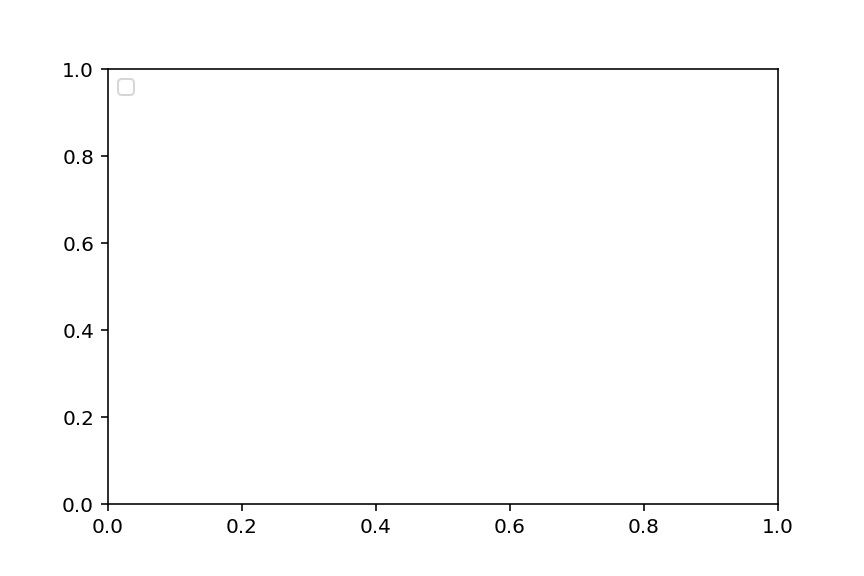

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


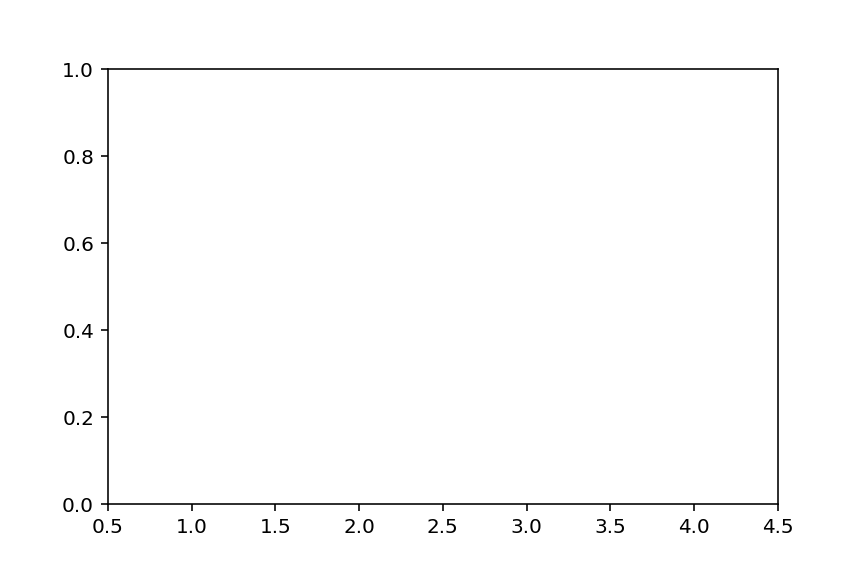

In [24]:
# JOAO - FIX - Automation WarmUp of Plot Library
import matplotlib.pyplot as plt
import time
plt.legend(loc = 'upper left')
fig= plt.figure()
ax= fig.add_subplot(111)
ax.set_xlim(0.5, 4.5)
plt.show()

In [25]:
%matplotlib notebook

<IPython.core.display.Javascript object>


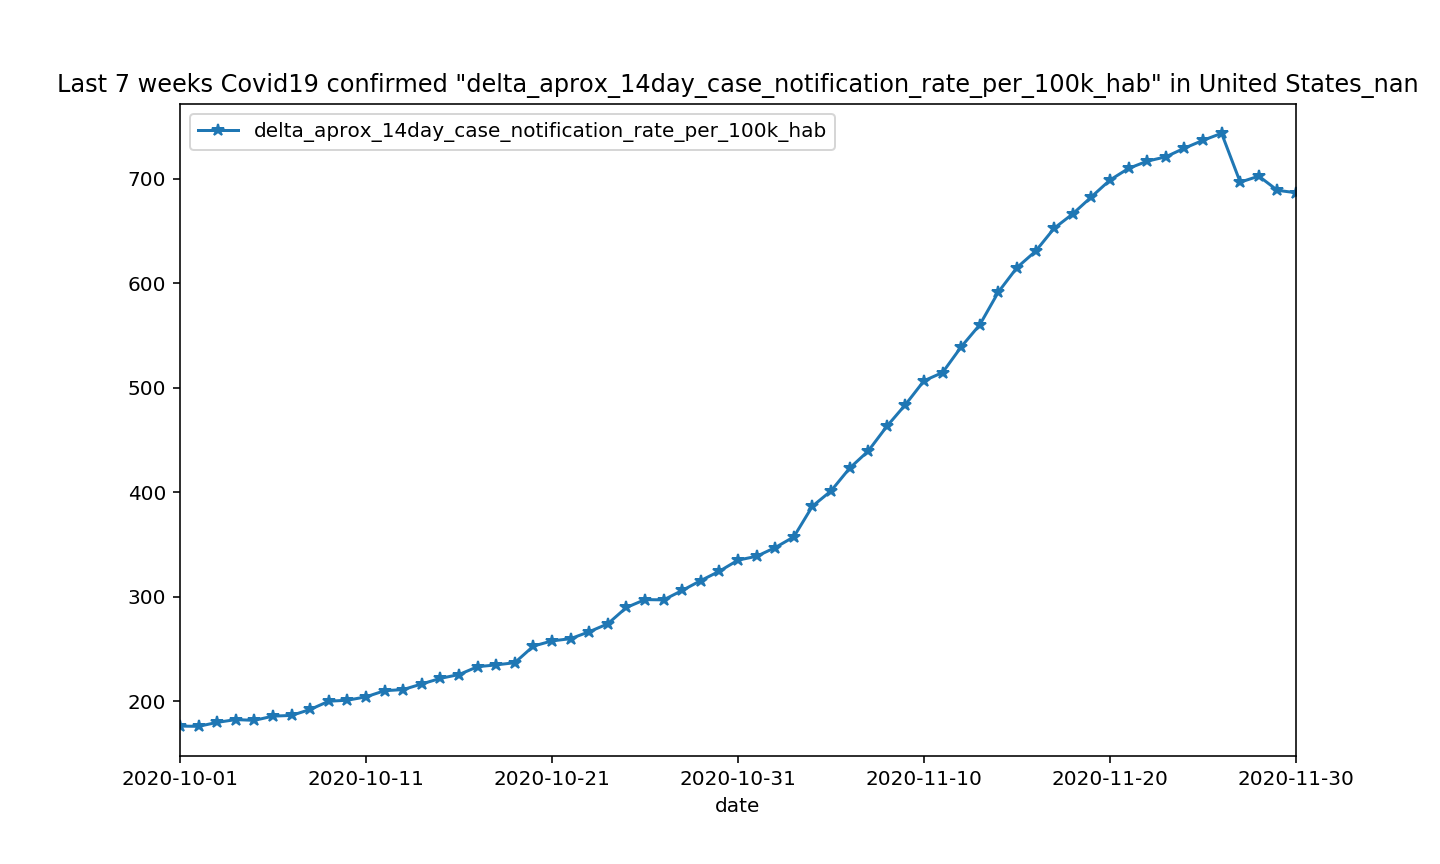

In [26]:
region='United States_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


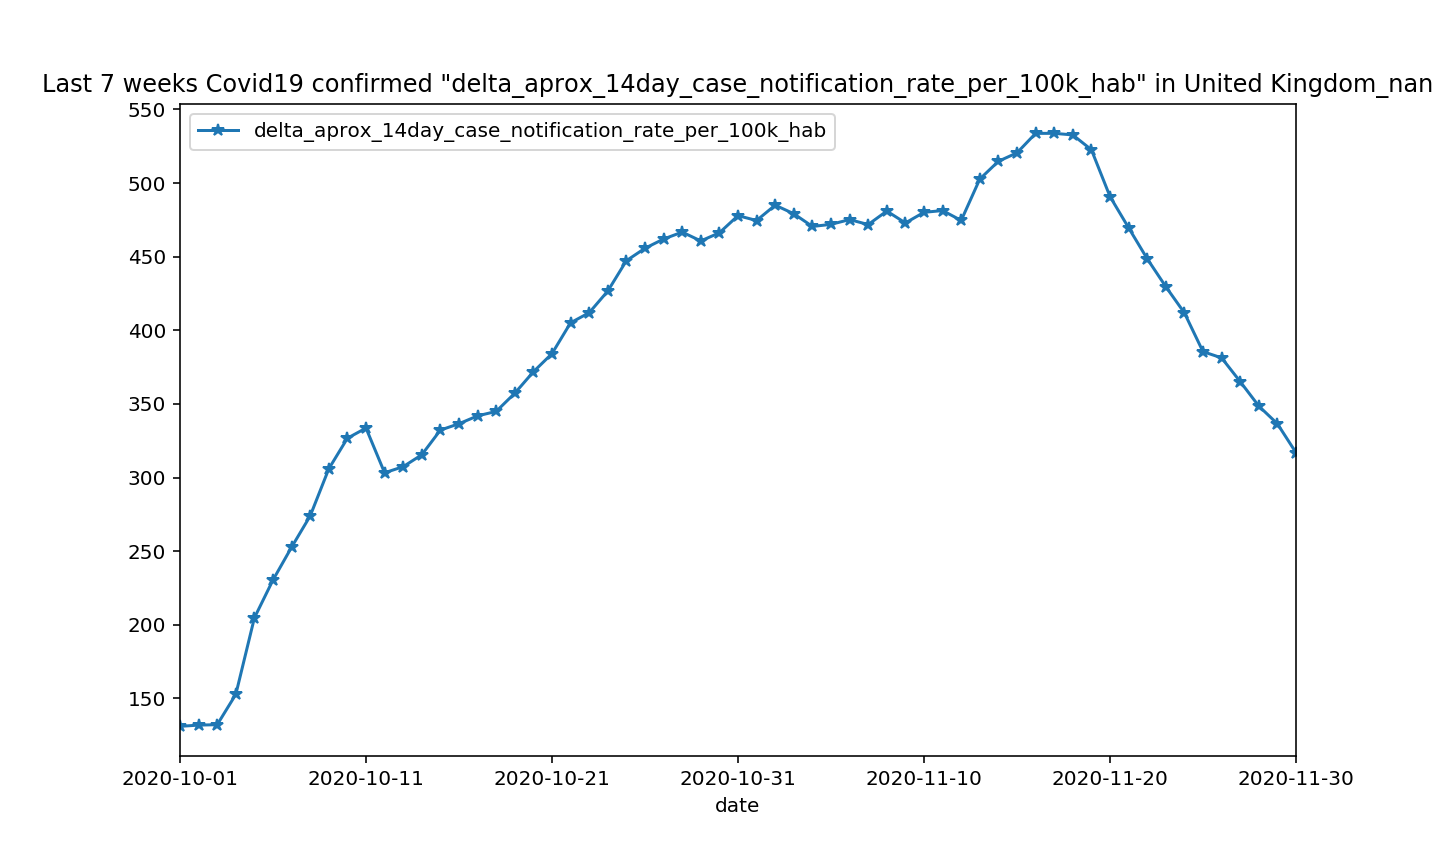

In [27]:
region='United Kingdom_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


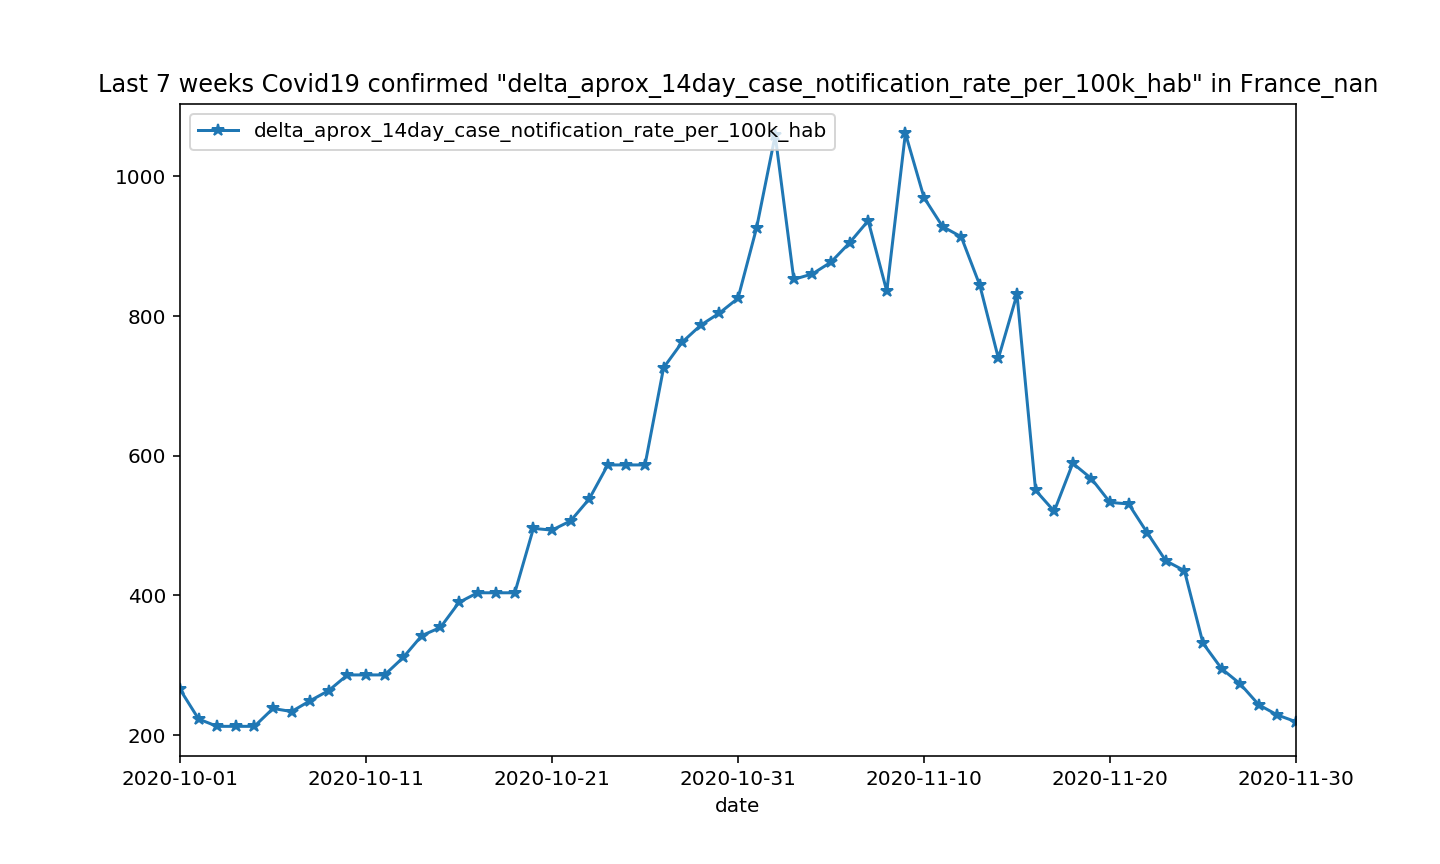

In [28]:
region='France_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


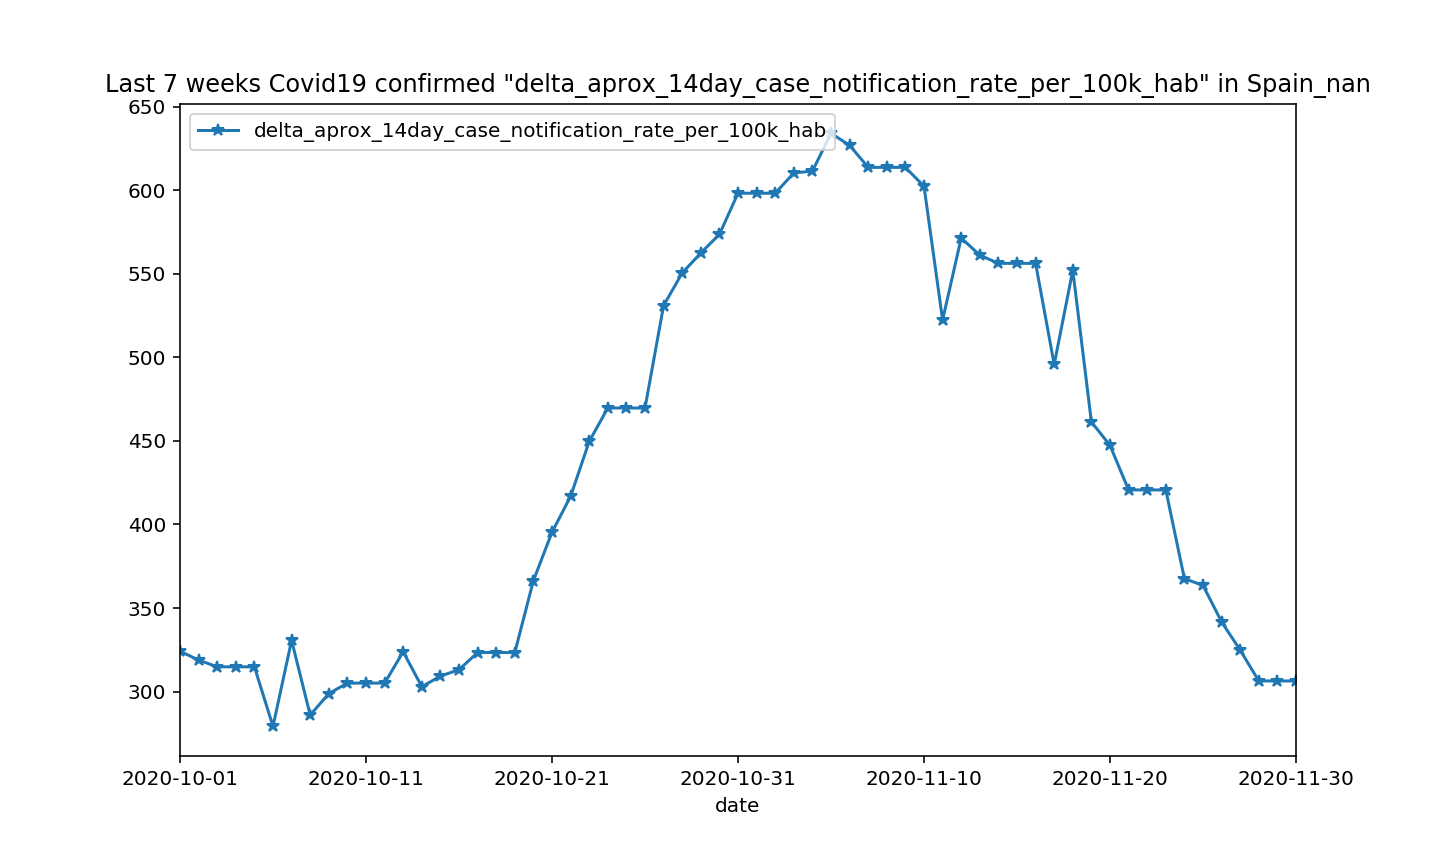

In [29]:
region='Spain_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


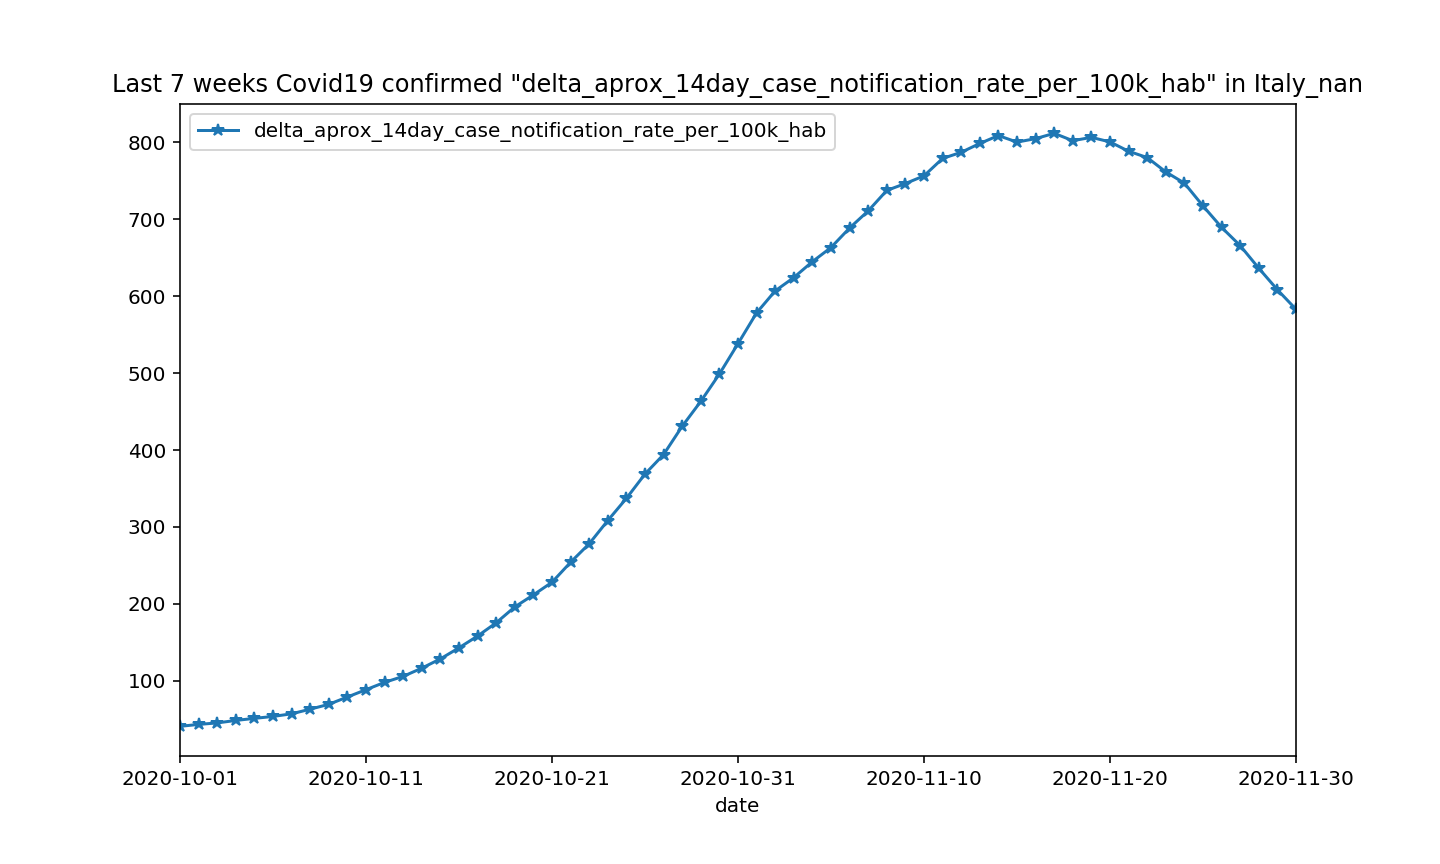

In [30]:
region='Italy_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


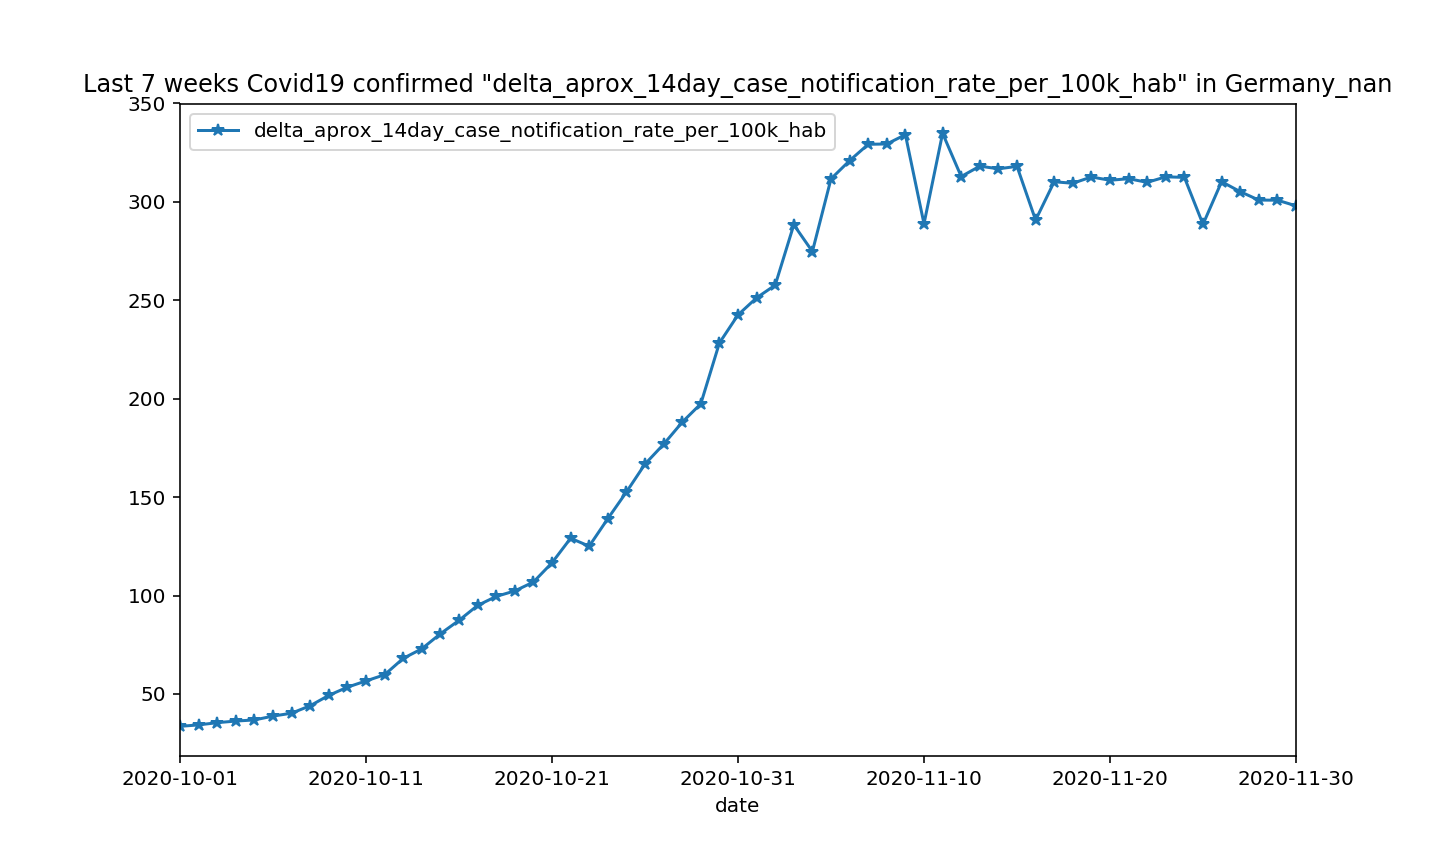

In [31]:
region='Germany_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


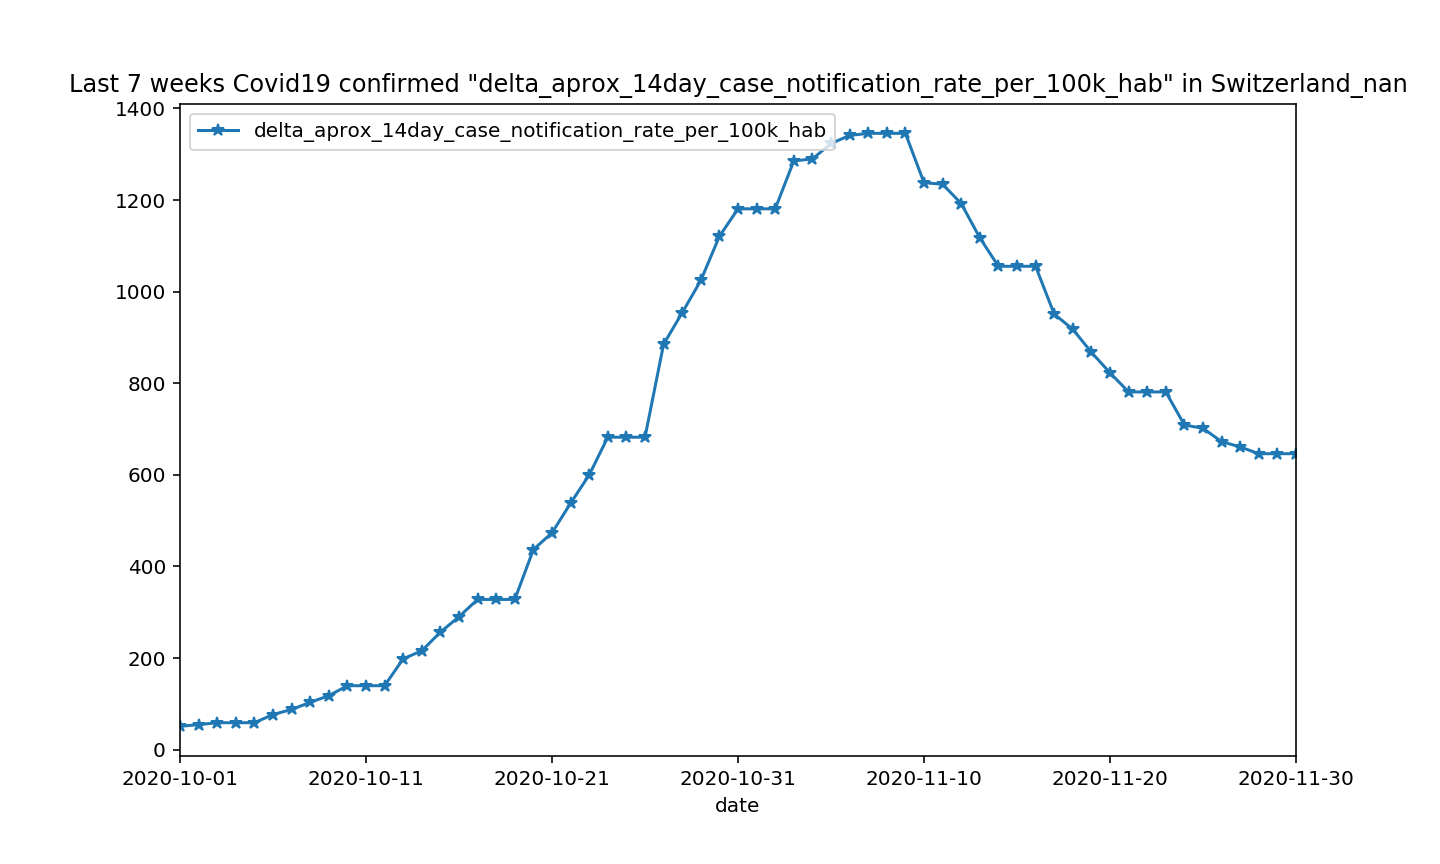

In [32]:
region='Switzerland_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


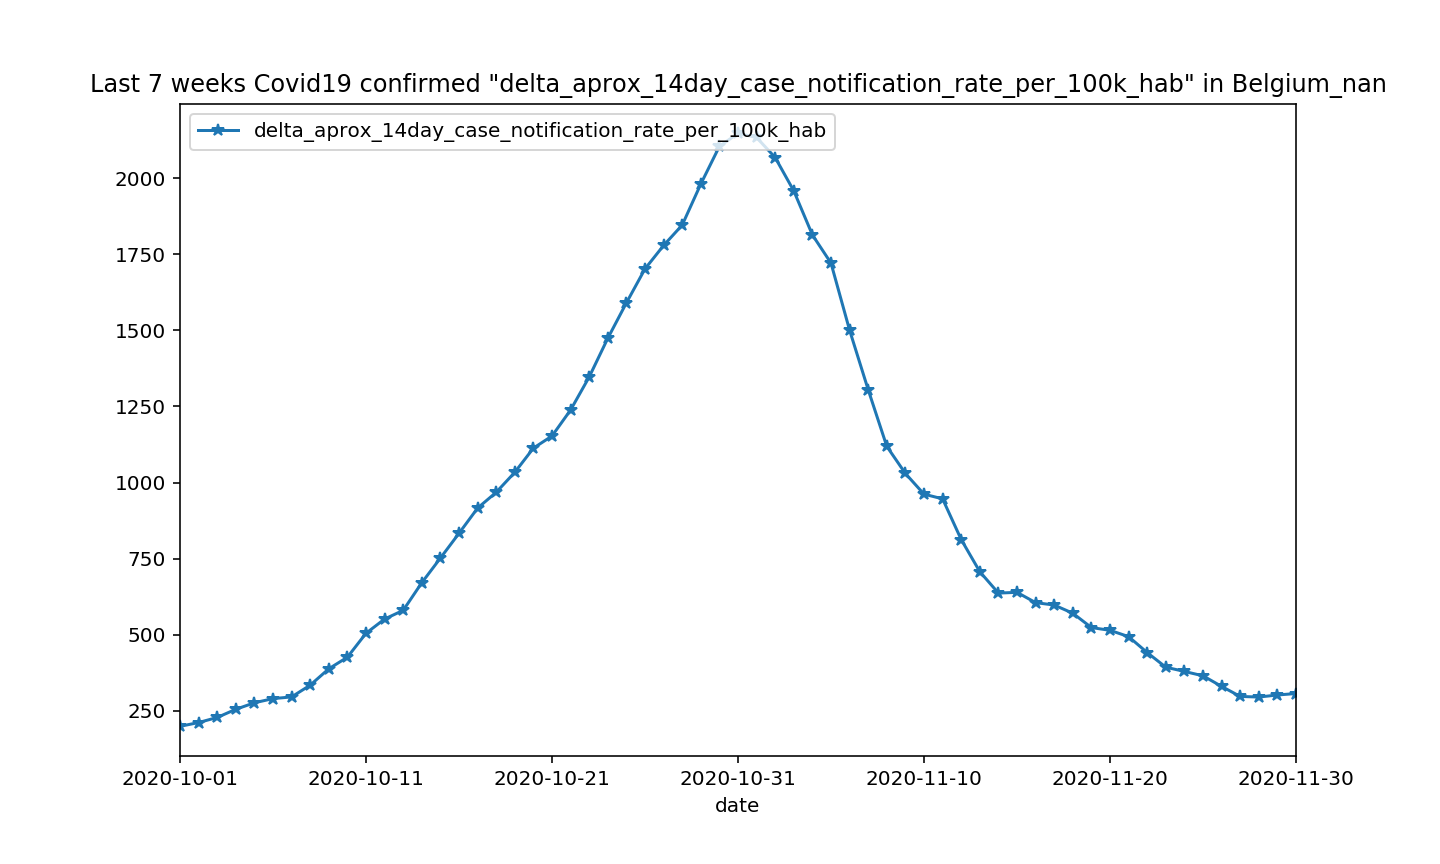

In [33]:
region='Belgium_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


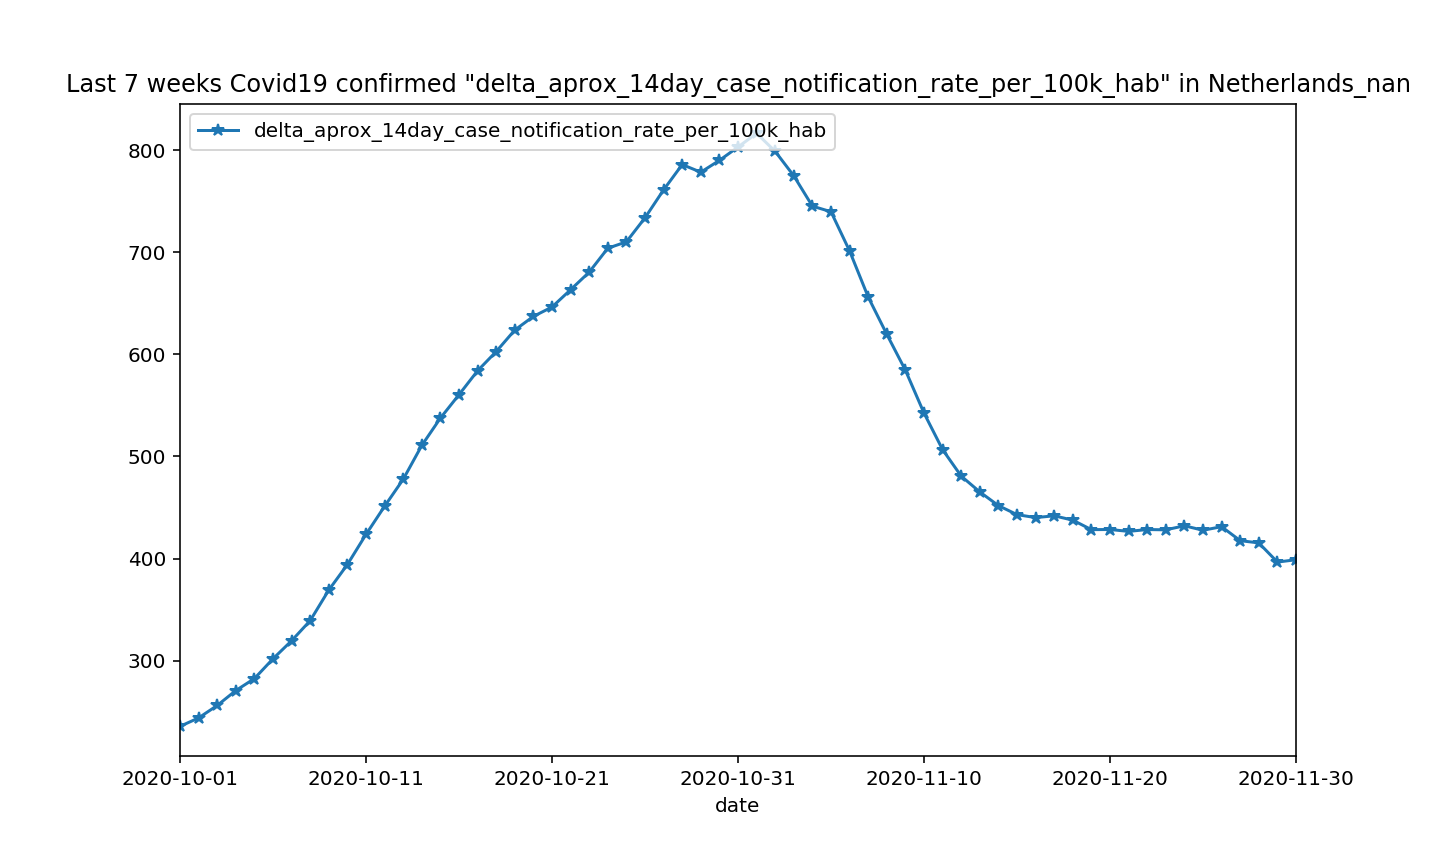

In [34]:
region='Netherlands_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


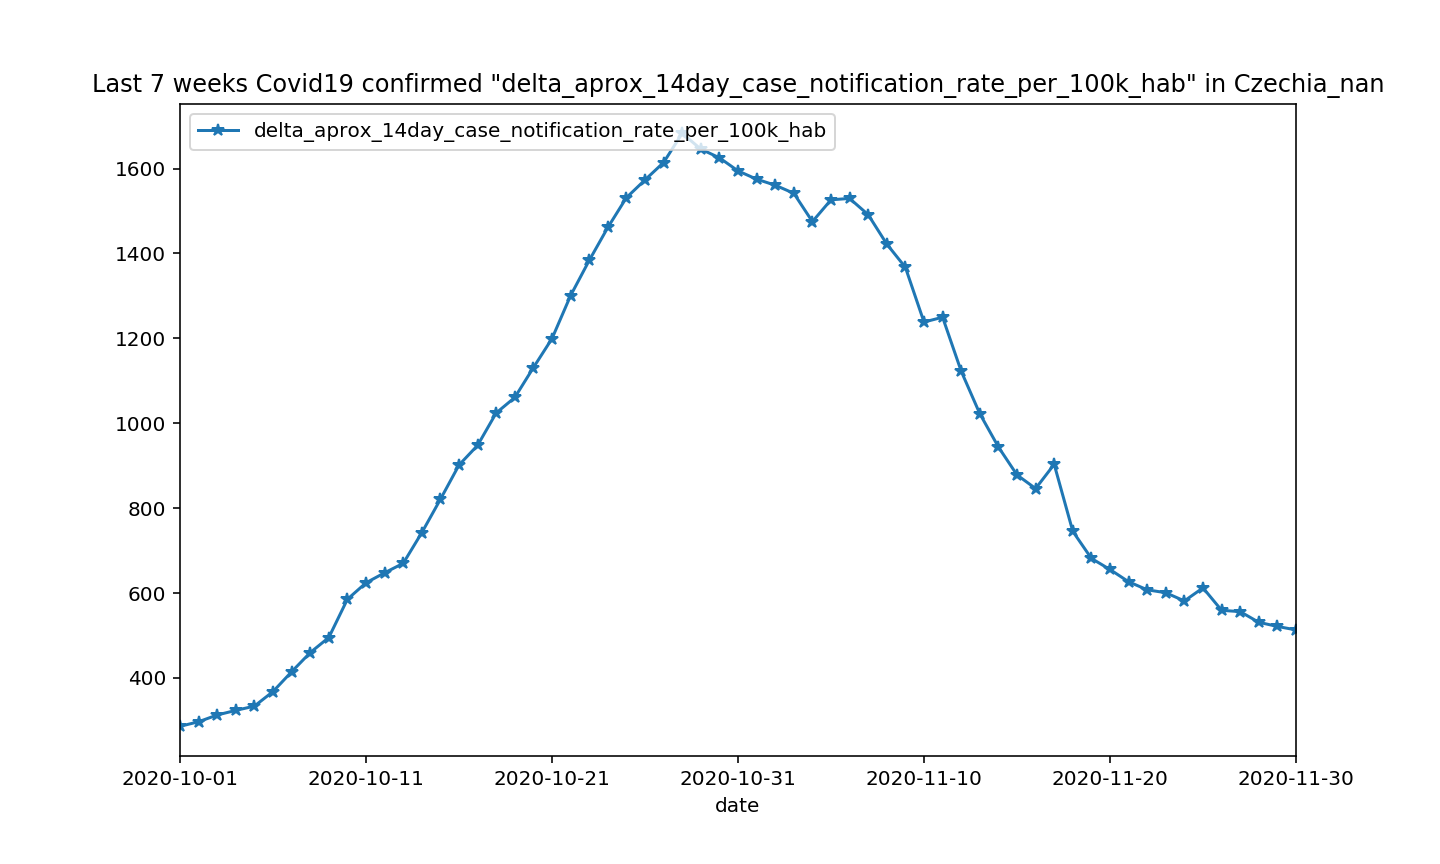

In [35]:
region='Czechia_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


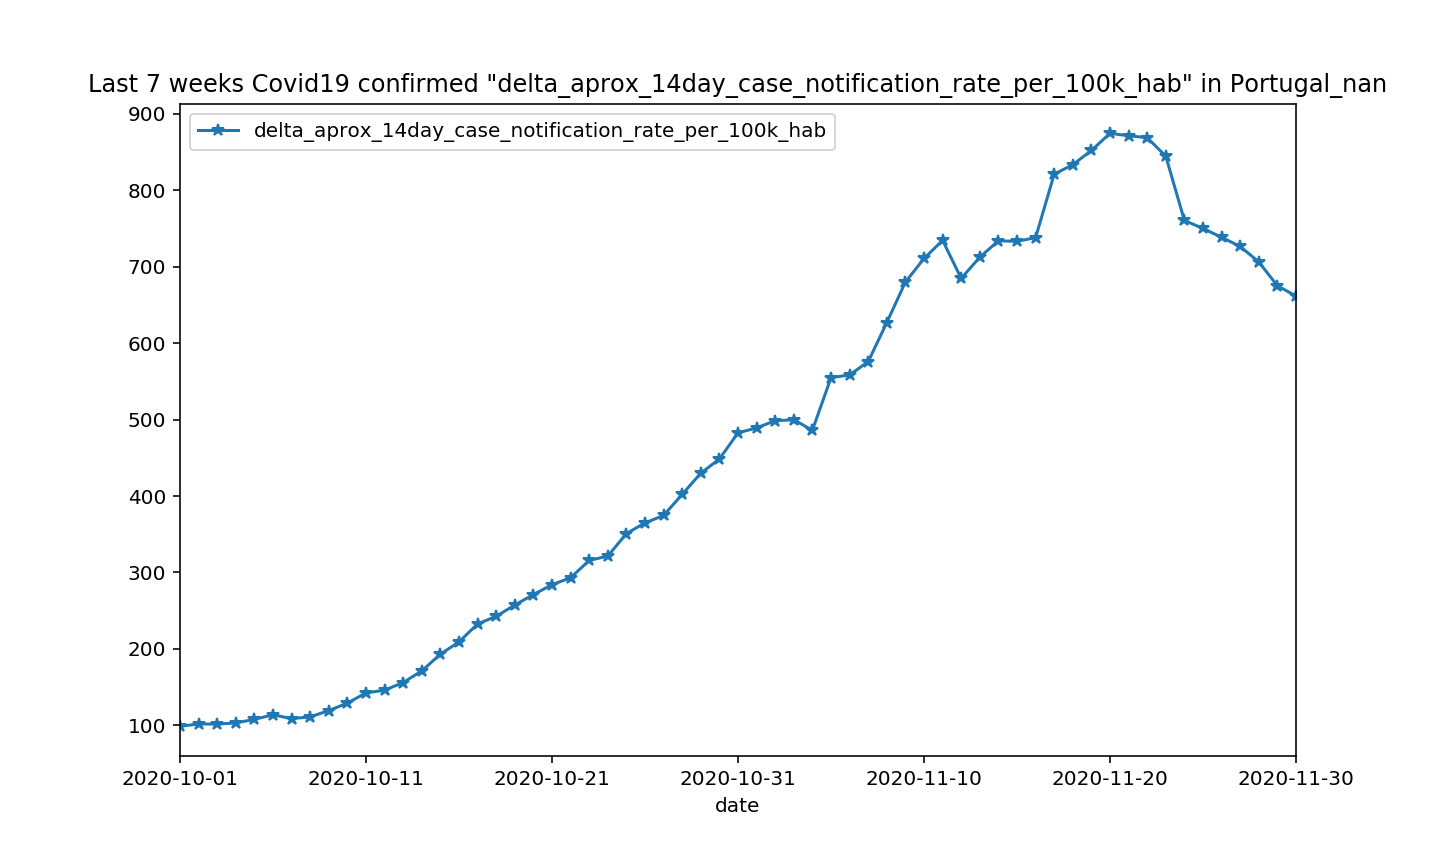

In [36]:
region='Portugal_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

In [37]:
%matplotlib notebook
#%matplotlib inline

<IPython.core.display.Javascript object>


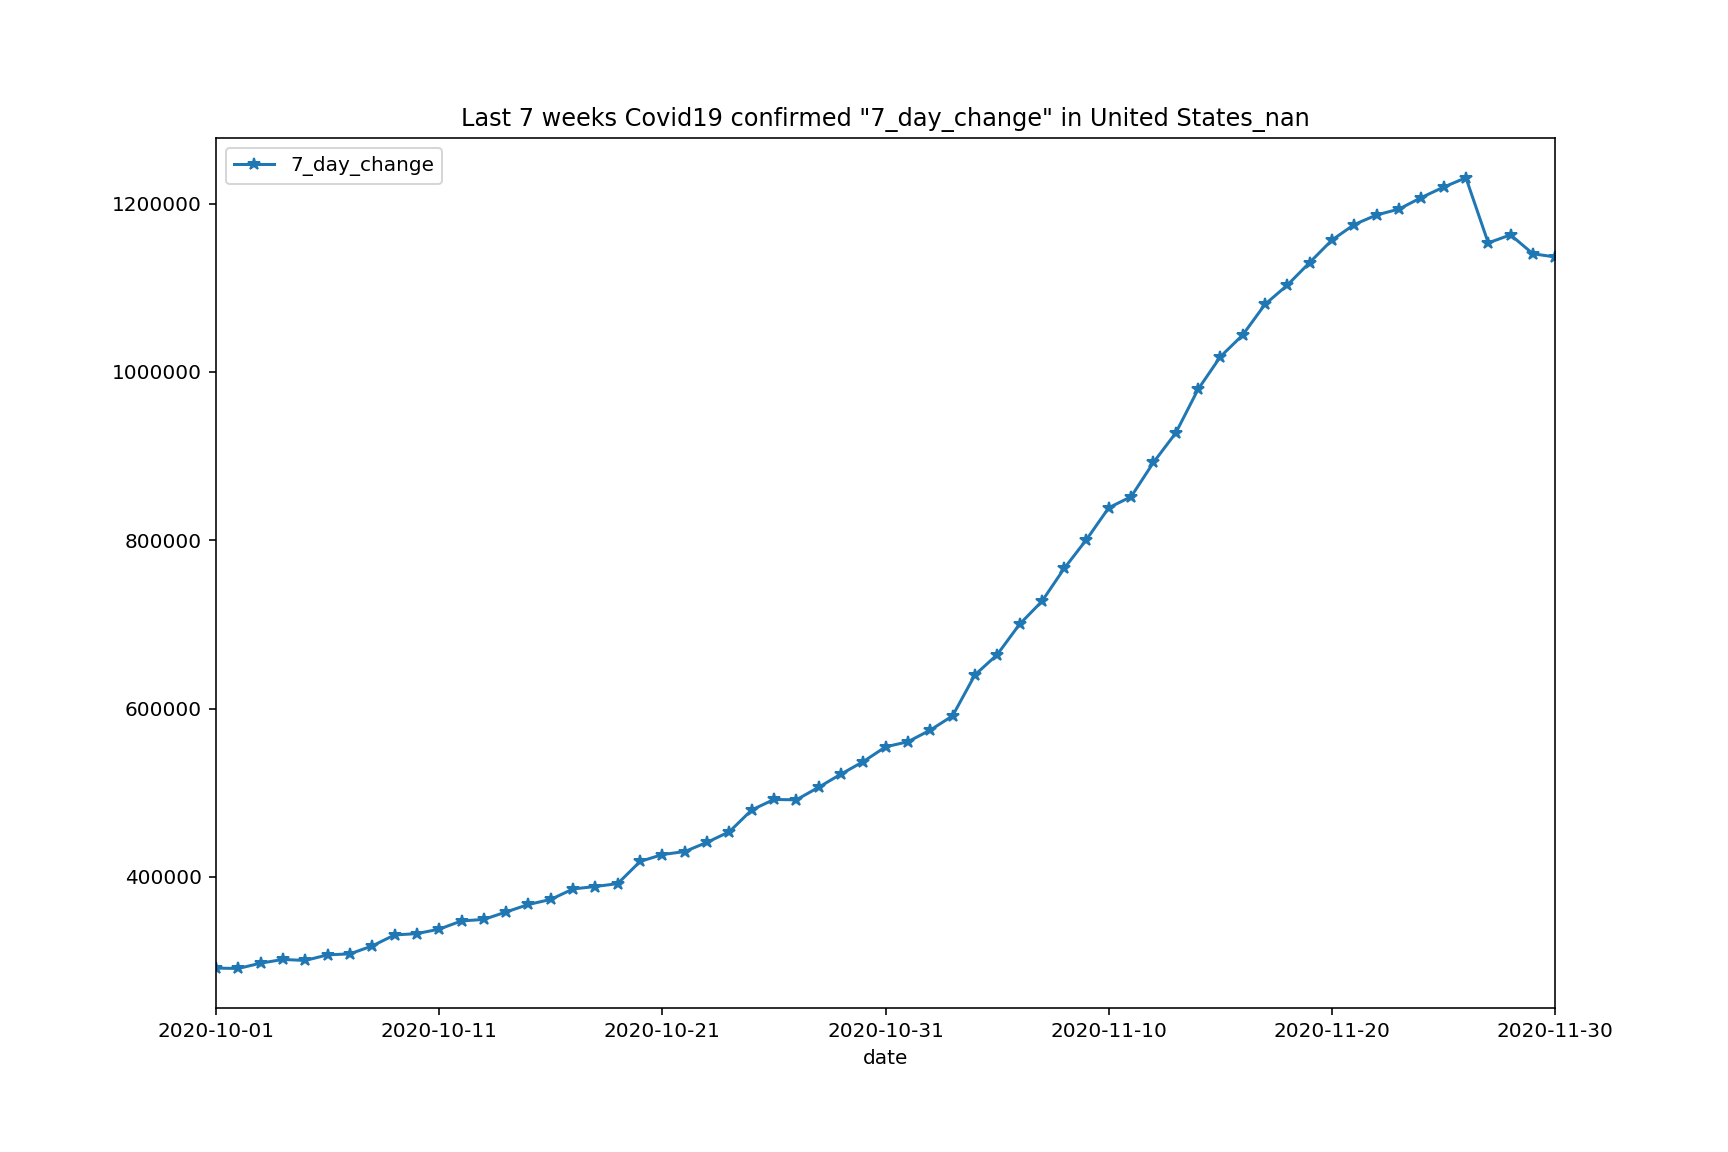

In [38]:
region='United States_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


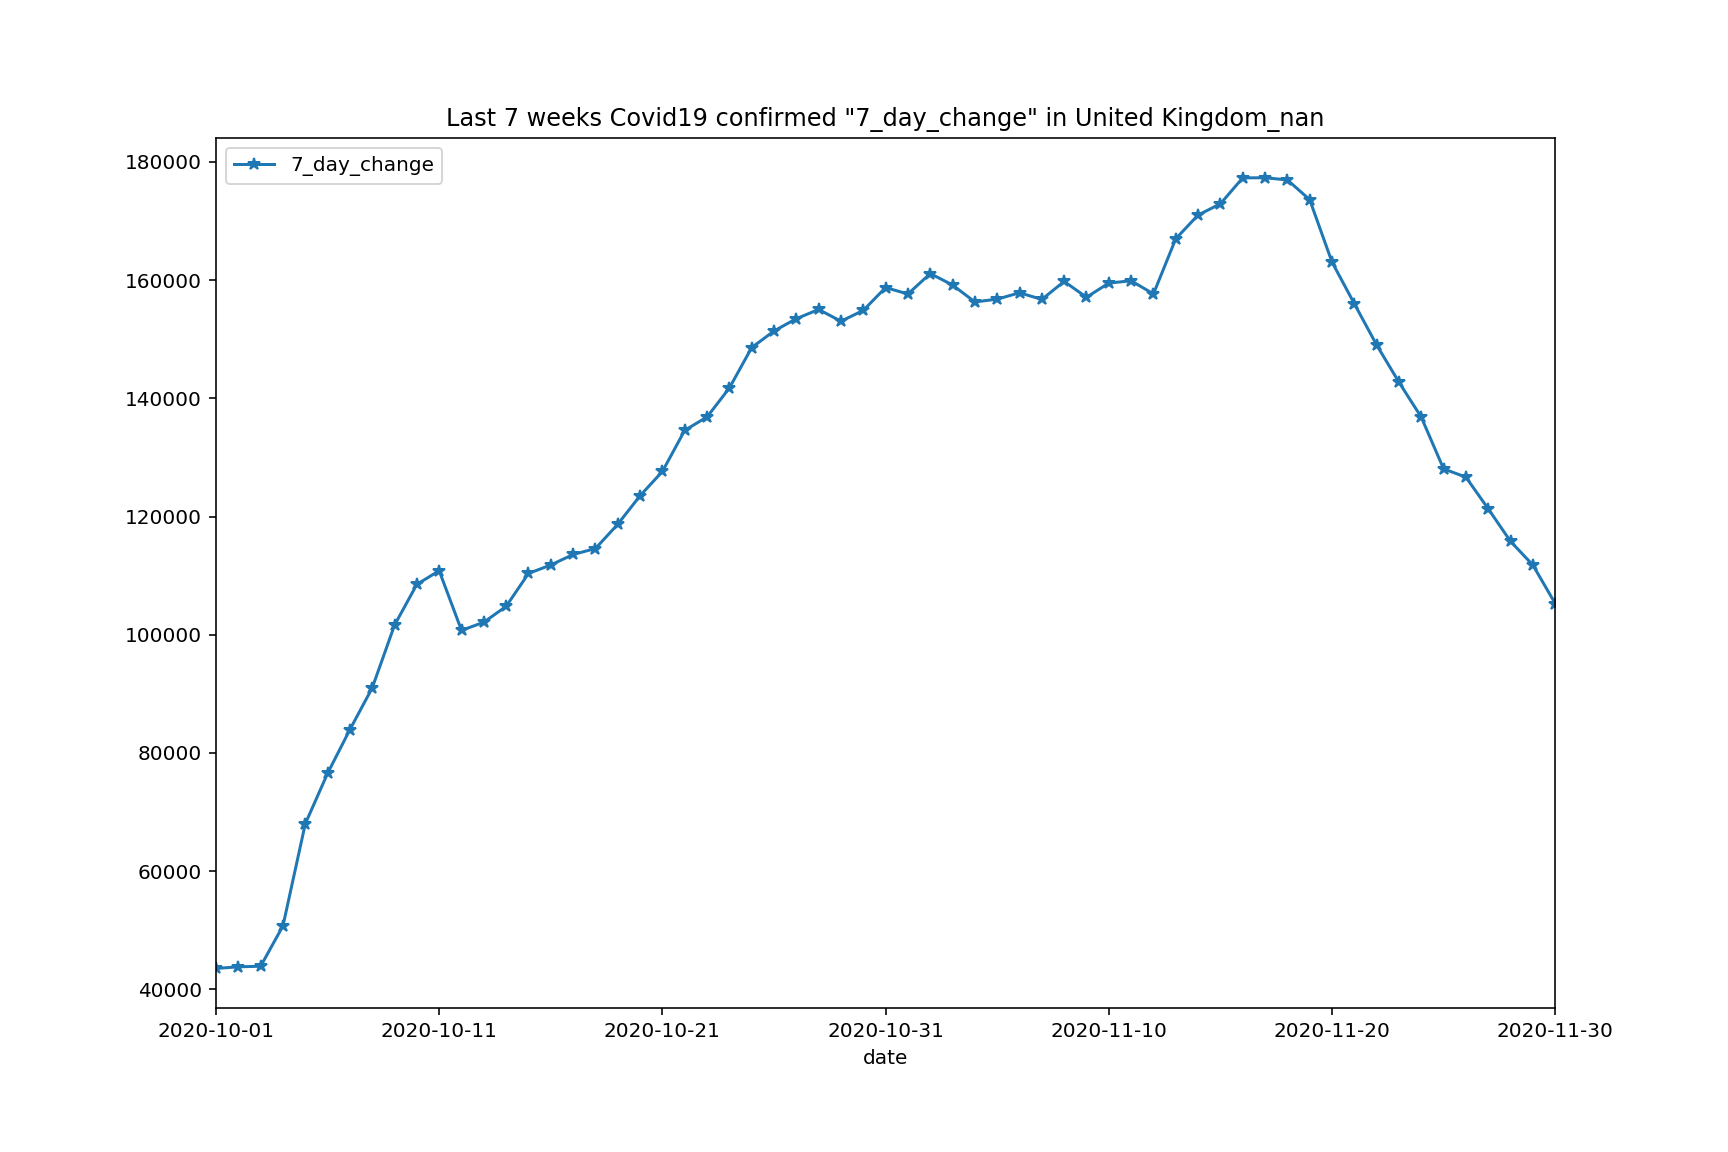

In [39]:
region='United Kingdom_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


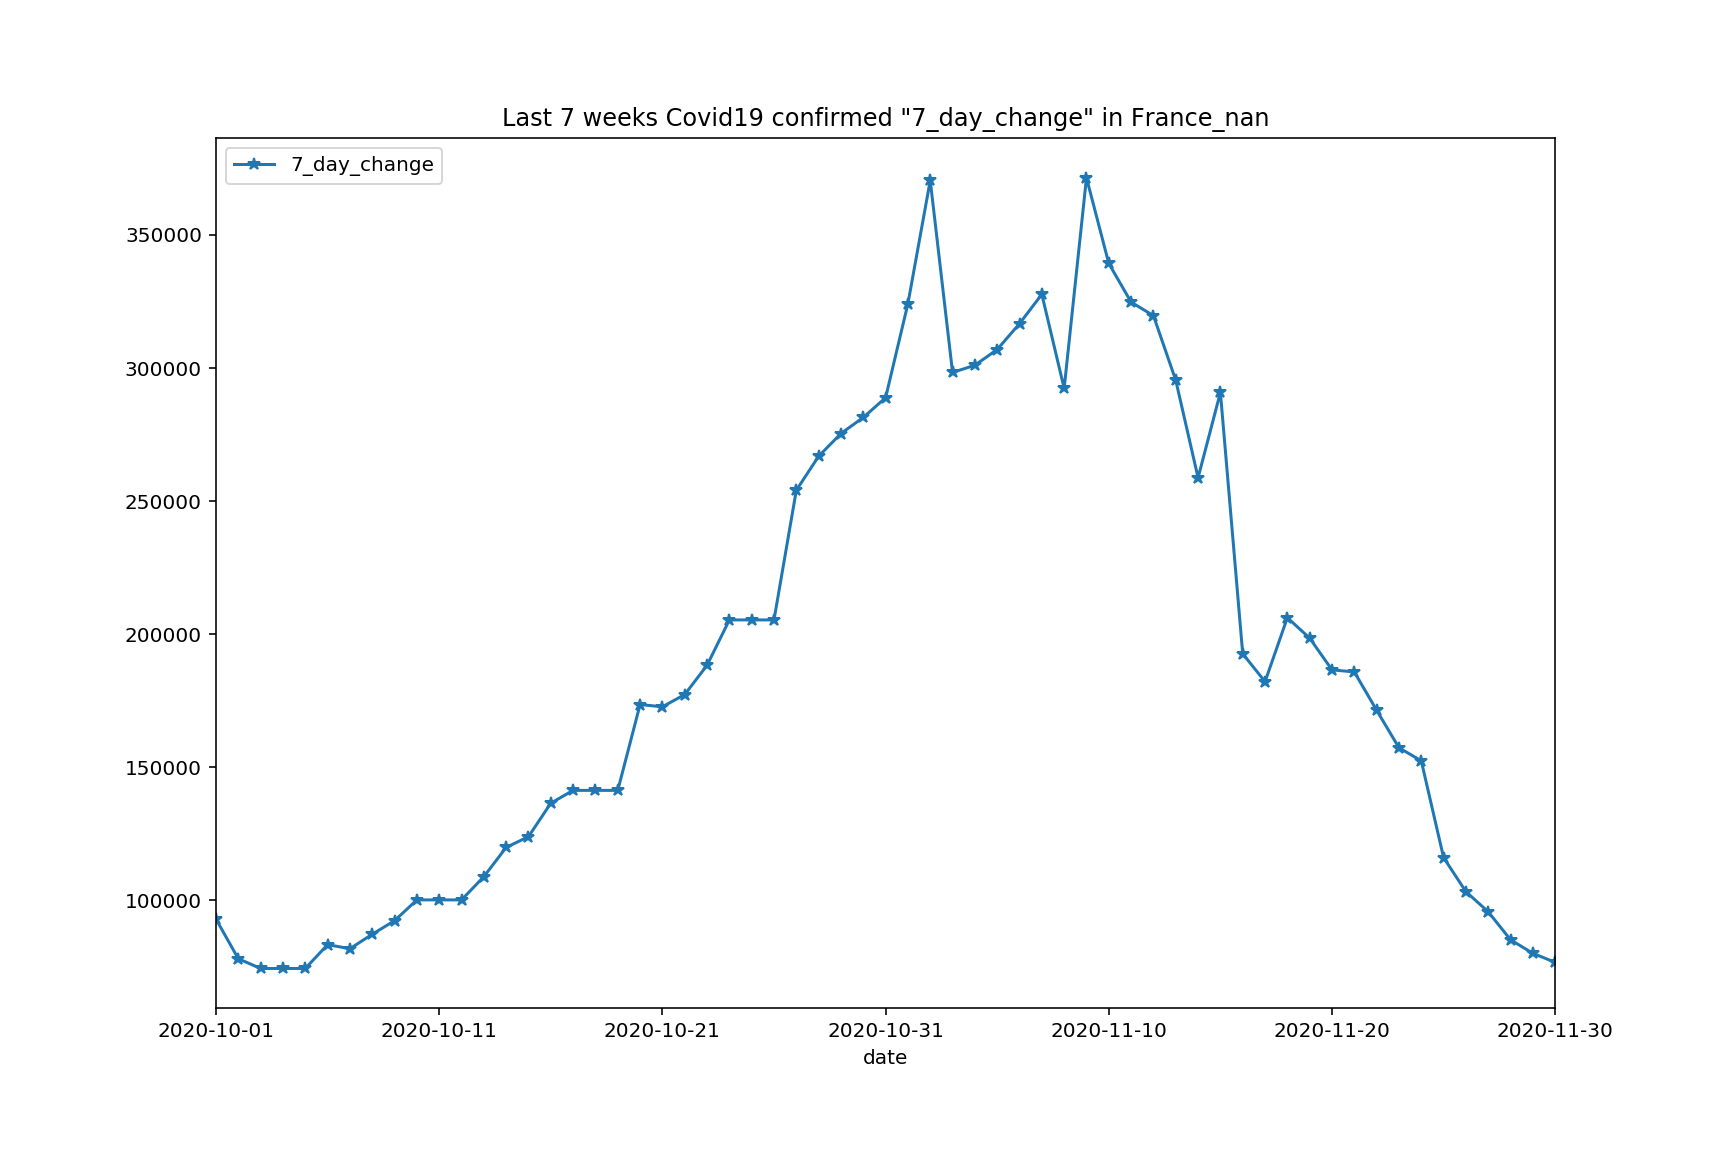

In [40]:
region='France_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


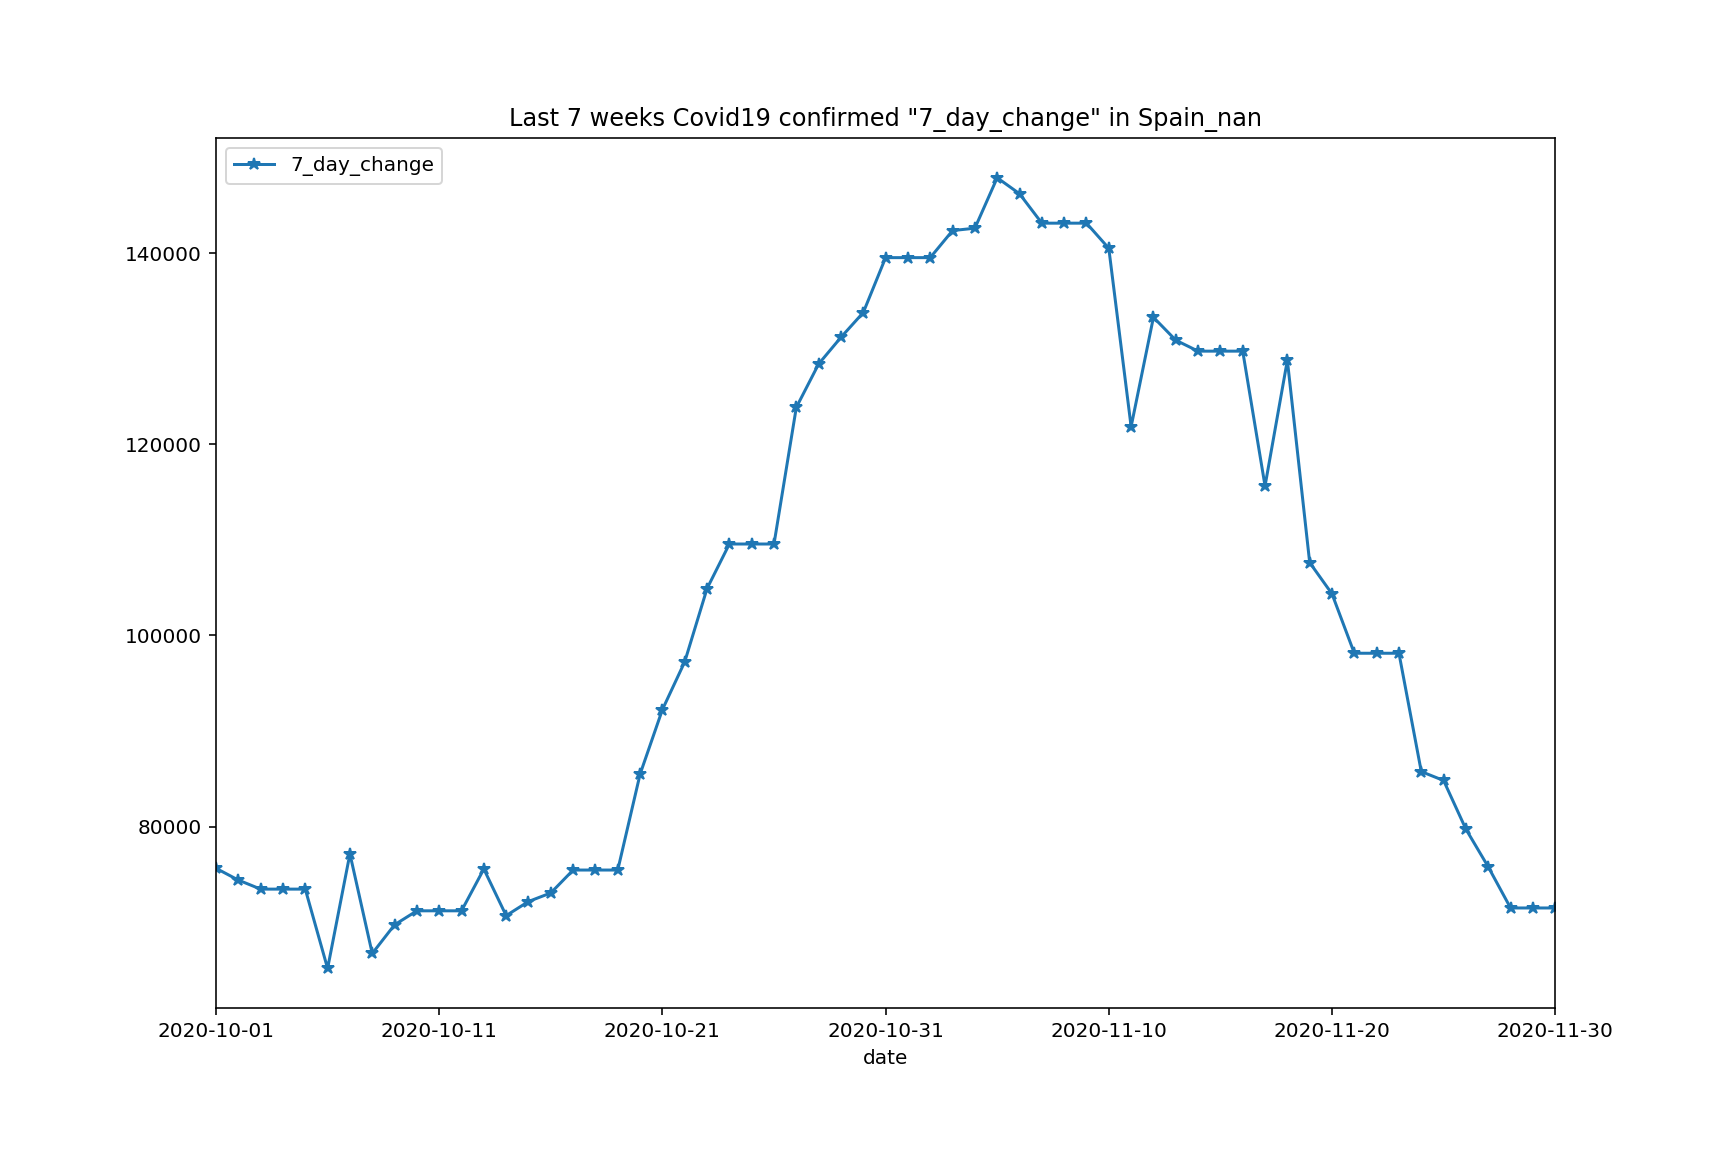

In [41]:
region='Spain_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


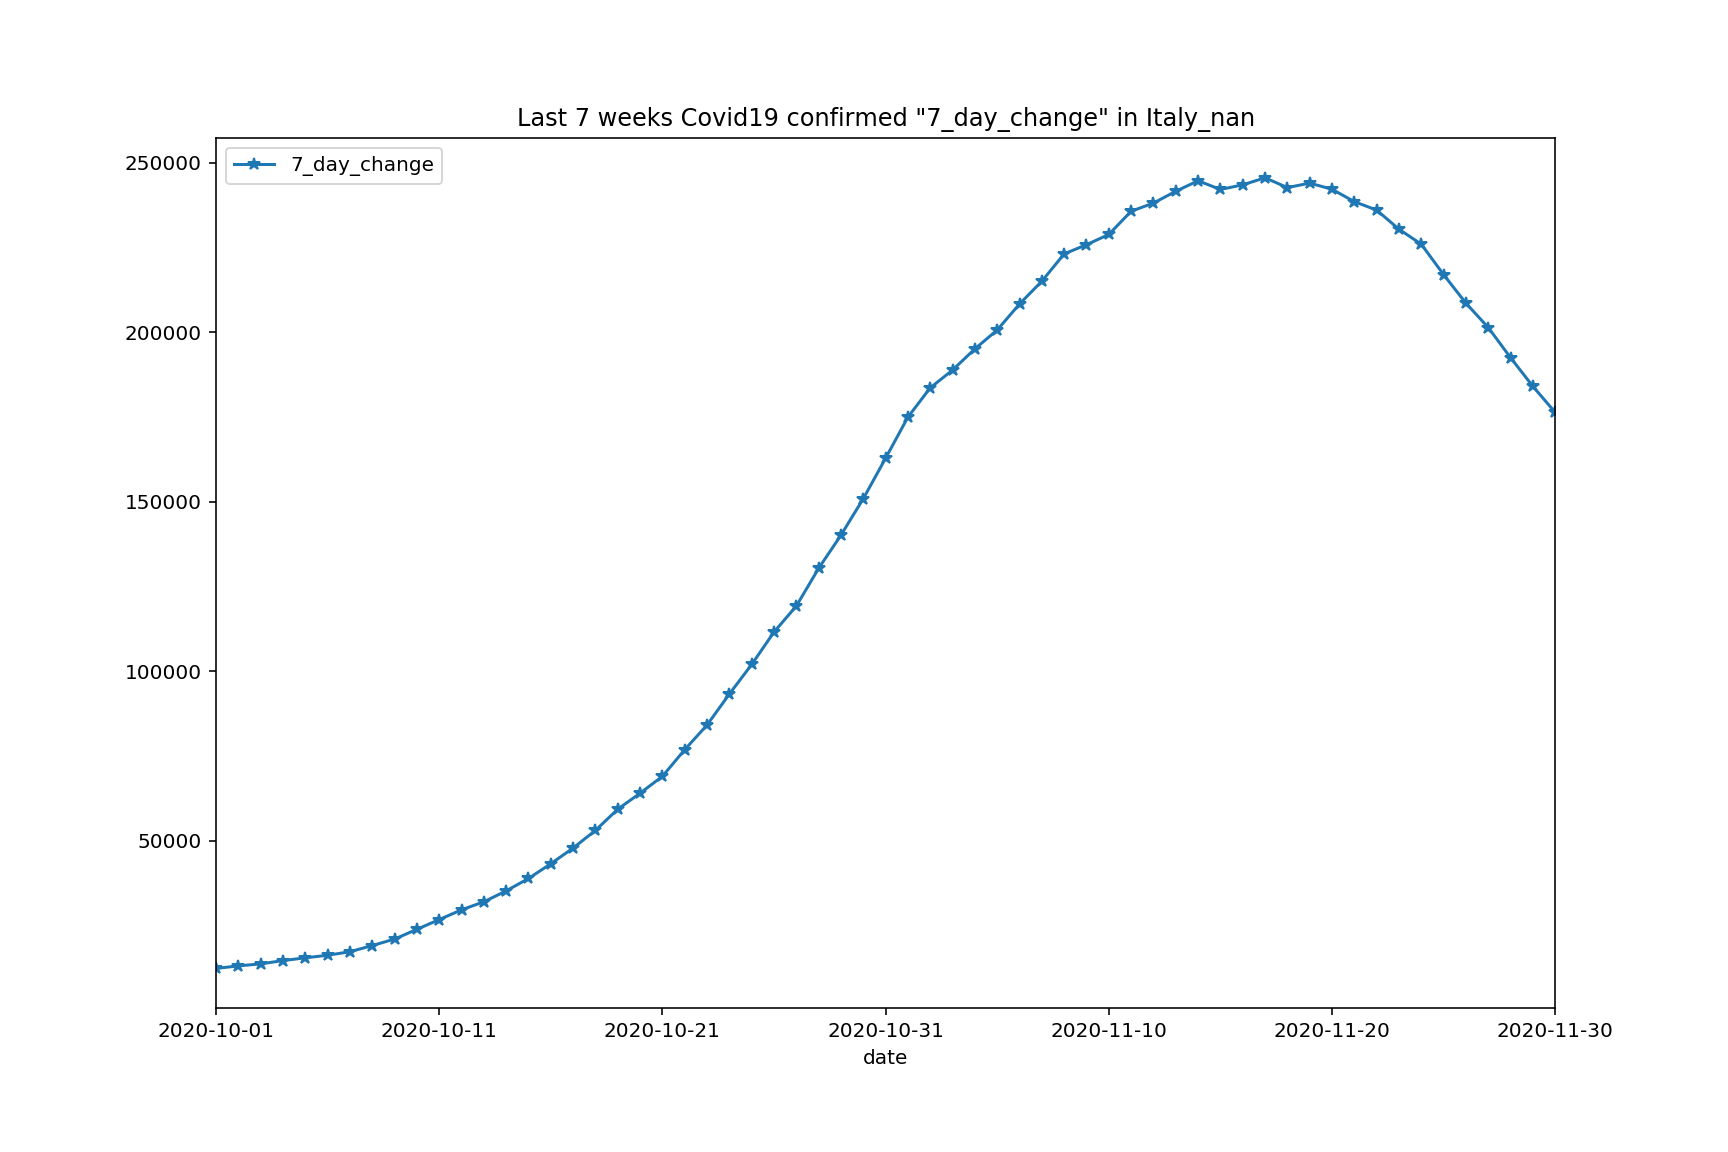

In [42]:
region='Italy_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


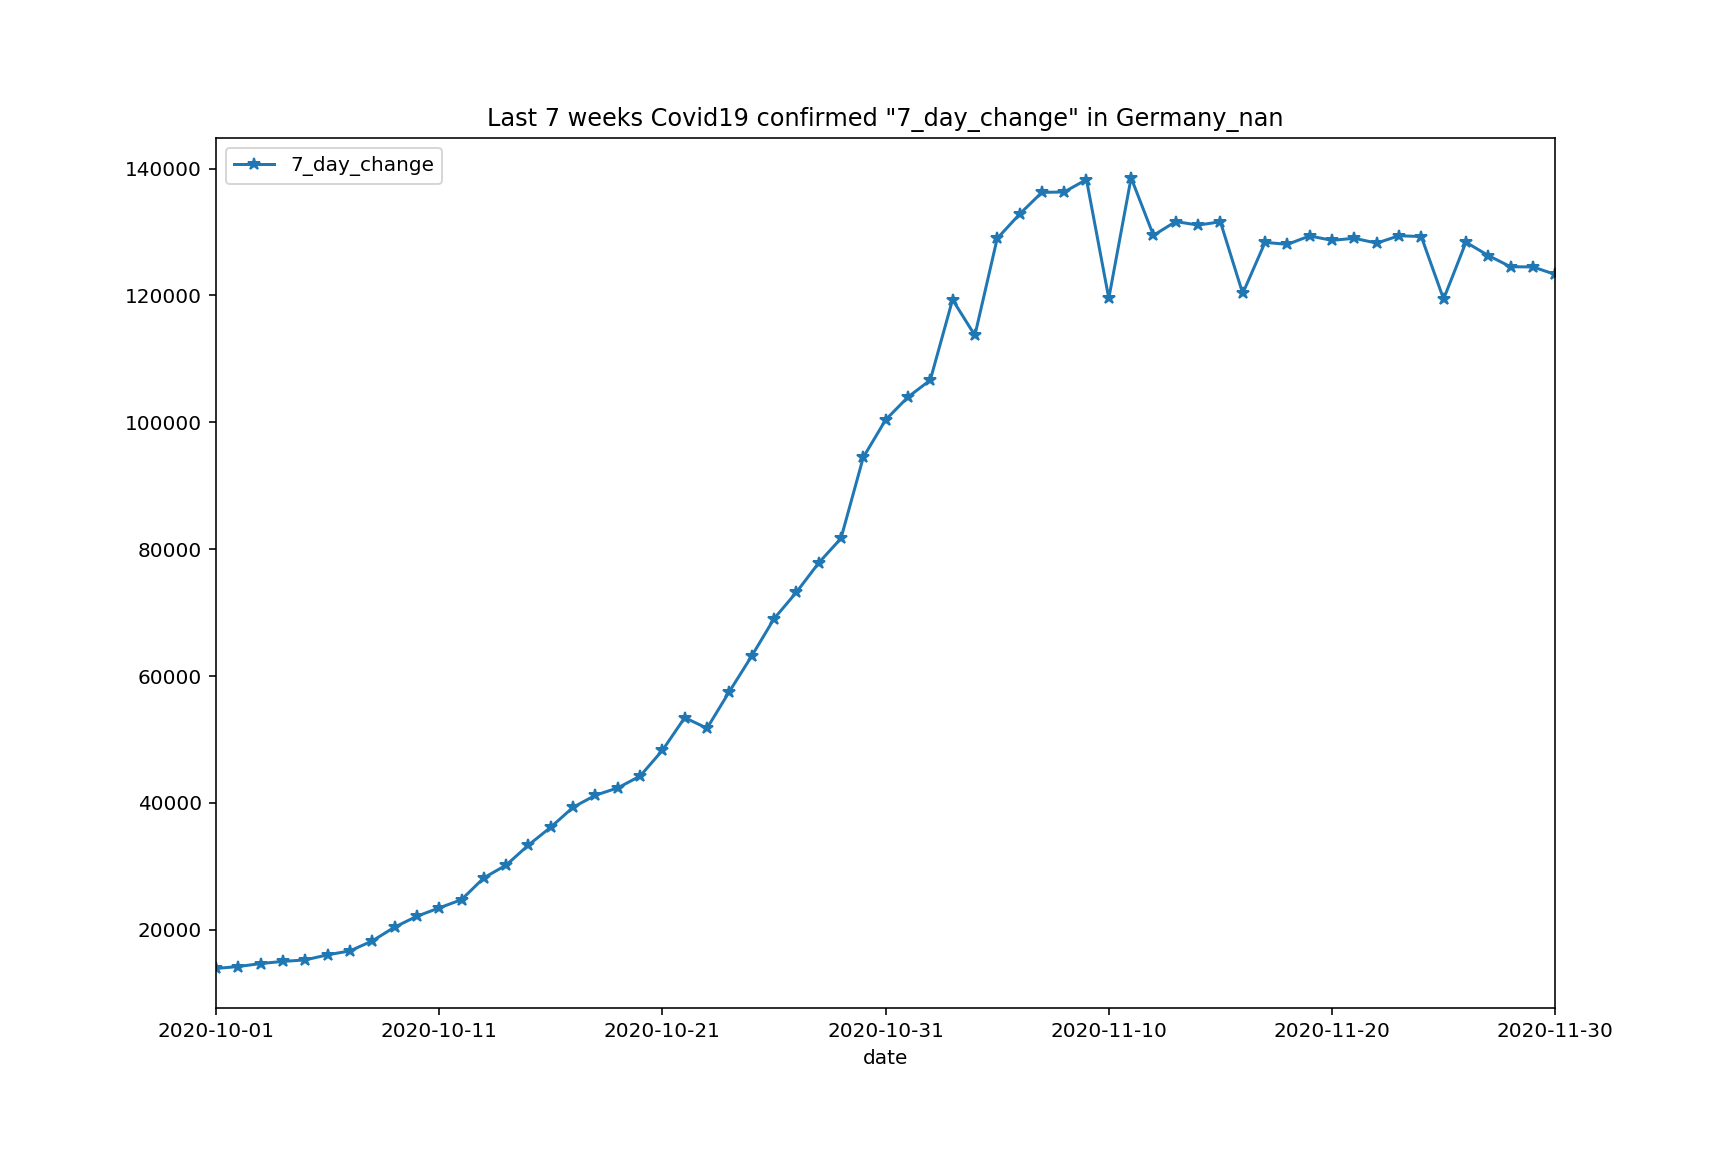

In [43]:
region='Germany_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


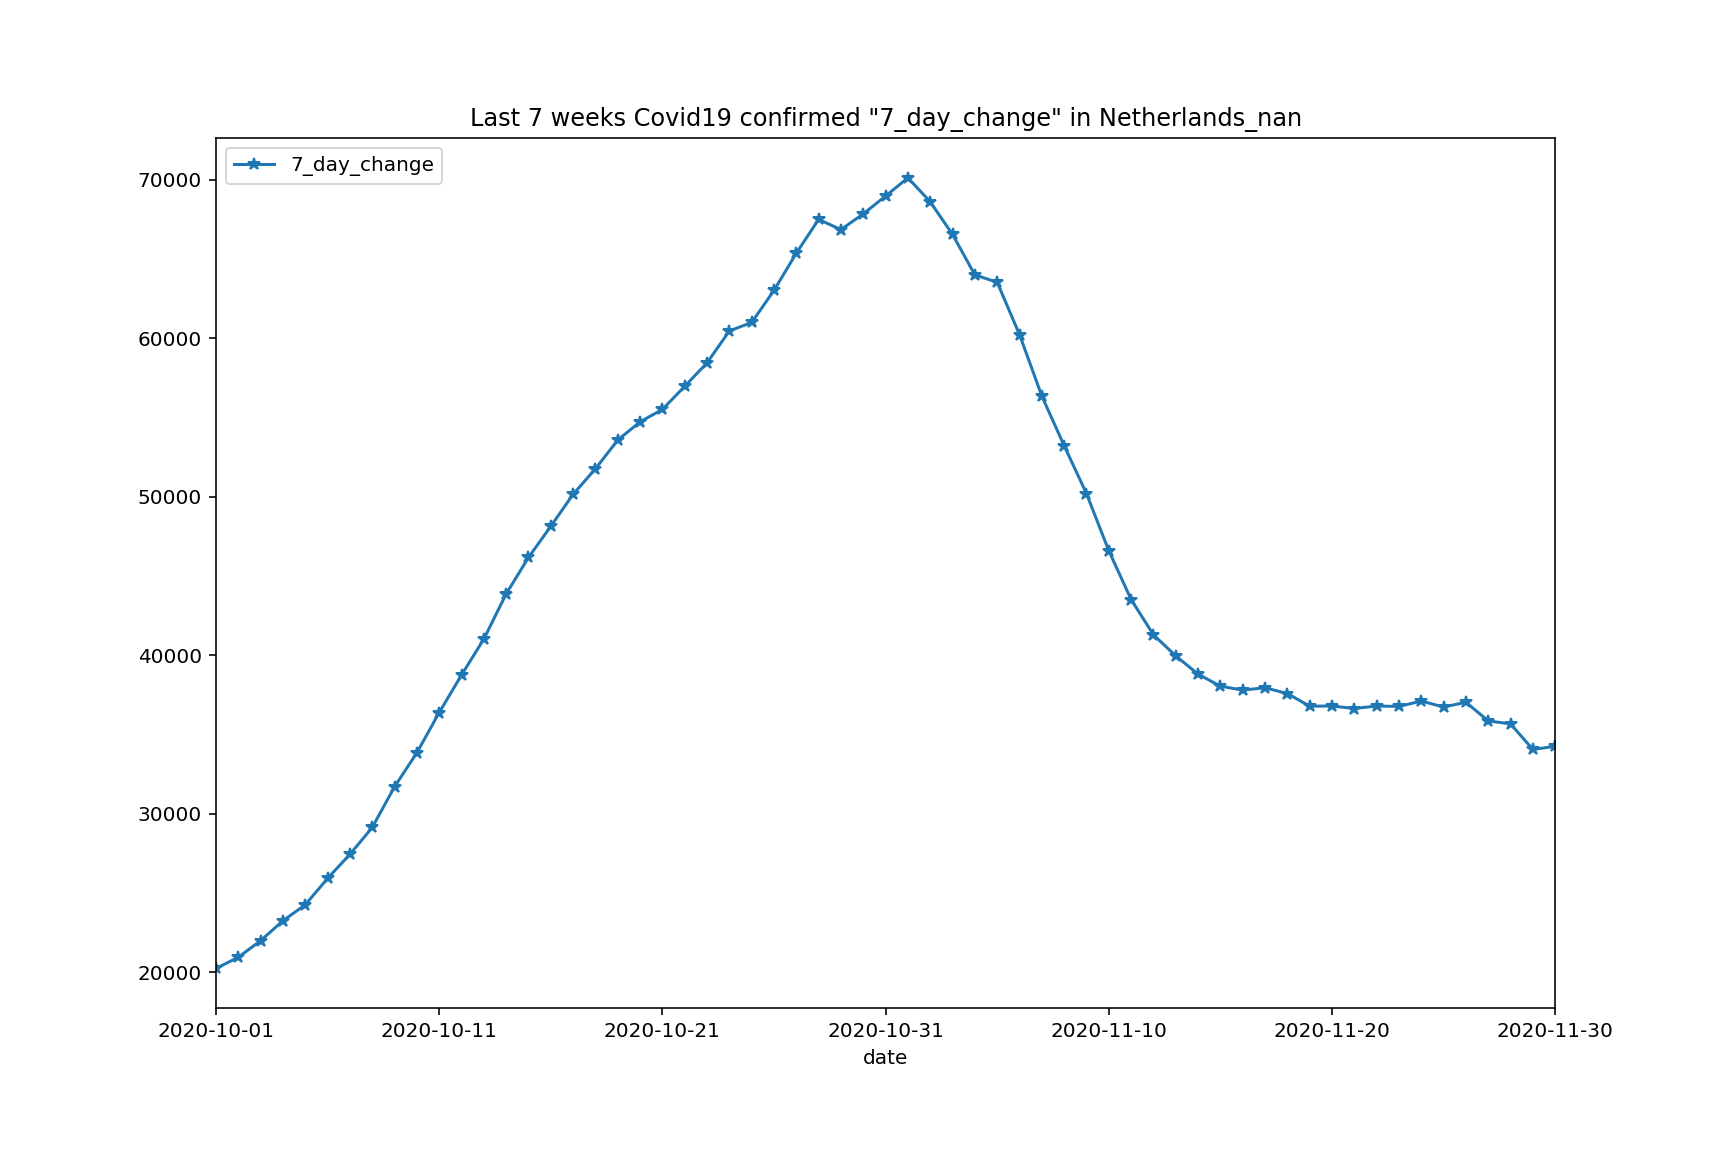

In [44]:
region='Netherlands_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


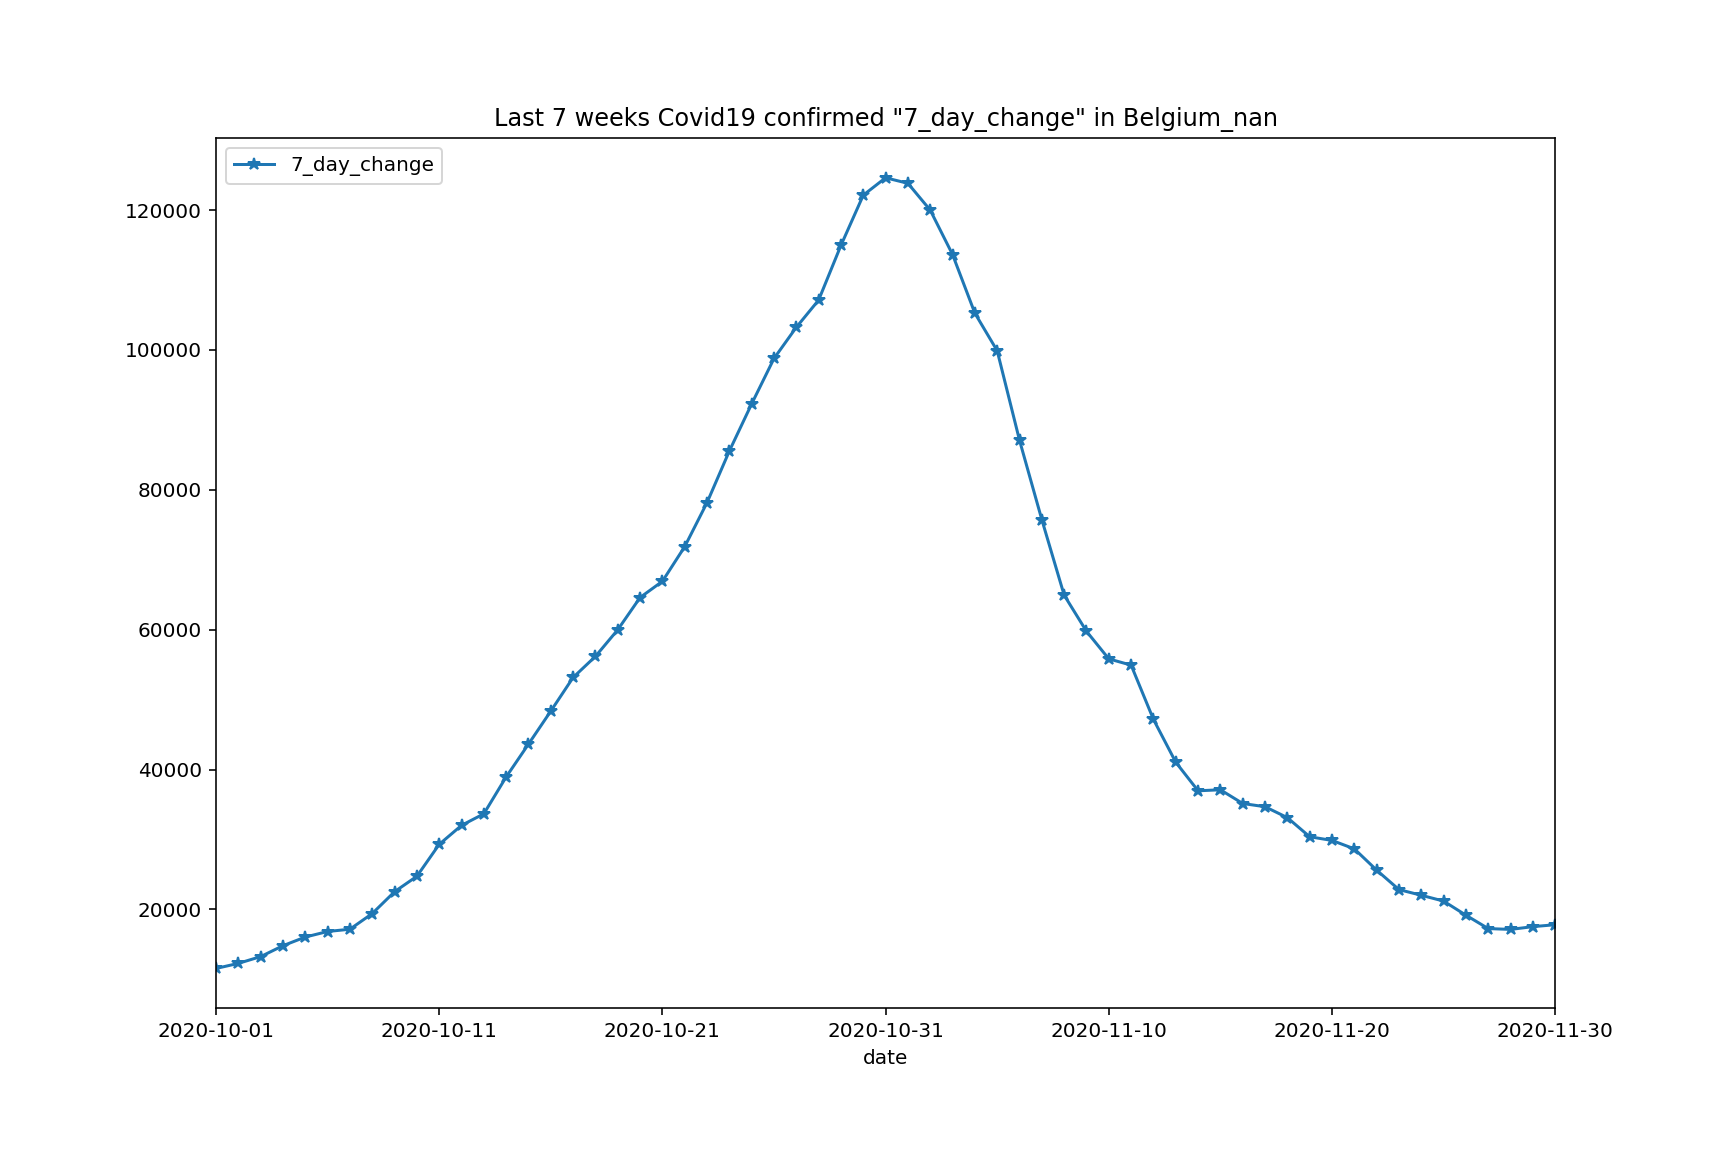

In [45]:
region='Belgium_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


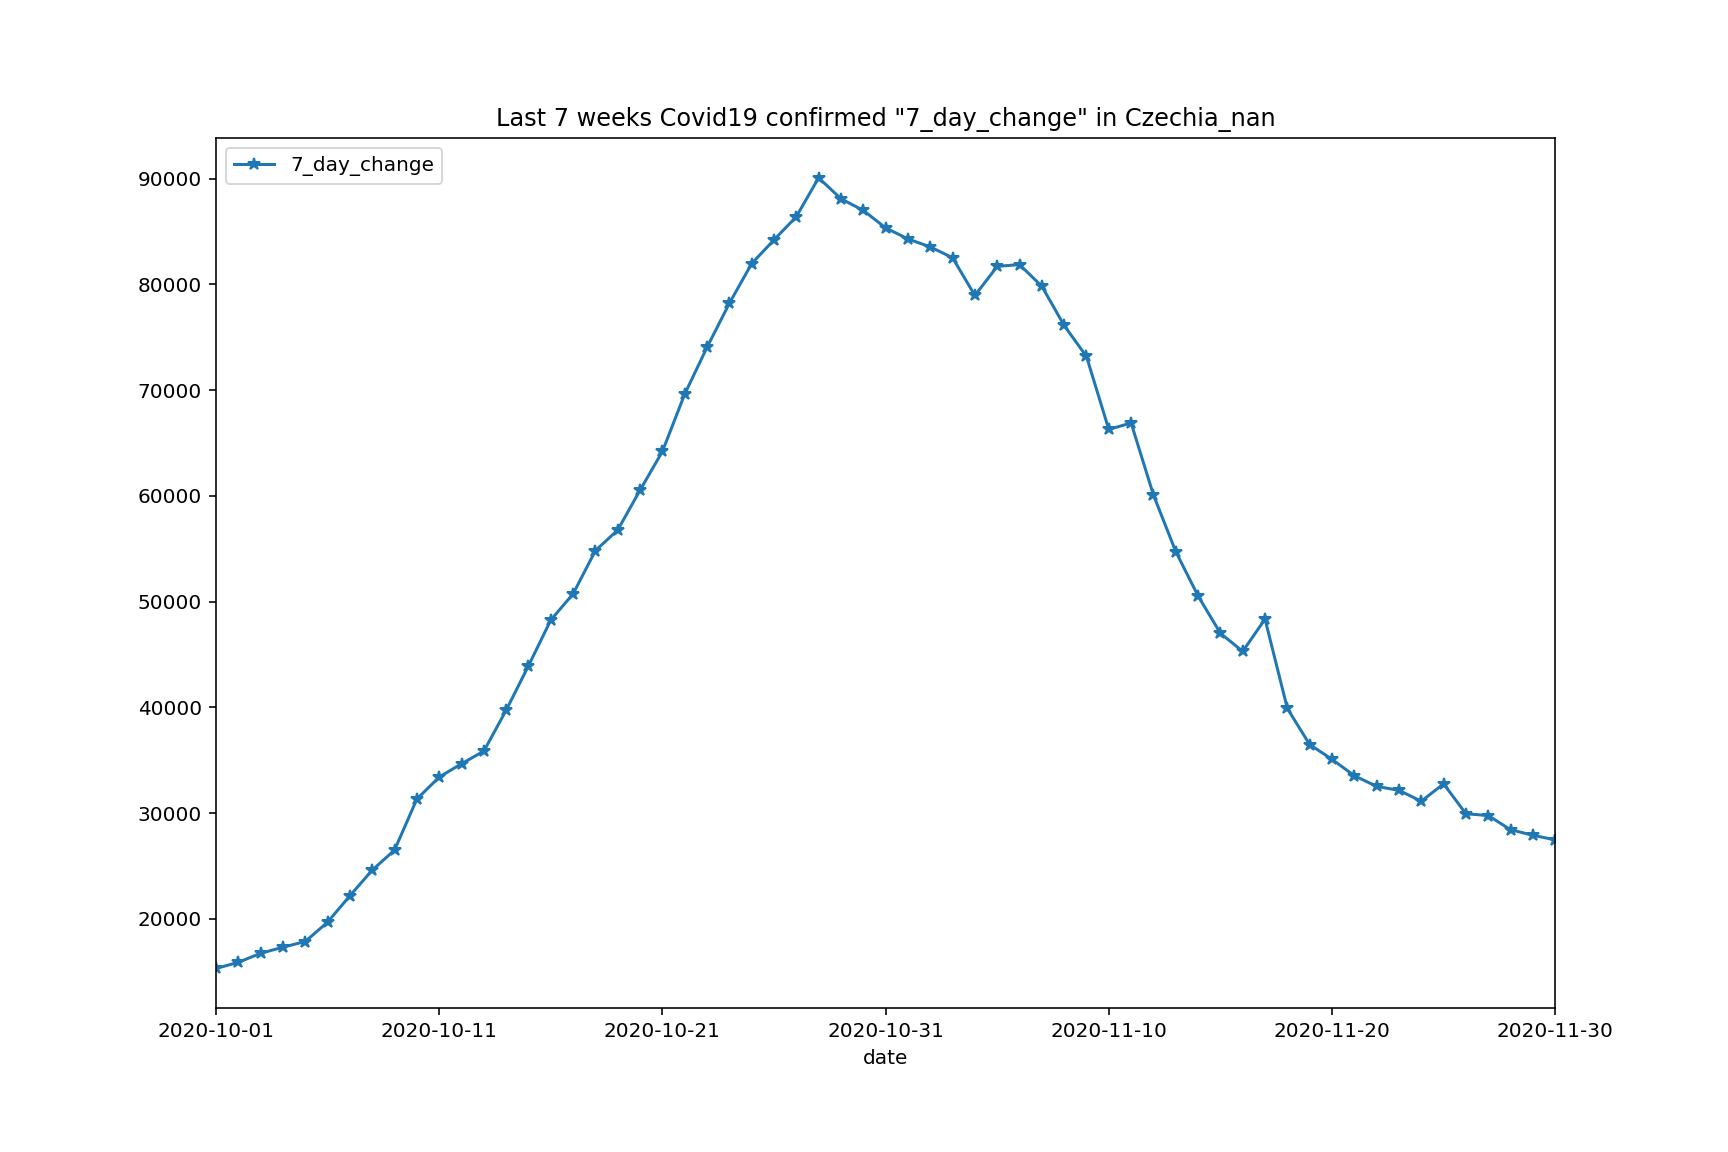

In [46]:
region='Czechia_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


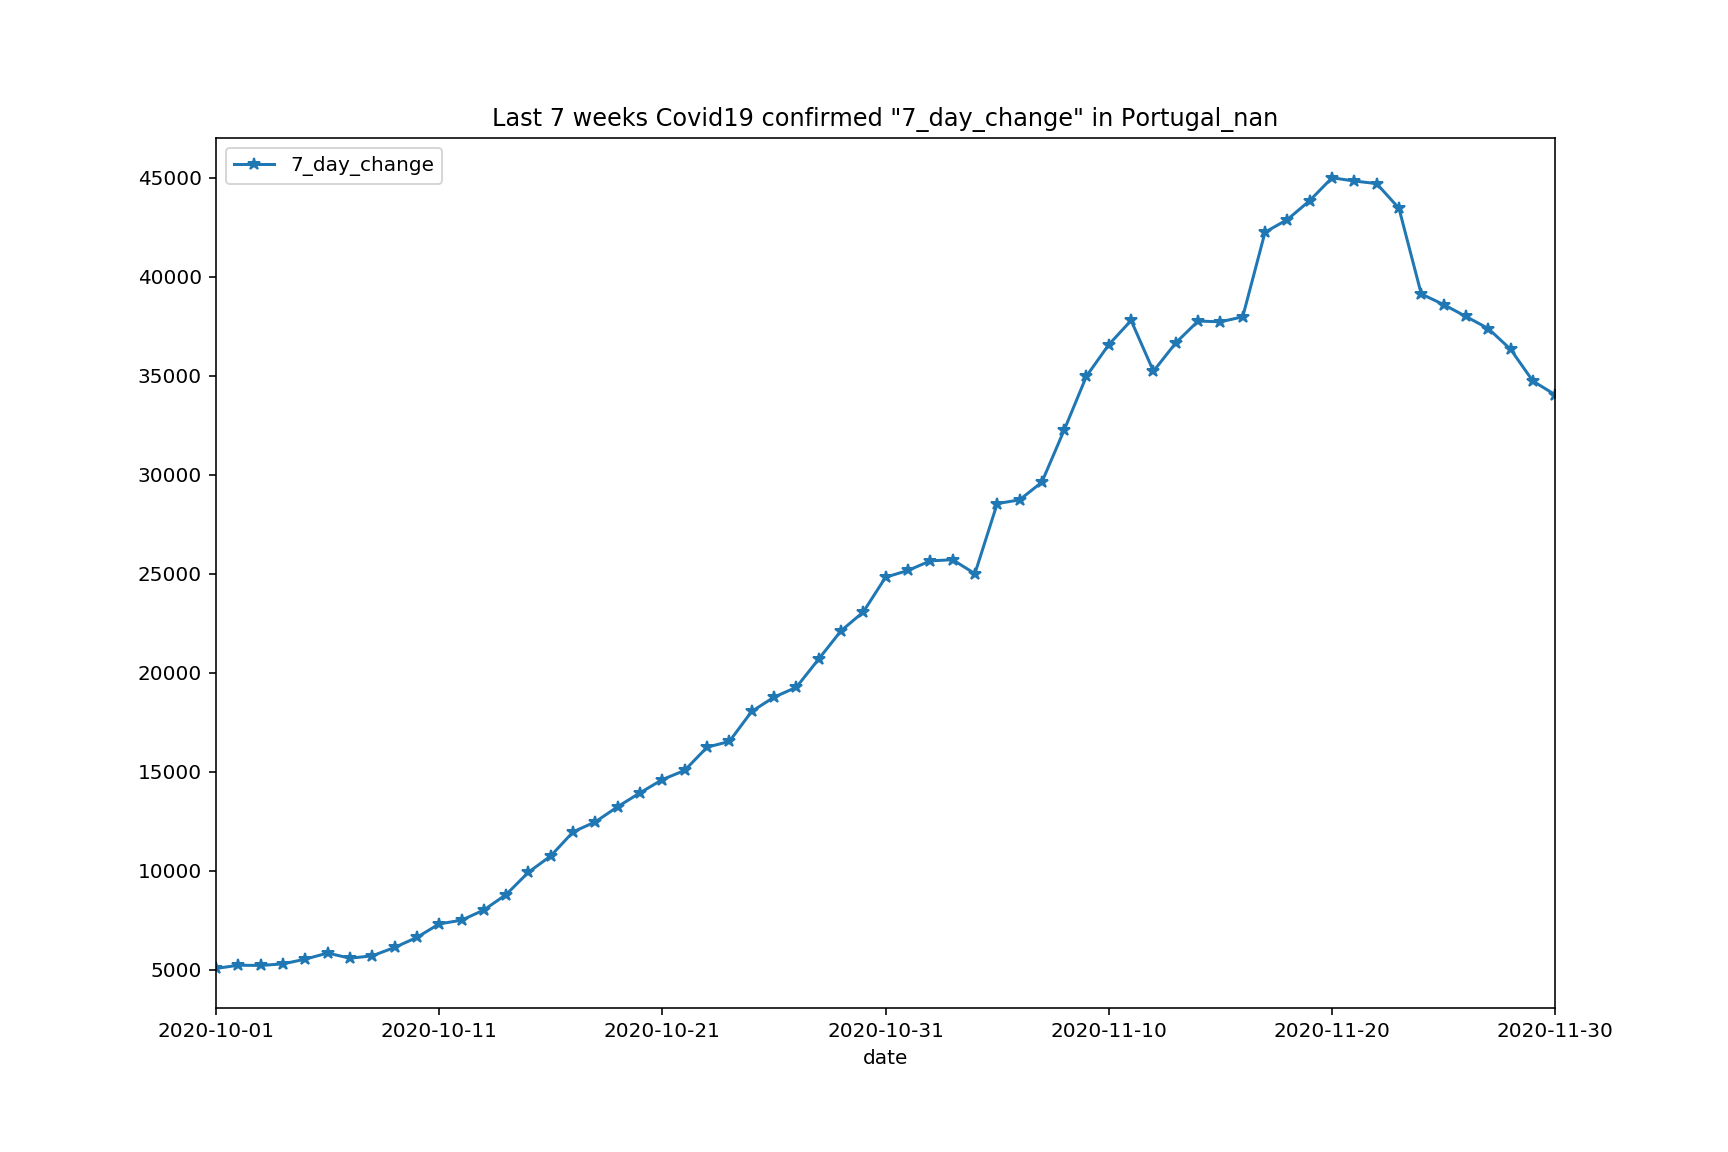

In [47]:
region='Portugal_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

In [48]:
%matplotlib notebook
#%matplotlib inline

<IPython.core.display.Javascript object>


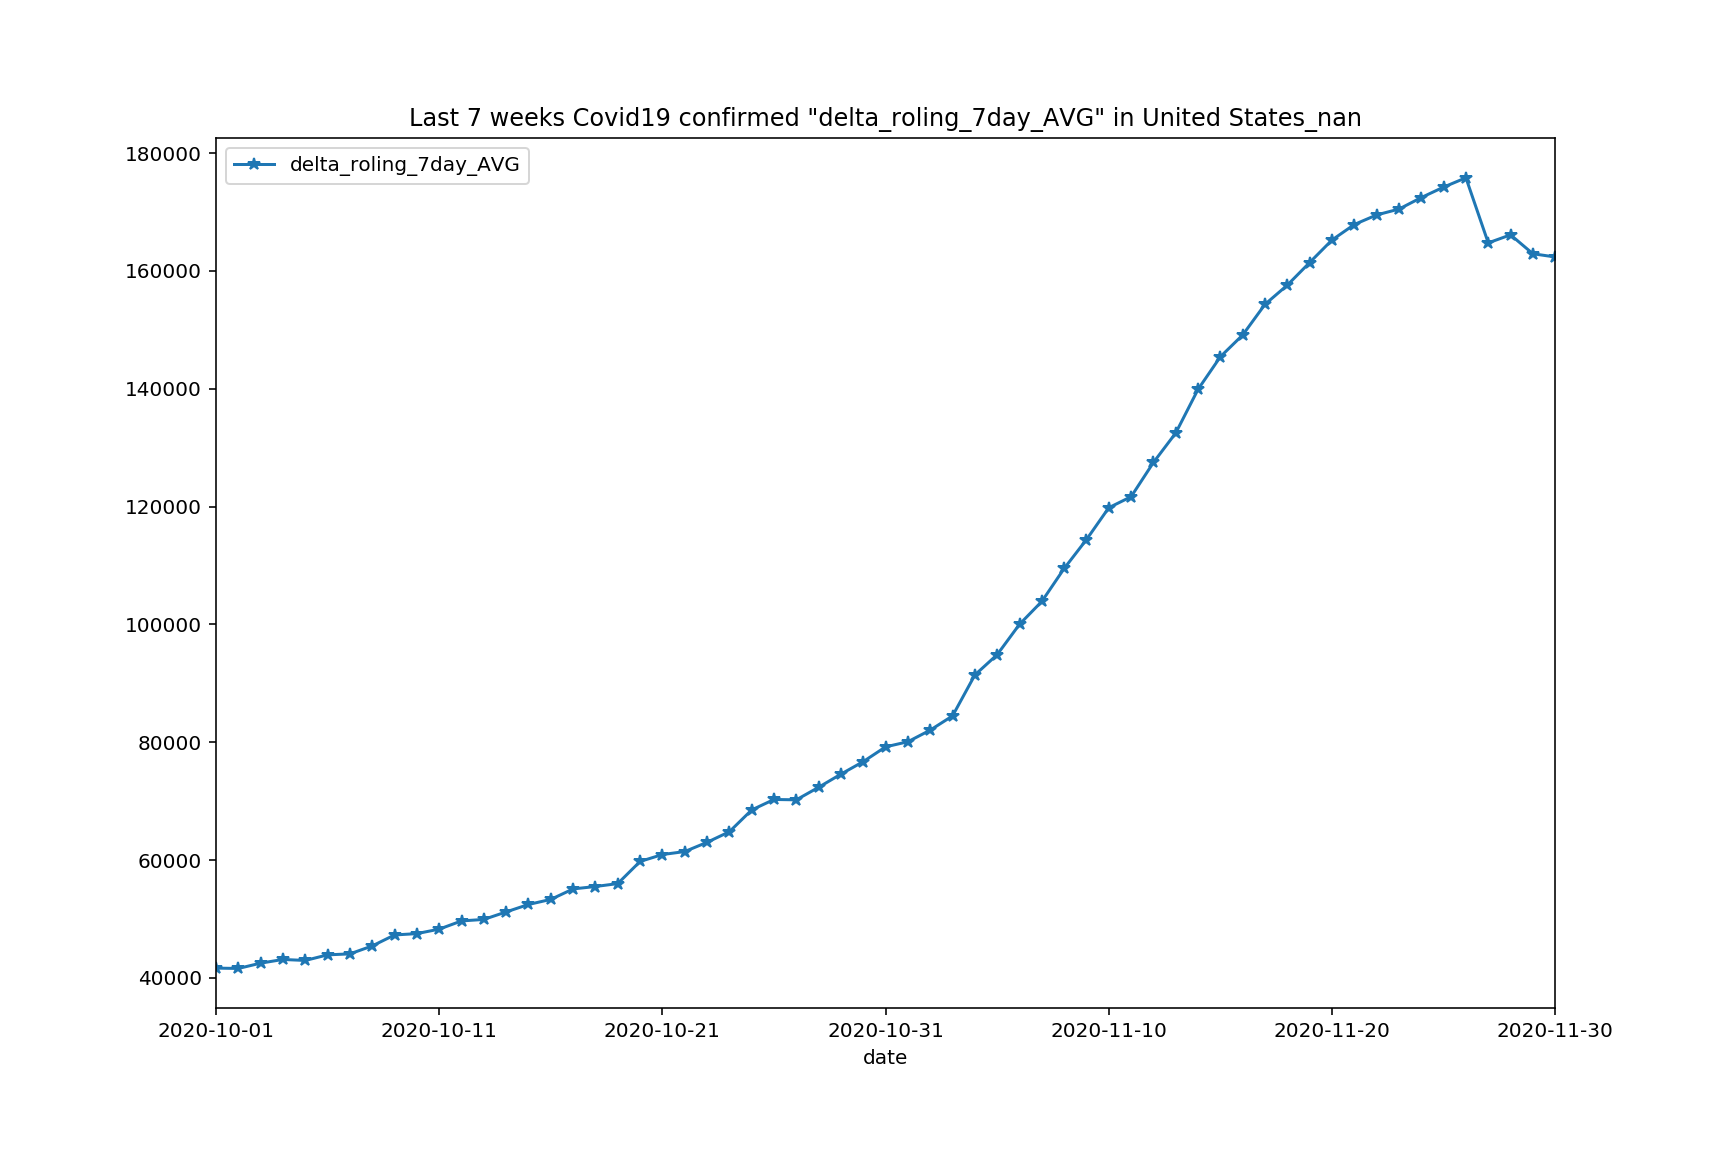

In [49]:
region='United States_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


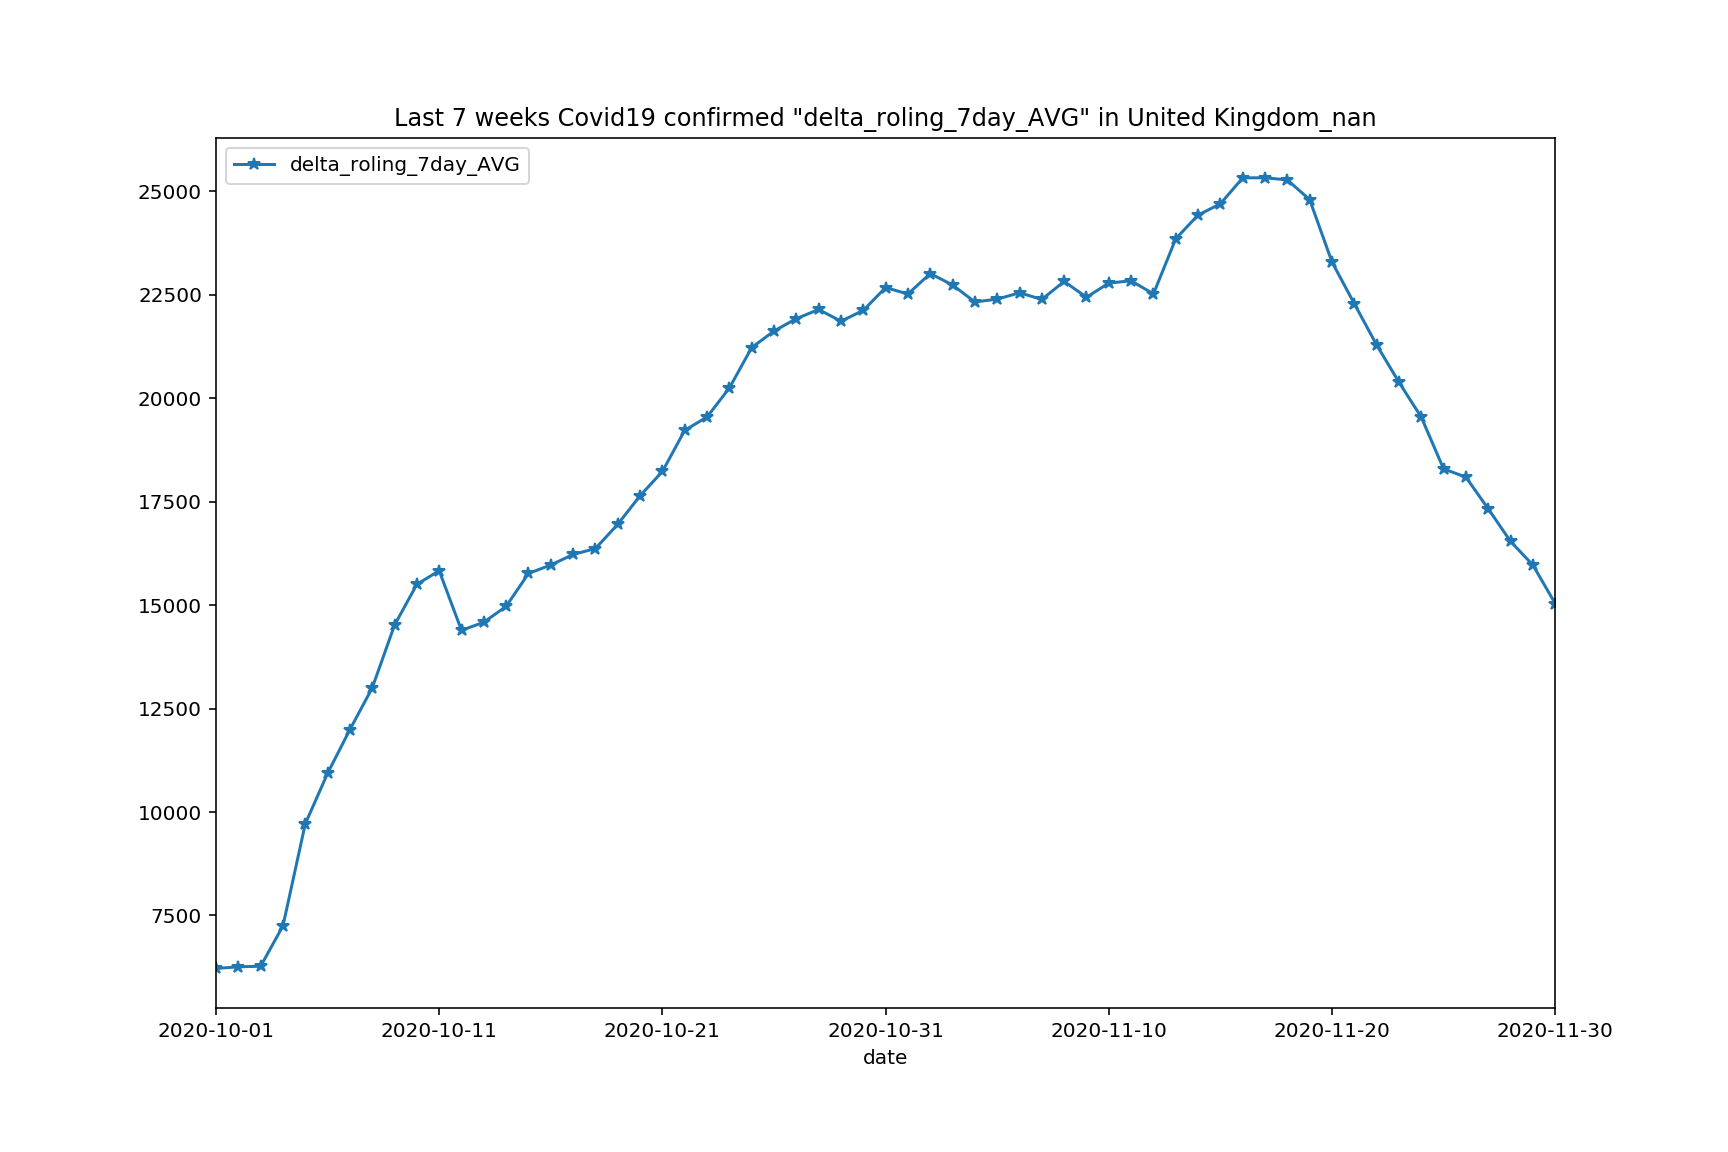

In [50]:
region='United Kingdom_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


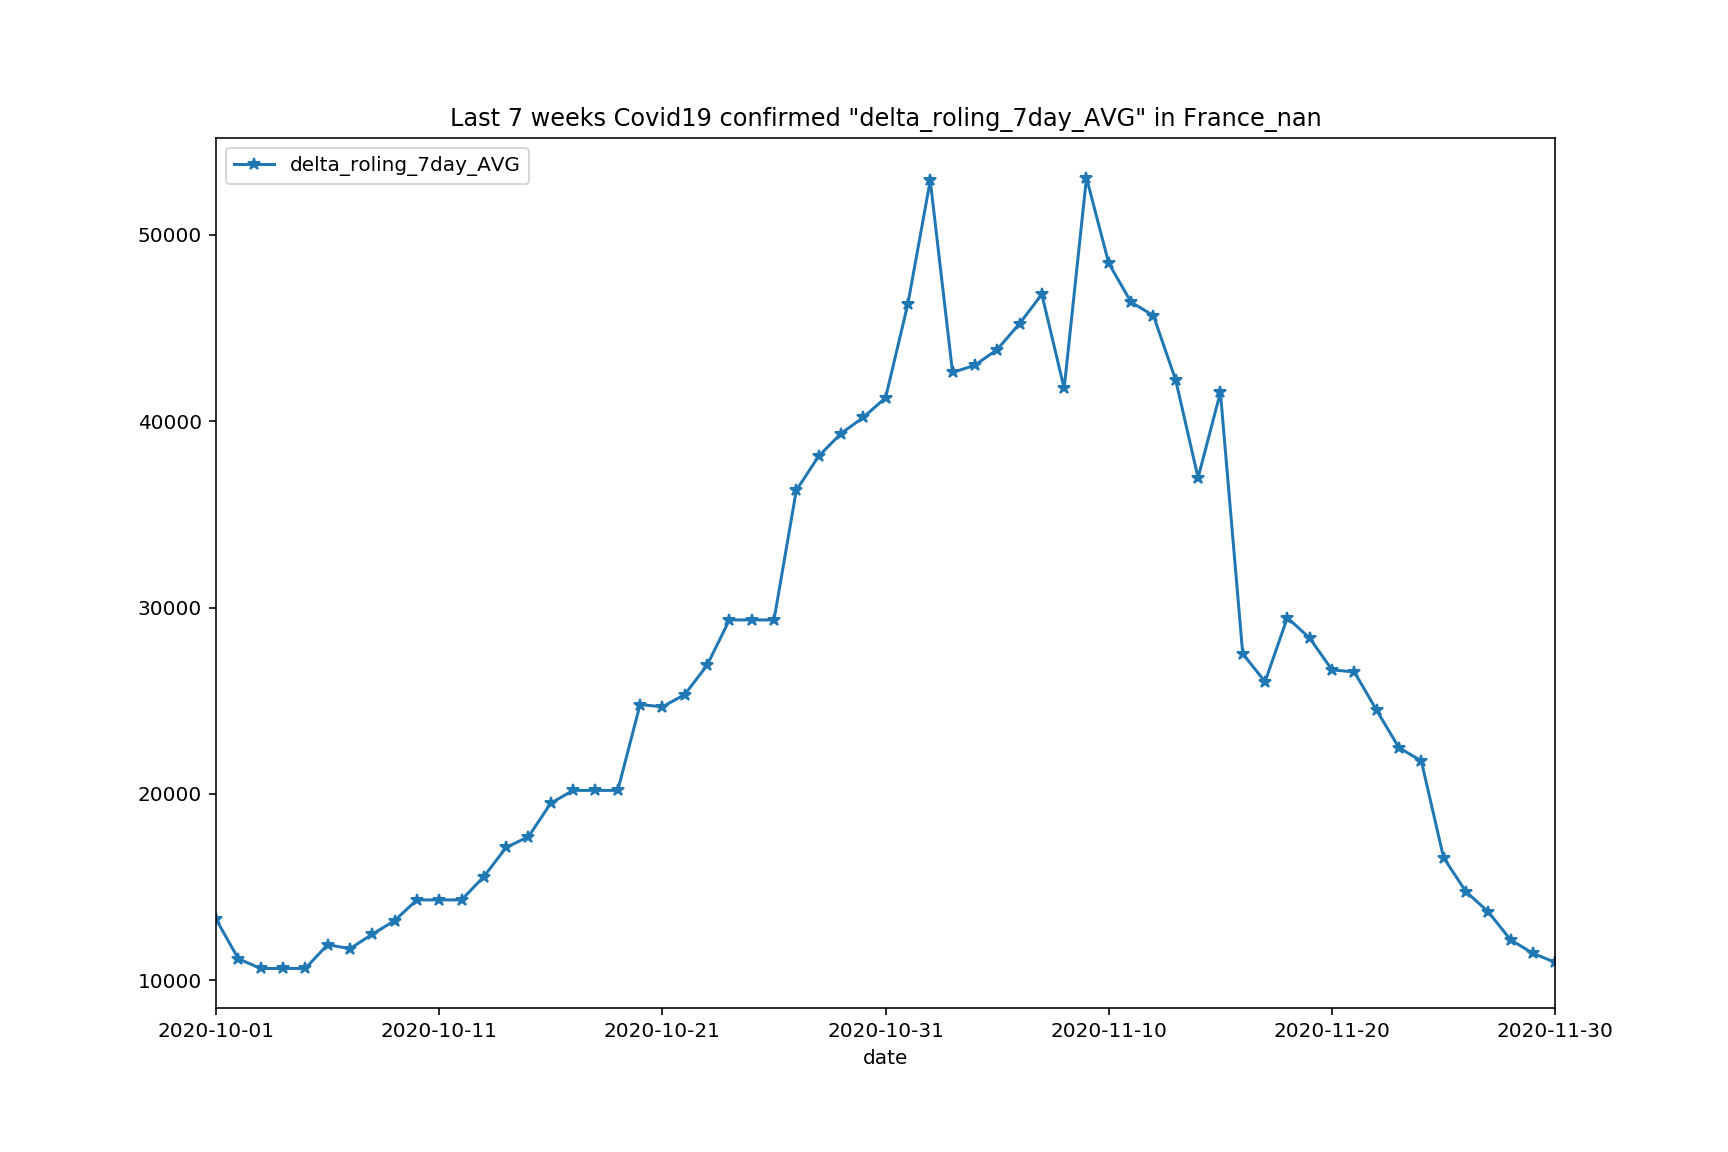

In [51]:
region='France_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


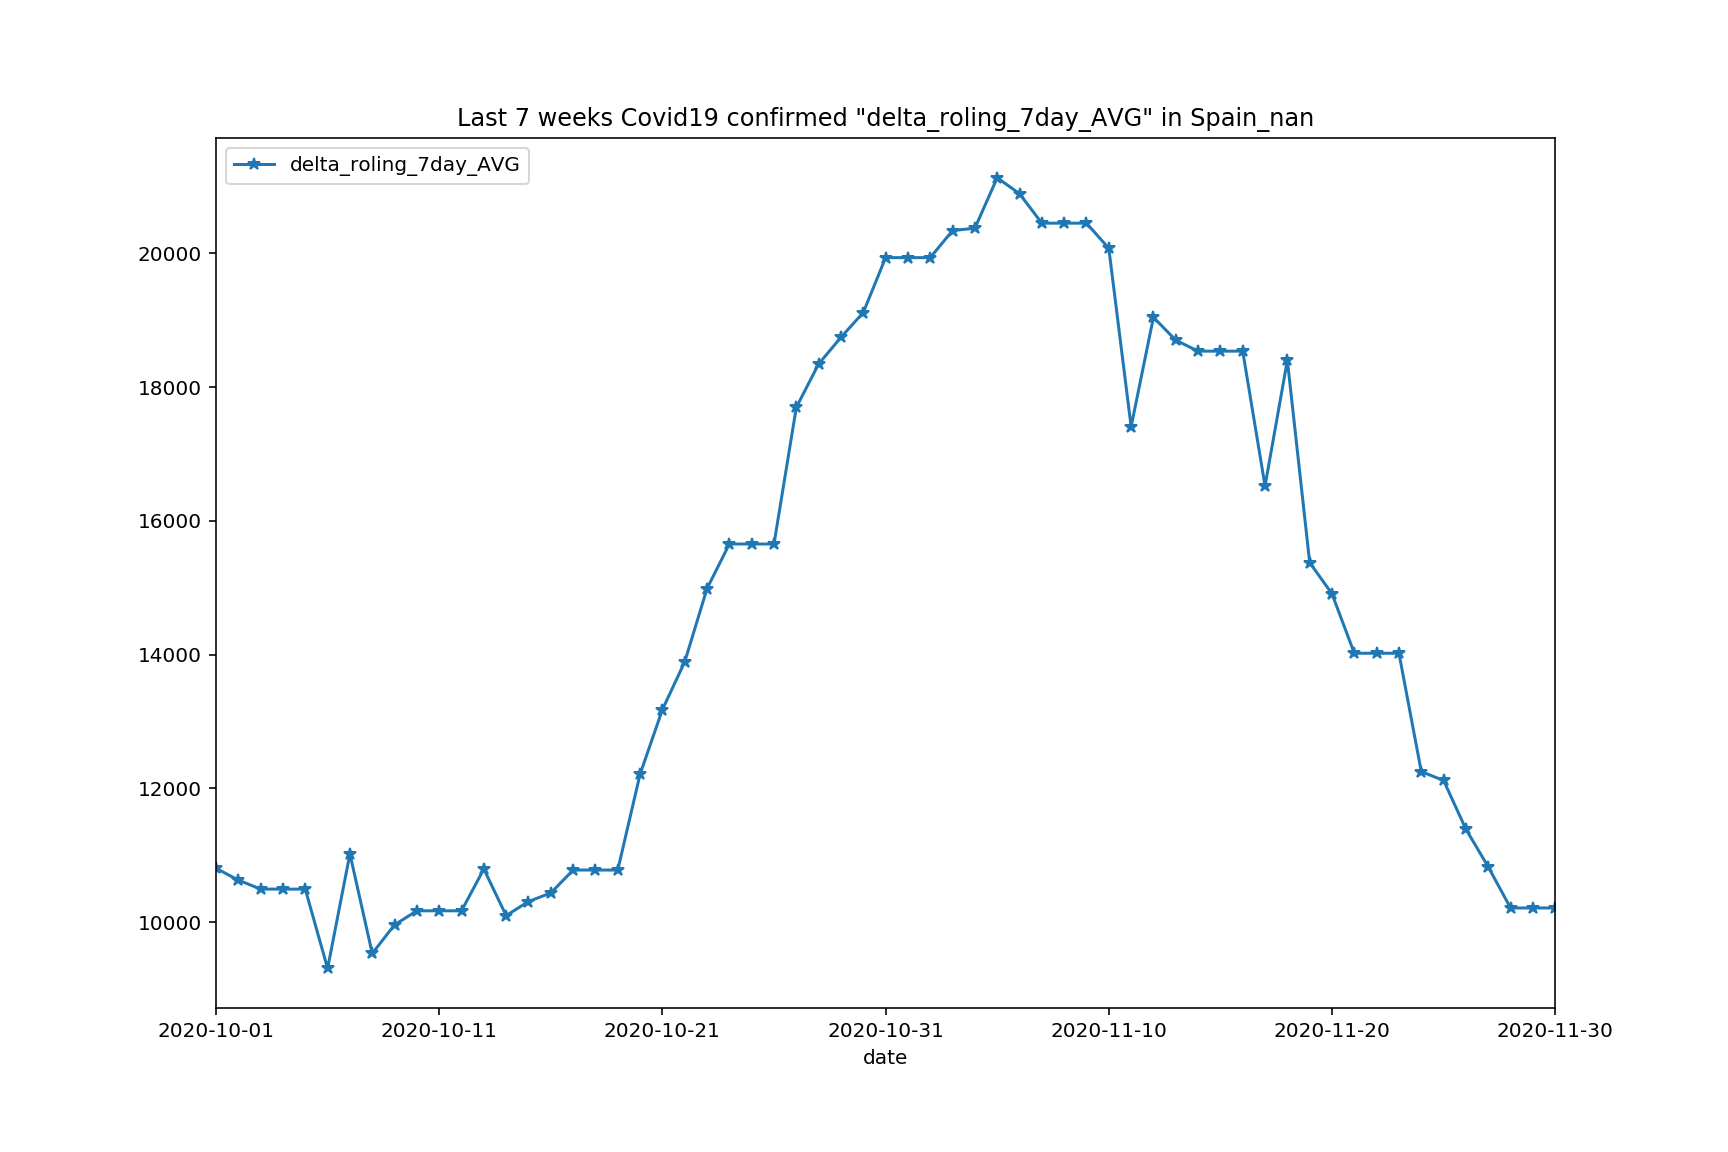

In [52]:
region='Spain_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


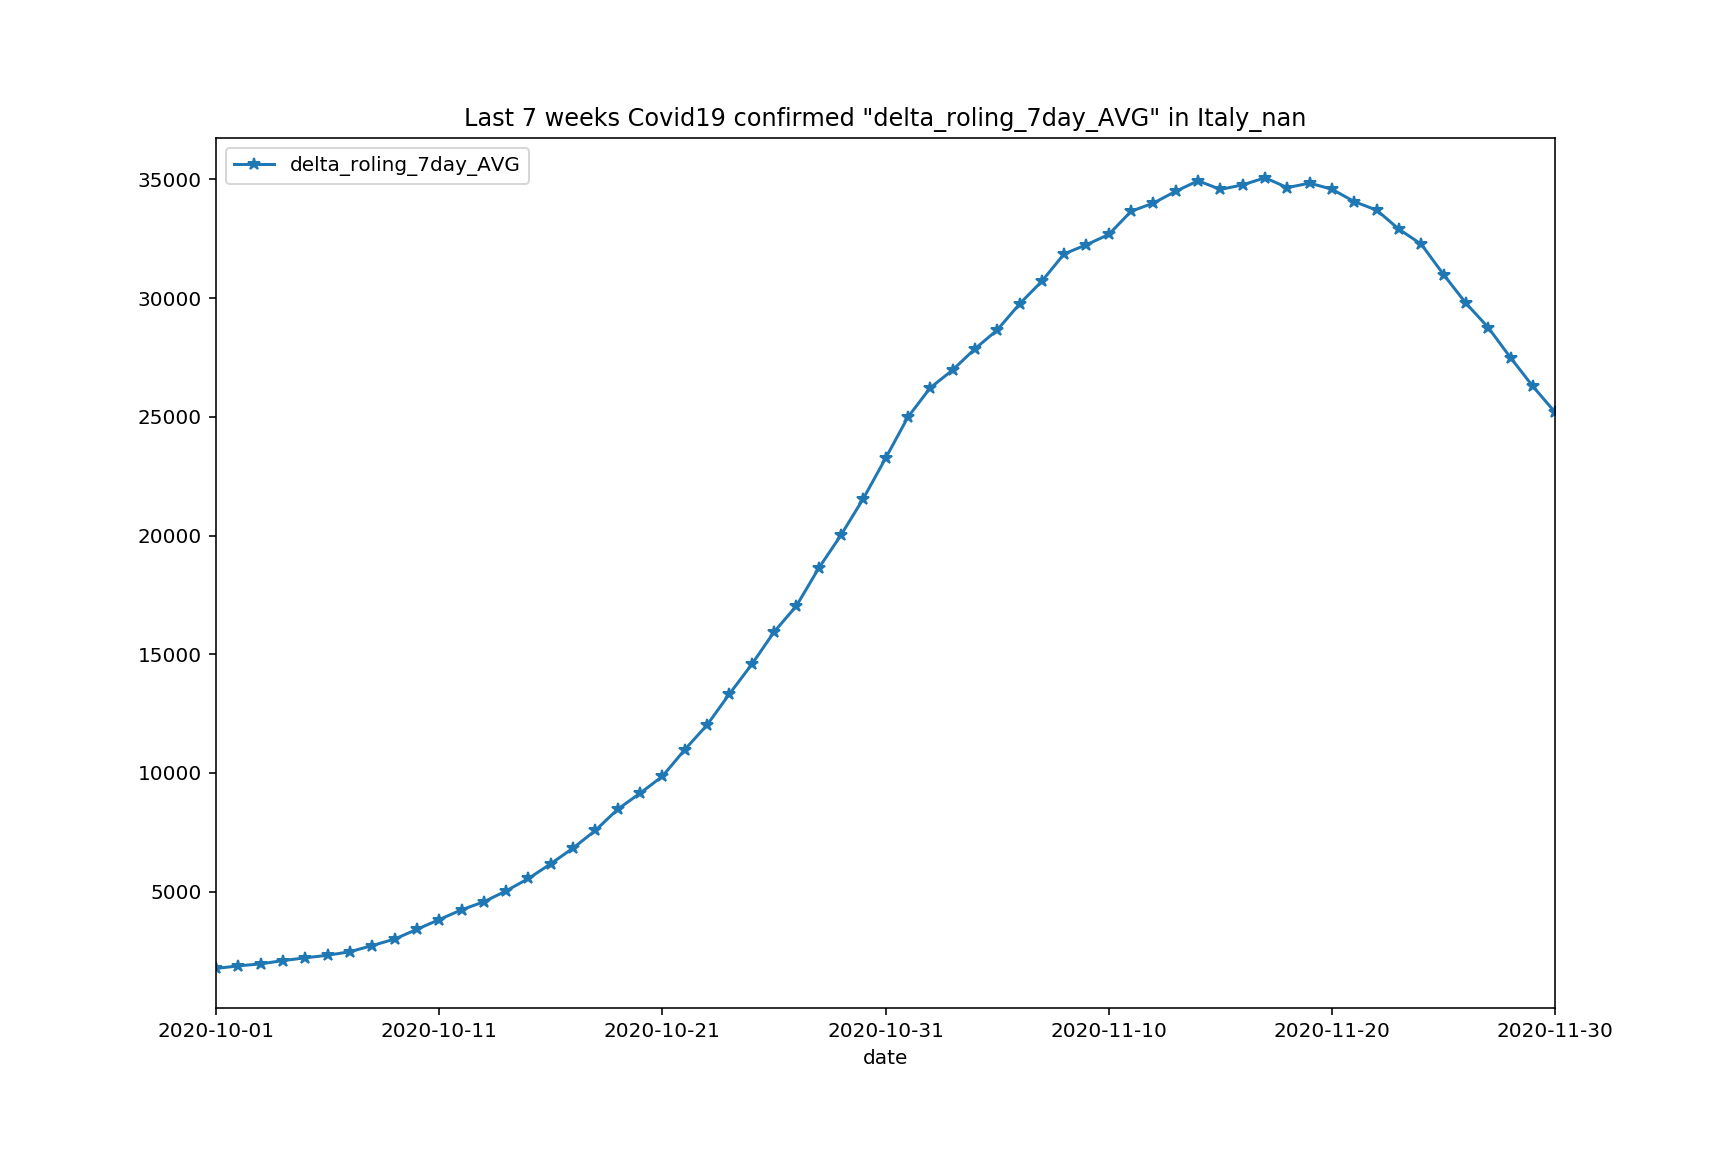

In [53]:
region='Italy_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


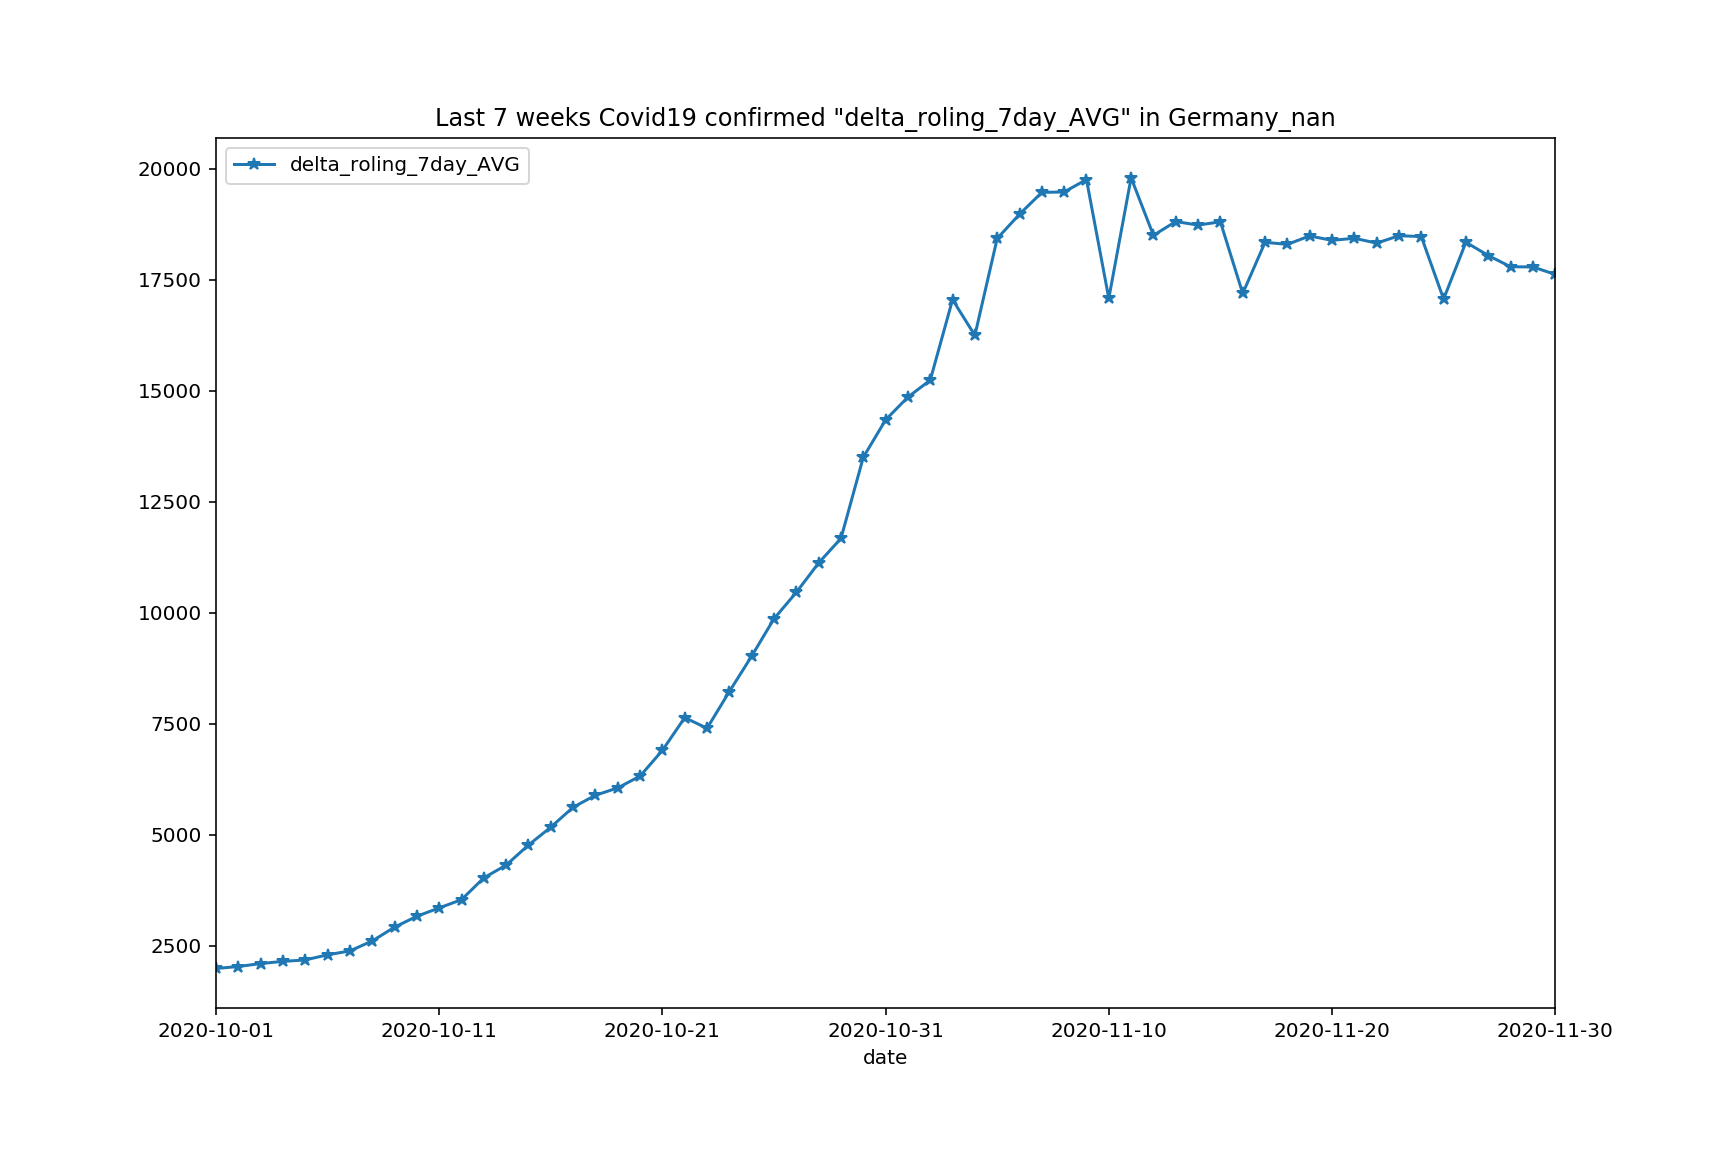

In [54]:
region='Germany_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


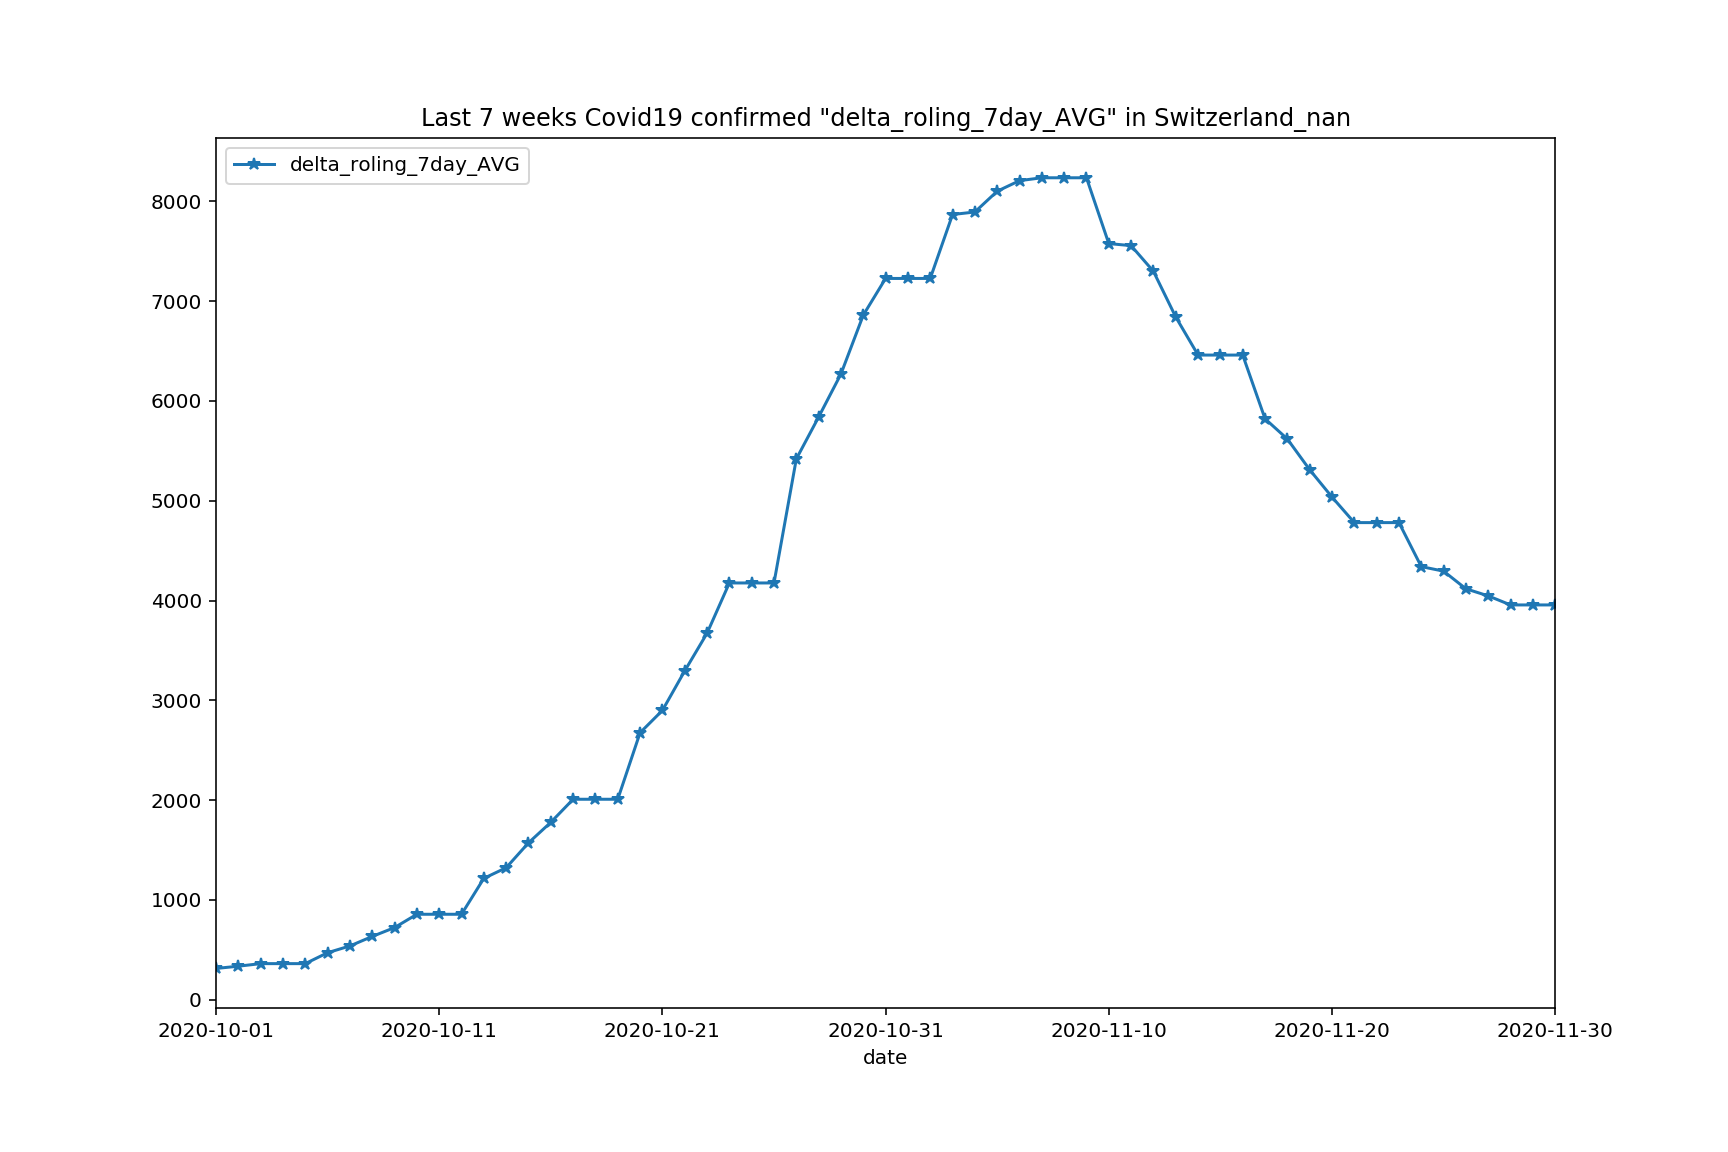

In [55]:
region='Switzerland_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


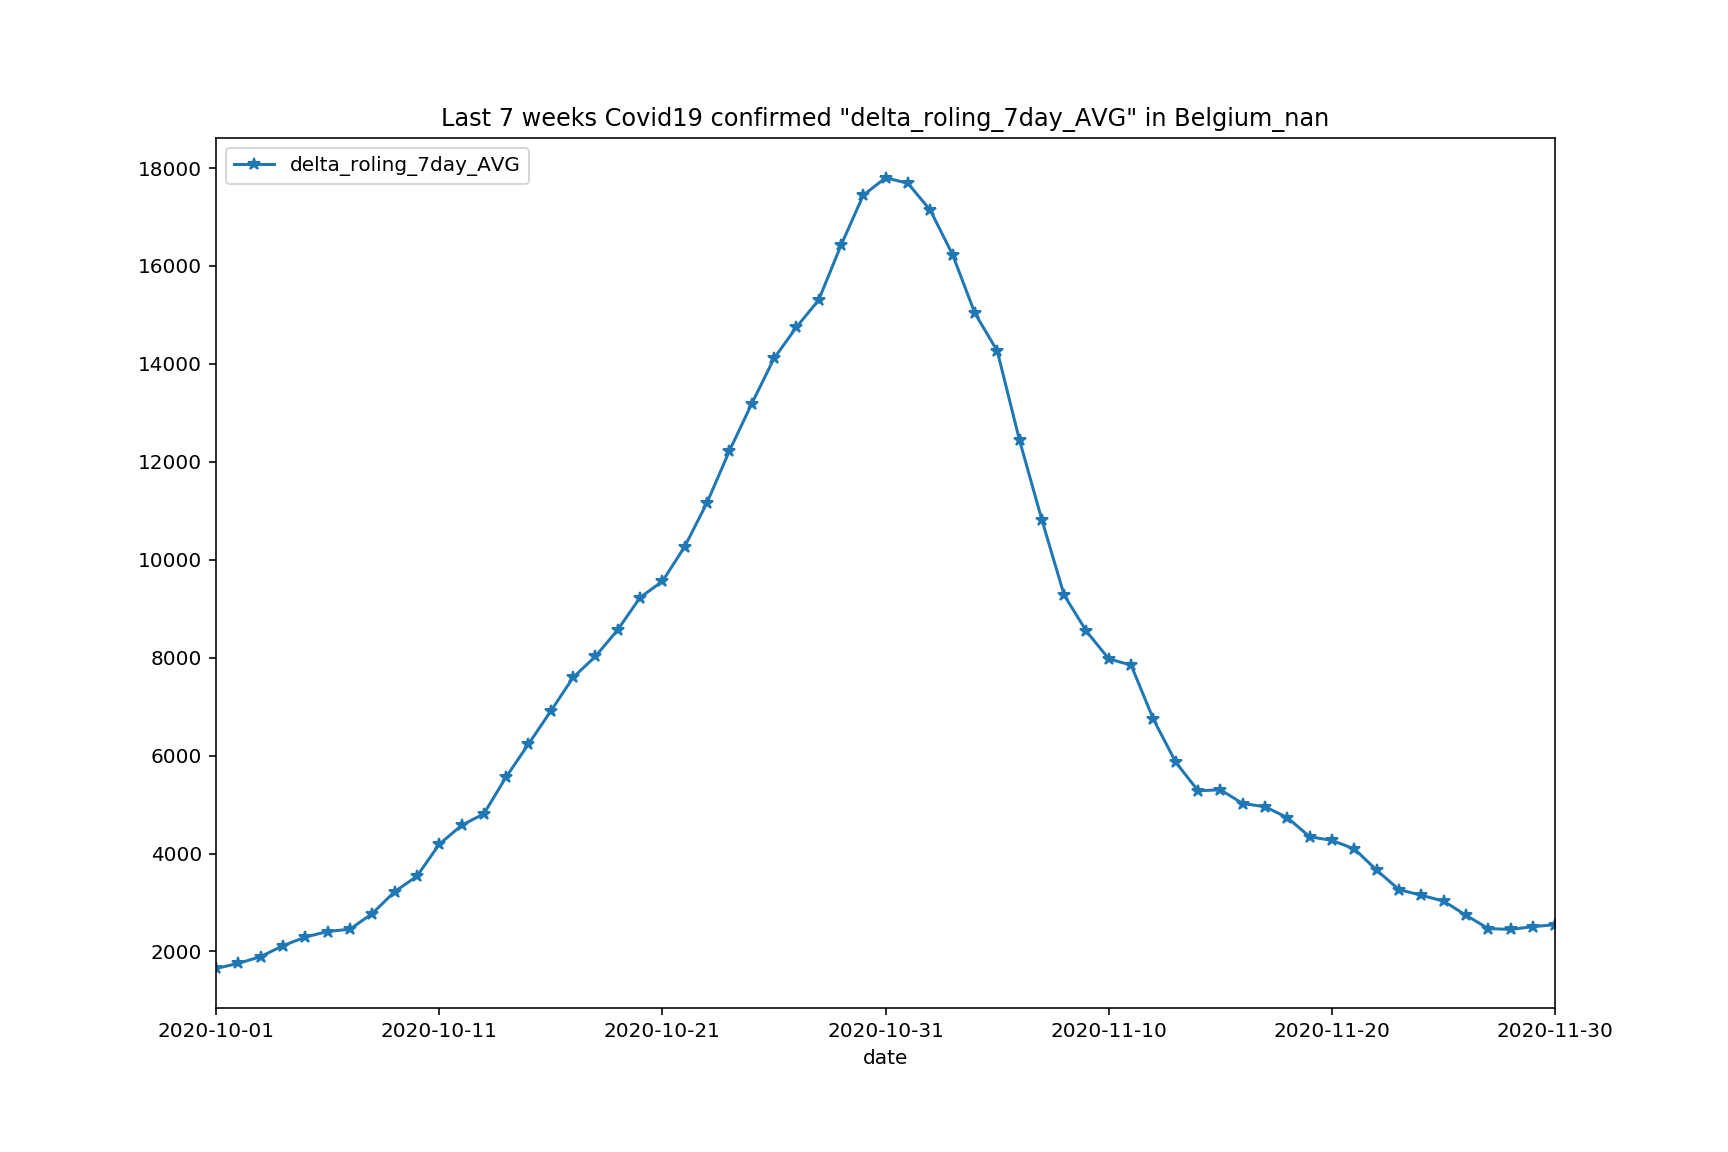

In [56]:
region='Belgium_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


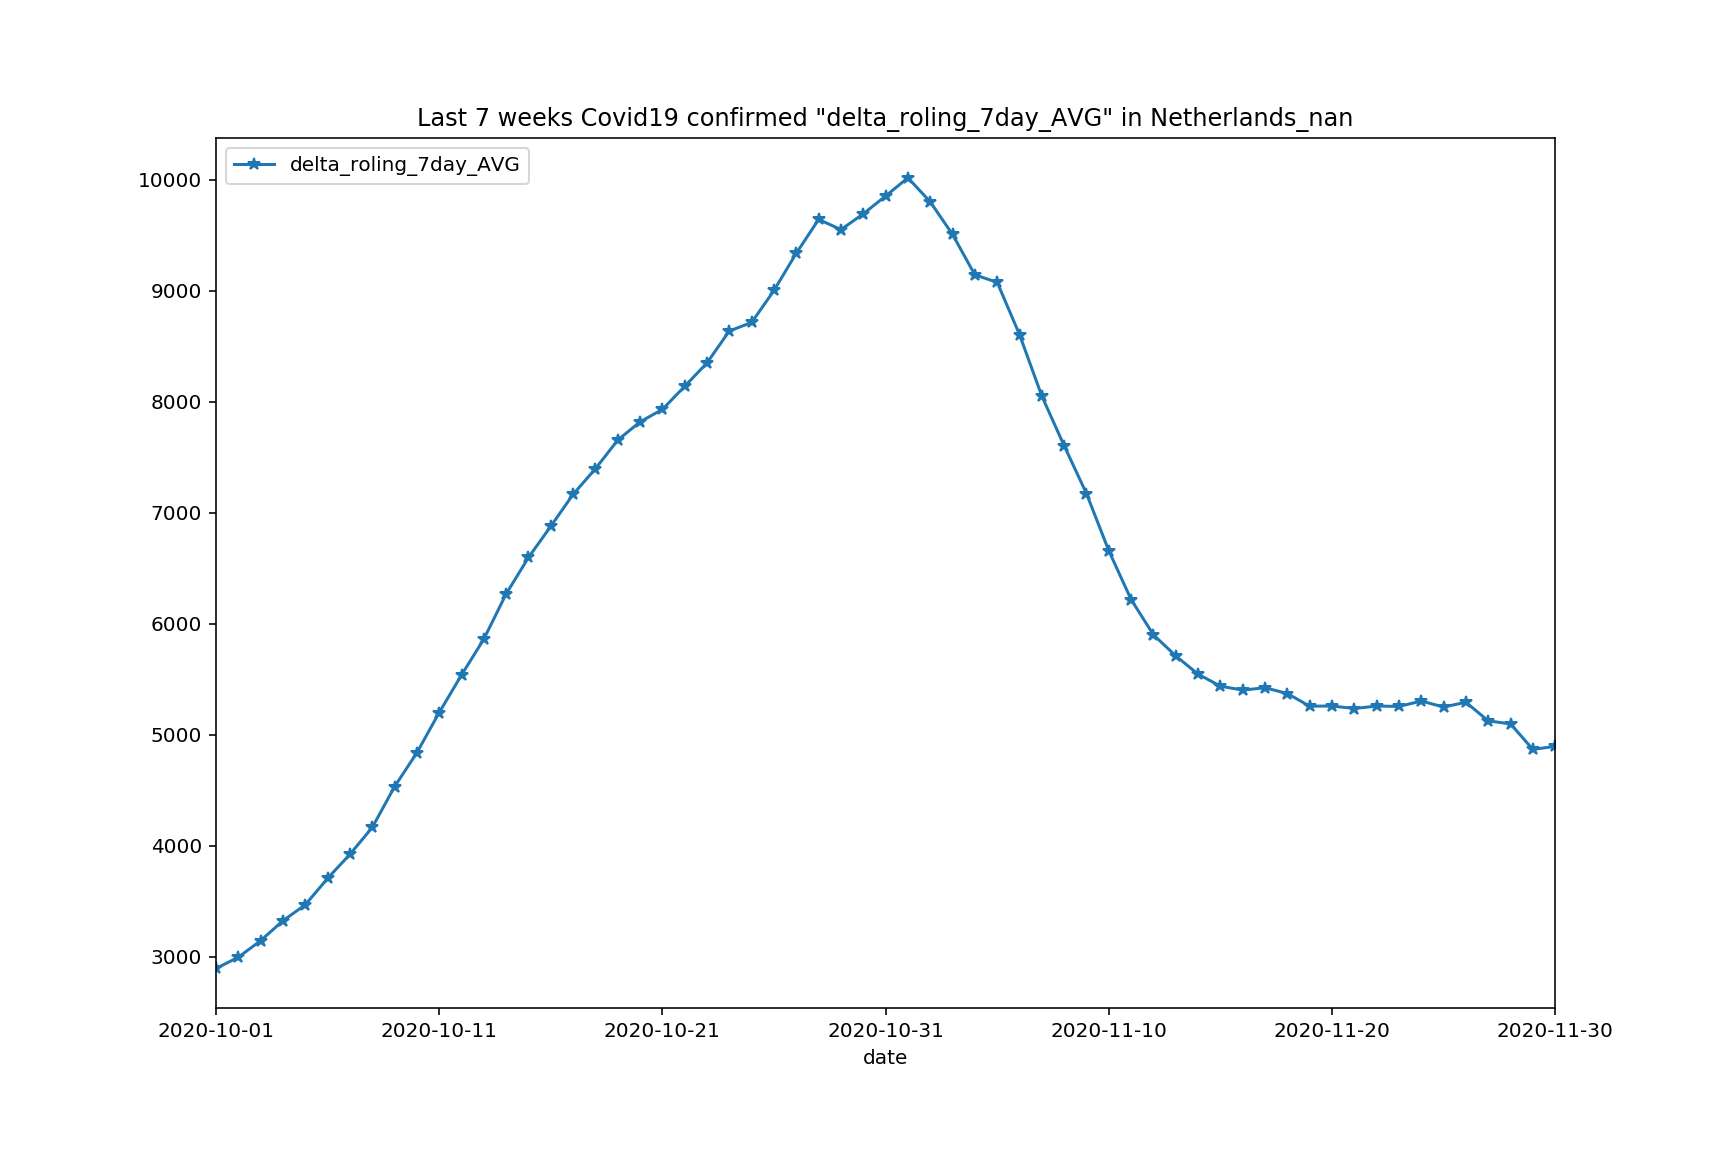

In [57]:
region='Netherlands_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


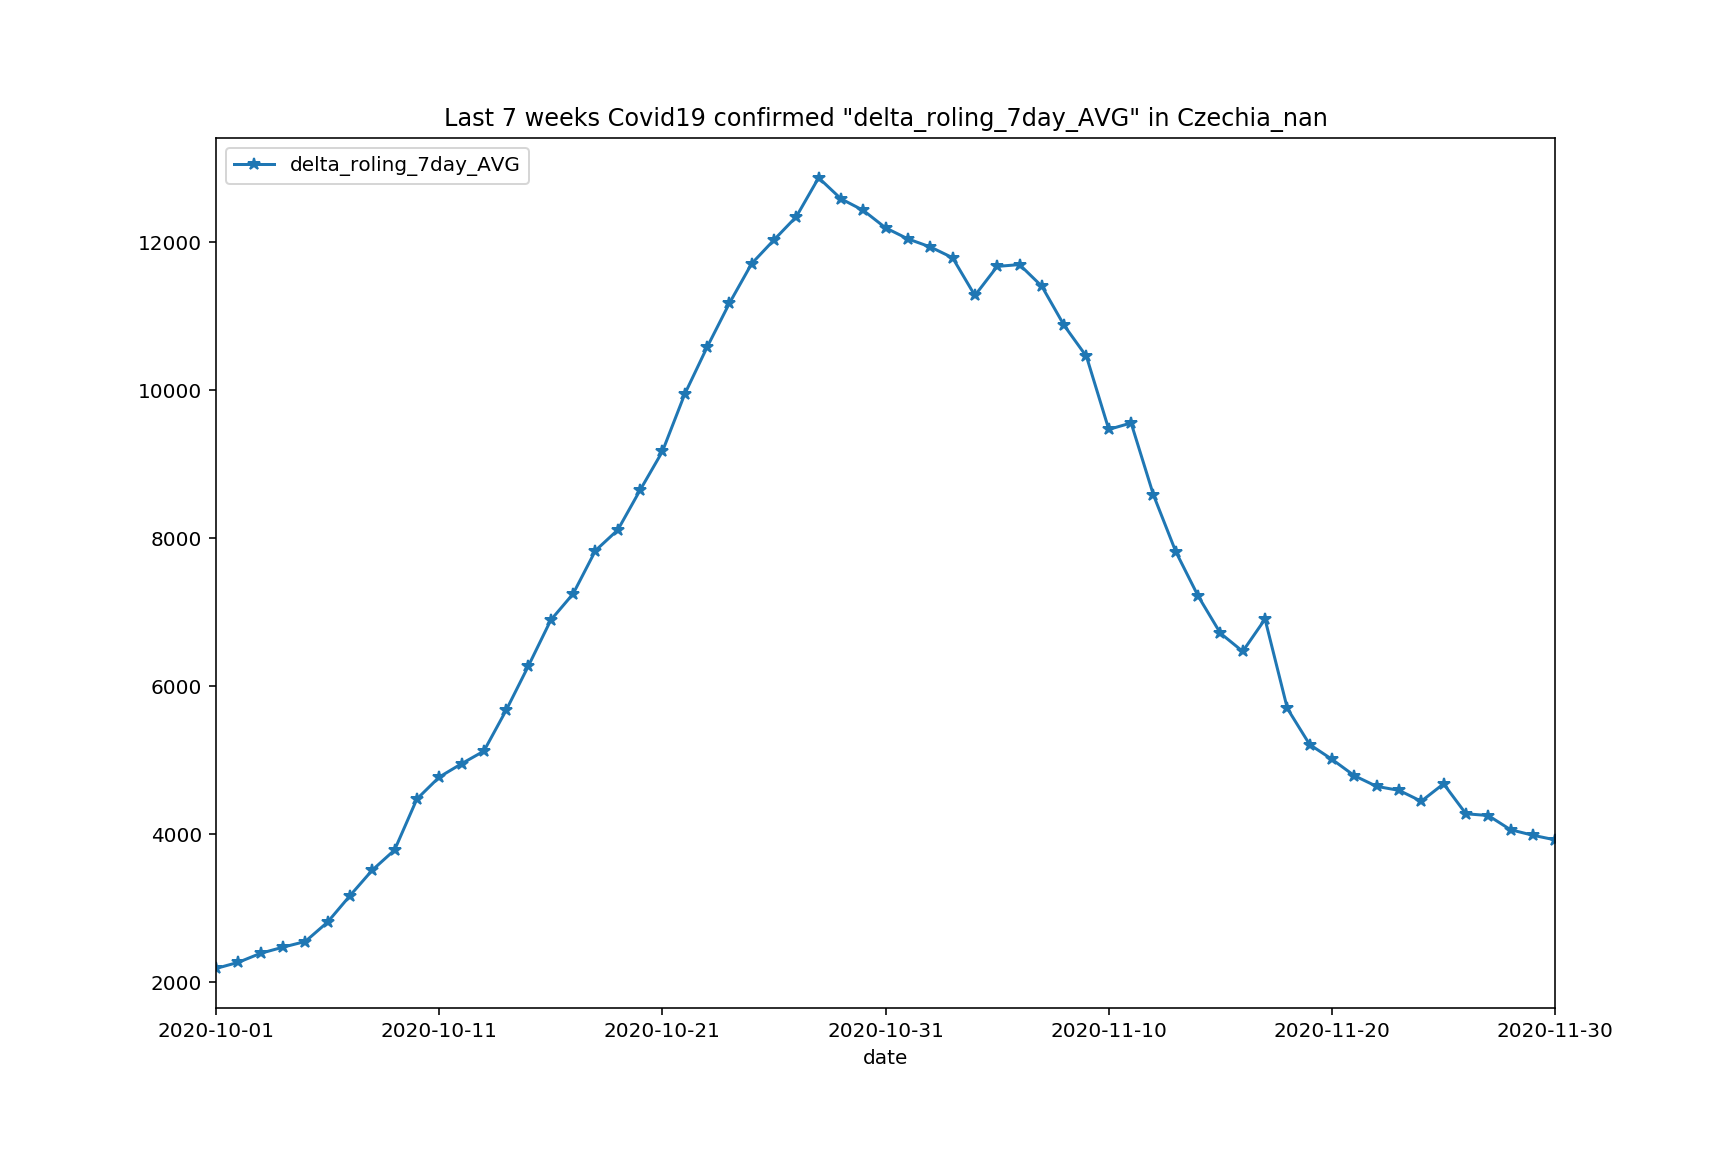

In [58]:
region='Czechia_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


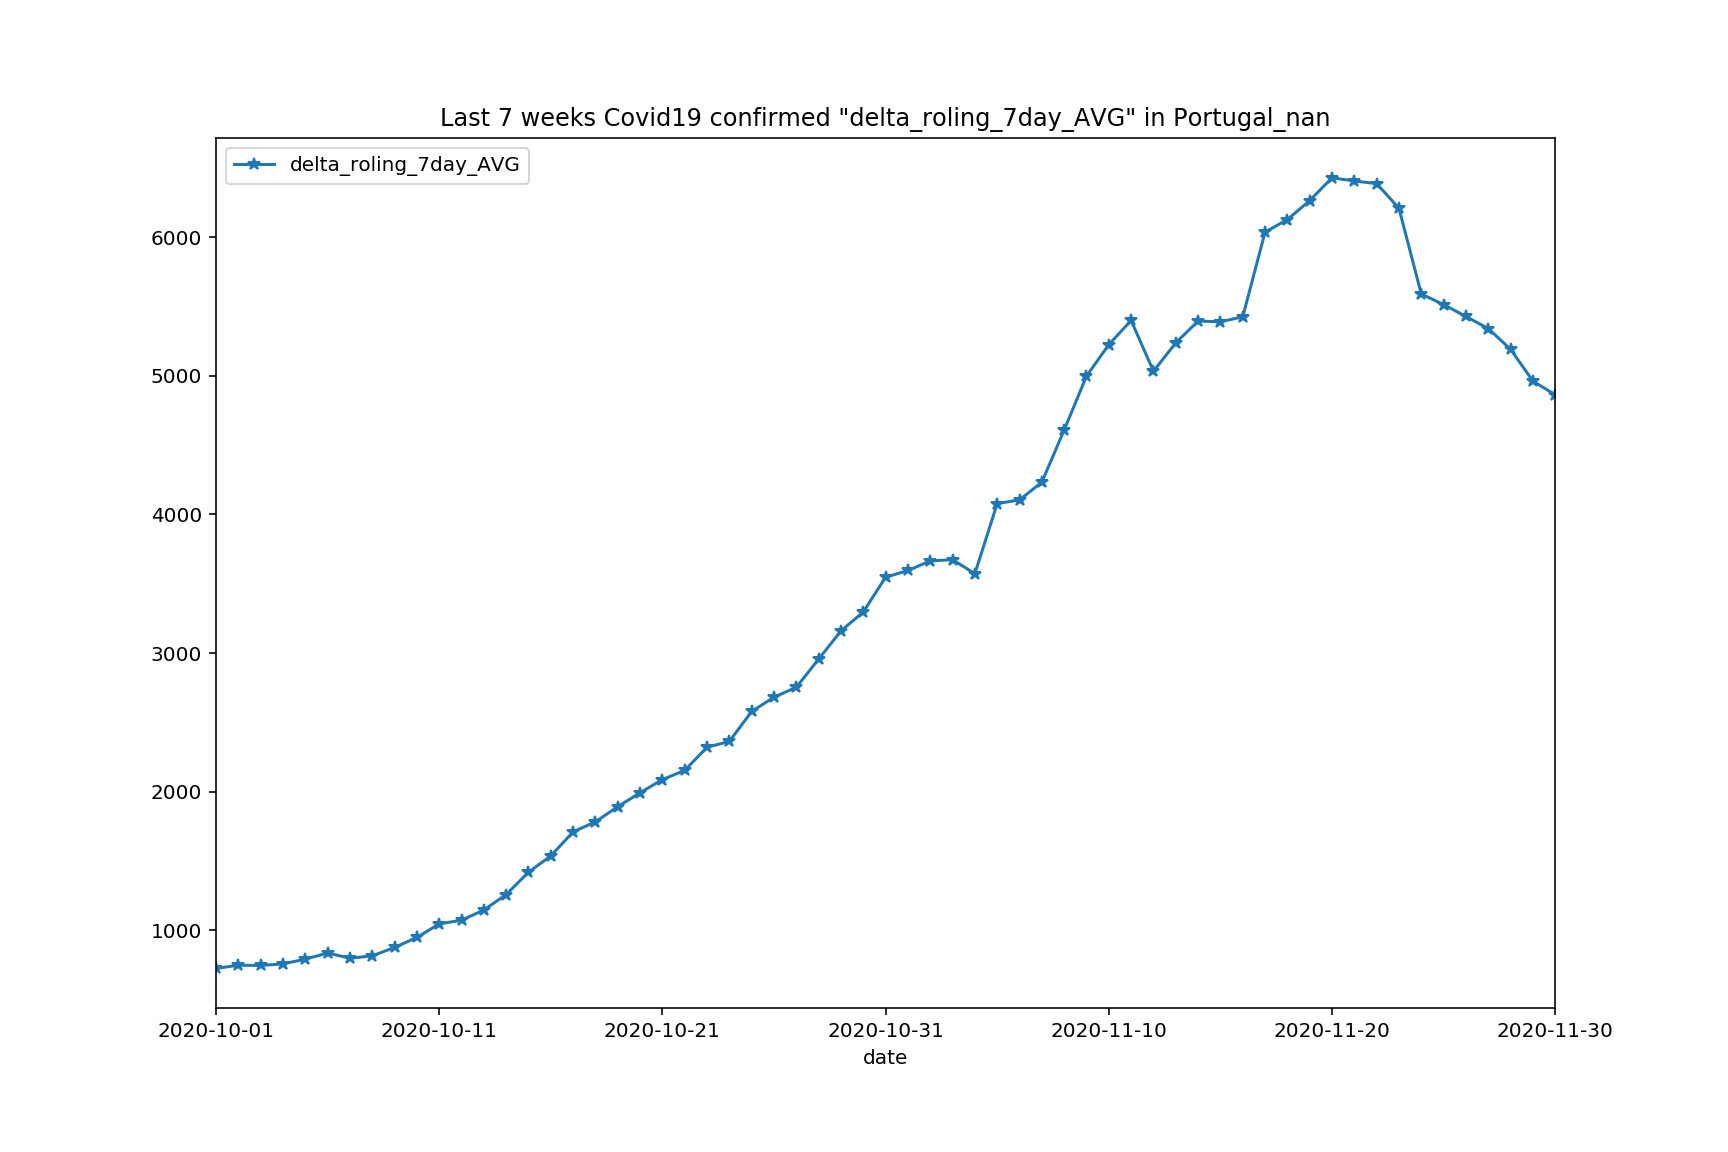

In [59]:
region='Portugal_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

In [60]:
print("Validation analysis for 1day-Forecast and display purpose in https://FuelBigData.com/blog is done!")

Validation analysis for 1day-Forecast and display purpose in https://FuelBigData.com/blog is done!


In [61]:
exit()

ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.
